# **En este notebook el alumno aprende a utilizar Faster R-CNN**

## YOLO

### ¿Qué es YOLO?

[Enlace al paper original](https://www.academis.eu/machine_learning/_downloads/51a67e9194f116abefff5192f683e3d8/yolo.pdf)

YOLO (You Only Look Once) es una familia de modelos de detección de objetos en tiempo real basada en redes neuronales profundas. Su objetivo principal es identificar y localizar objetos en imágenes o videos rápidamente y con alta precisión.

YOLO fue desarrollado por Joseph Redmon y Ali Farhadi en la Universidad de Washington. Lanzado en 2015, YOLO ganó popularidad rápidamente por su gran velocidad y precisión. Desde entonces, ha tenido una numerosa cantidad de **versiones**, cada una mejorando las anteriores:

- **YOLOv1**: la primera generación de YOLO. Introdujo el enfoque de detección en tiempo real. Presentaba limitaciones en precisión, especialmente para objetos pequeños o superpuestos.

- **YOLOv2**: lanzado en 2016, mejoró el diseño original al incluir normalización por lotes, uso de anclas (anchor boxes) y agrupación basada en dimensiones.

- **YOLOv3**: Desarrollado originalmente por Joseph Redmon, YOLOv3 mejoró a sus predecesores introduciendo funciones como las predicciones multiescala y tres tamaños diferentes de núcleos de detección.

- **YOLOv4**: presentado en 2020, se destaca frente a otros detectores de objetos basados en redes neuronales convolucionales (CNN) por ser apto no solo para sistemas de recomendación, sino también para la automatización de procesos y la reducción de intervención humana. Su capacidad para funcionar en GPUs estándar lo hace accesible económicamente, diseñado para operar en tiempo real con una GPU convencional y requiriendo solo una de estas para el entrenamiento.

- **YOLOv5**: reconocido por su facilidad de uso y compatibilidad integrada con PyTorch, mejoró el desempeño general del modelo e incorporó funcionalidades como la optimización automática de hiperparámetros, herramientas para rastrear experimentos y soporte para exportar modelos en formatos ampliamente utilizados.

- **YOLOv6**: lanzado en 2022 por Meituan, introdujo mejoras clave en su diseño y proceso de entrenamiento, tales como el módulo de concatenación bidireccional (BiC), estrategias de entrenamiento asistidas por anclajes (AAT) y un rediseño optimizado de su columna vertebral y cuello, logrando un rendimiento sobresaliente en el conjunto de datos COCO.

- **YOLOv7**: reconocido como el modelo más preciso entre los detectores de objetos en tiempo real con 30 FPS o más en la GPU V100. Supera a modelos como YOLOR, YOLOX, Scaled-YOLOv4 y YOLOv5 en términos de velocidad y precisión. Entrenado desde cero en el conjunto de datos MS COCO, no utiliza pesos preentrenados ni datos adicionales.

- **YOLOv8**: introducido en 2023 por Ultralytics, aportó avances significativos en eficiencia, flexibilidad y rendimiento. Basado en las innovaciones de versiones anteriores, YOLOv8 integra características como arquitecturas mejoradas de columna vertebral y cuello, una cabeza dividida sin anclajes de Ultralytics y una optimización balanceada entre precisión y velocidad, siendo ideal para tareas variadas de detección de objetos.

- **YOLOv9**: incorporó técnicas revolucionarias como la Información de Gradiente Programable (PGI) y la Red Generalizada de Agregación de Capas Eficiente (GELAN). Este modelo alcanzó nuevas cotas de eficiencia, precisión y adaptabilidad, estableciendo estándares de referencia en el conjunto de datos COCO.

- **YOLOv10**: desarrollado en colaboración entre investigadores de la Universidad de Tsinghua y el equipo de Ultralytics, aborda limitaciones en postprocesamiento y arquitectura de versiones anteriores. Al eliminar la supresión no máxima (NMS) y optimizar varios componentes, YOLOv10 alcanza un rendimiento de vanguardia con menor carga computacional, ofreciendo un excelente equilibrio entre precisión y latencia en diferentes tamaños de modelo.

- **YOLOv11**: el modelo más reciente de Ultralytics, se destaca por su rendimiento líder en diversas tareas, incluyendo detección, segmentación, estimación de poses, seguimiento y clasificación. Su versatilidad lo convierte en una solución potente para múltiples aplicaciones de visión por computador, ampliando el alcance de la IA en diferentes dominios.

### Modelo a utilizar

Debido a la simplicidad de los objetos a detectar ya que contamos únicamente con una clase de objetos, hemos optado por utilizar  **YOLOv8** ya que no sólo nos proporciona un gran **rendimiento** sino que también **velocidad** y **eficiencia** para un problema de detección como este. Además, factores como la **estabilidad** del modelo, su amplia documentación, y la facilidad de integración con herramientas estándar como PyTorch lo hacen especialmente adecuado para esta tarea.

Aunque **YOLOv11** ofrece un **rendimiento superior** en escenarios más complejos, su enfoque en tareas avanzadas como detección multiclase o segmentación precisa no resulta esencial para nuestro caso, donde la detección es más simple. De este modo, hemos priorizado un modelo más **ligero y eficiente** como **YOLOv8**, que cumple con creces los requisitos del proyecto sin requerir un mayor consumo de **recursos**.

YOLOv8 ofrece distintas variantes de modelos que están diseñadas para balancear precisión, velocidad y uso de recursos, adaptándose a diferentes necesidades. Estas **variantes** incluyen:
- **YOLOv8n** (nano): La versión más ligera de YOLOv8, diseñada para ser extremadamente rápida y eficiente, adecuada para dispositivos con recursos limitados como IoT, sistemas embebidos o aplicaciones en tiempo real con baja capacidad computacional.
- **YOLOv8s** (small): Un modelo pequeño, ligeramente más pesado que YOLOv8n, pero aún optimizado para velocidad. Proporciona un buen equilibrio entre velocidad y precisión, haciéndolo adecuado para tareas más generales de detección en tiempo real.
- **YOLOv8m** (medium): El modelo intermedio de la familia YOLOv8, que busca un equilibrio entre precisión y velocidad. Es la opción ideal para tareas generales de detección en las que la precisión y la velocidad son igualmente importantes.
- **YOLOv8l** (large): Un modelo más grande que prioriza la precisión sobre la velocidad. Es adecuado para tareas complejas en las que es crucial capturar detalles finos, como detectar objetos pequeños o densamente distribuidos.
- **YOLOv8x** (extra-large): La variante más robusta y precisa de YOLOv8. Diseñada para tareas extremadamente complejas y exigentes que requieren la mayor precisión posible. Este modelo es el más grande y consume más recursos.

Debido a que el objetivo es mantener un equilibrio entre una buena **precisión** y un **consumo** moderado de recursos, hemos optado por utilizar la versión mediana del modelo, **YOLOv8m**. Esta variante ofrece un rendimiento robusto, permitiendo detectar objetos con alta precisión sin sacrificar significativamente la velocidad de procesamiento.

### Arquitectura del modelo

La arquitectura de YOLOv8 se puede dividir en 3 bloques esenciales:
1. **Backbone**: Responsable de la extracción de características de la imagen de entrada, obteniendo patrones simples como pueden ser los bordes.
2. **Neck**: Este bloque hace de intermediario entre *backbone* y *head*. Es el encargado de crear mapas de las características extraídas del *backbone*. Realiza fusión de caraterísticas de diferentes escalas para garantizar la detección de objetos de distintos tamaños e integrando información contextual para mejorar la calidad de la detección.
3. **Head**: Al ser la parte final de la red es la encargada de generar una salida, como puede ser en este caso **bounding boxes**. Además, indica a qué categoría pertenece cada objeto detectado en las imágenes.

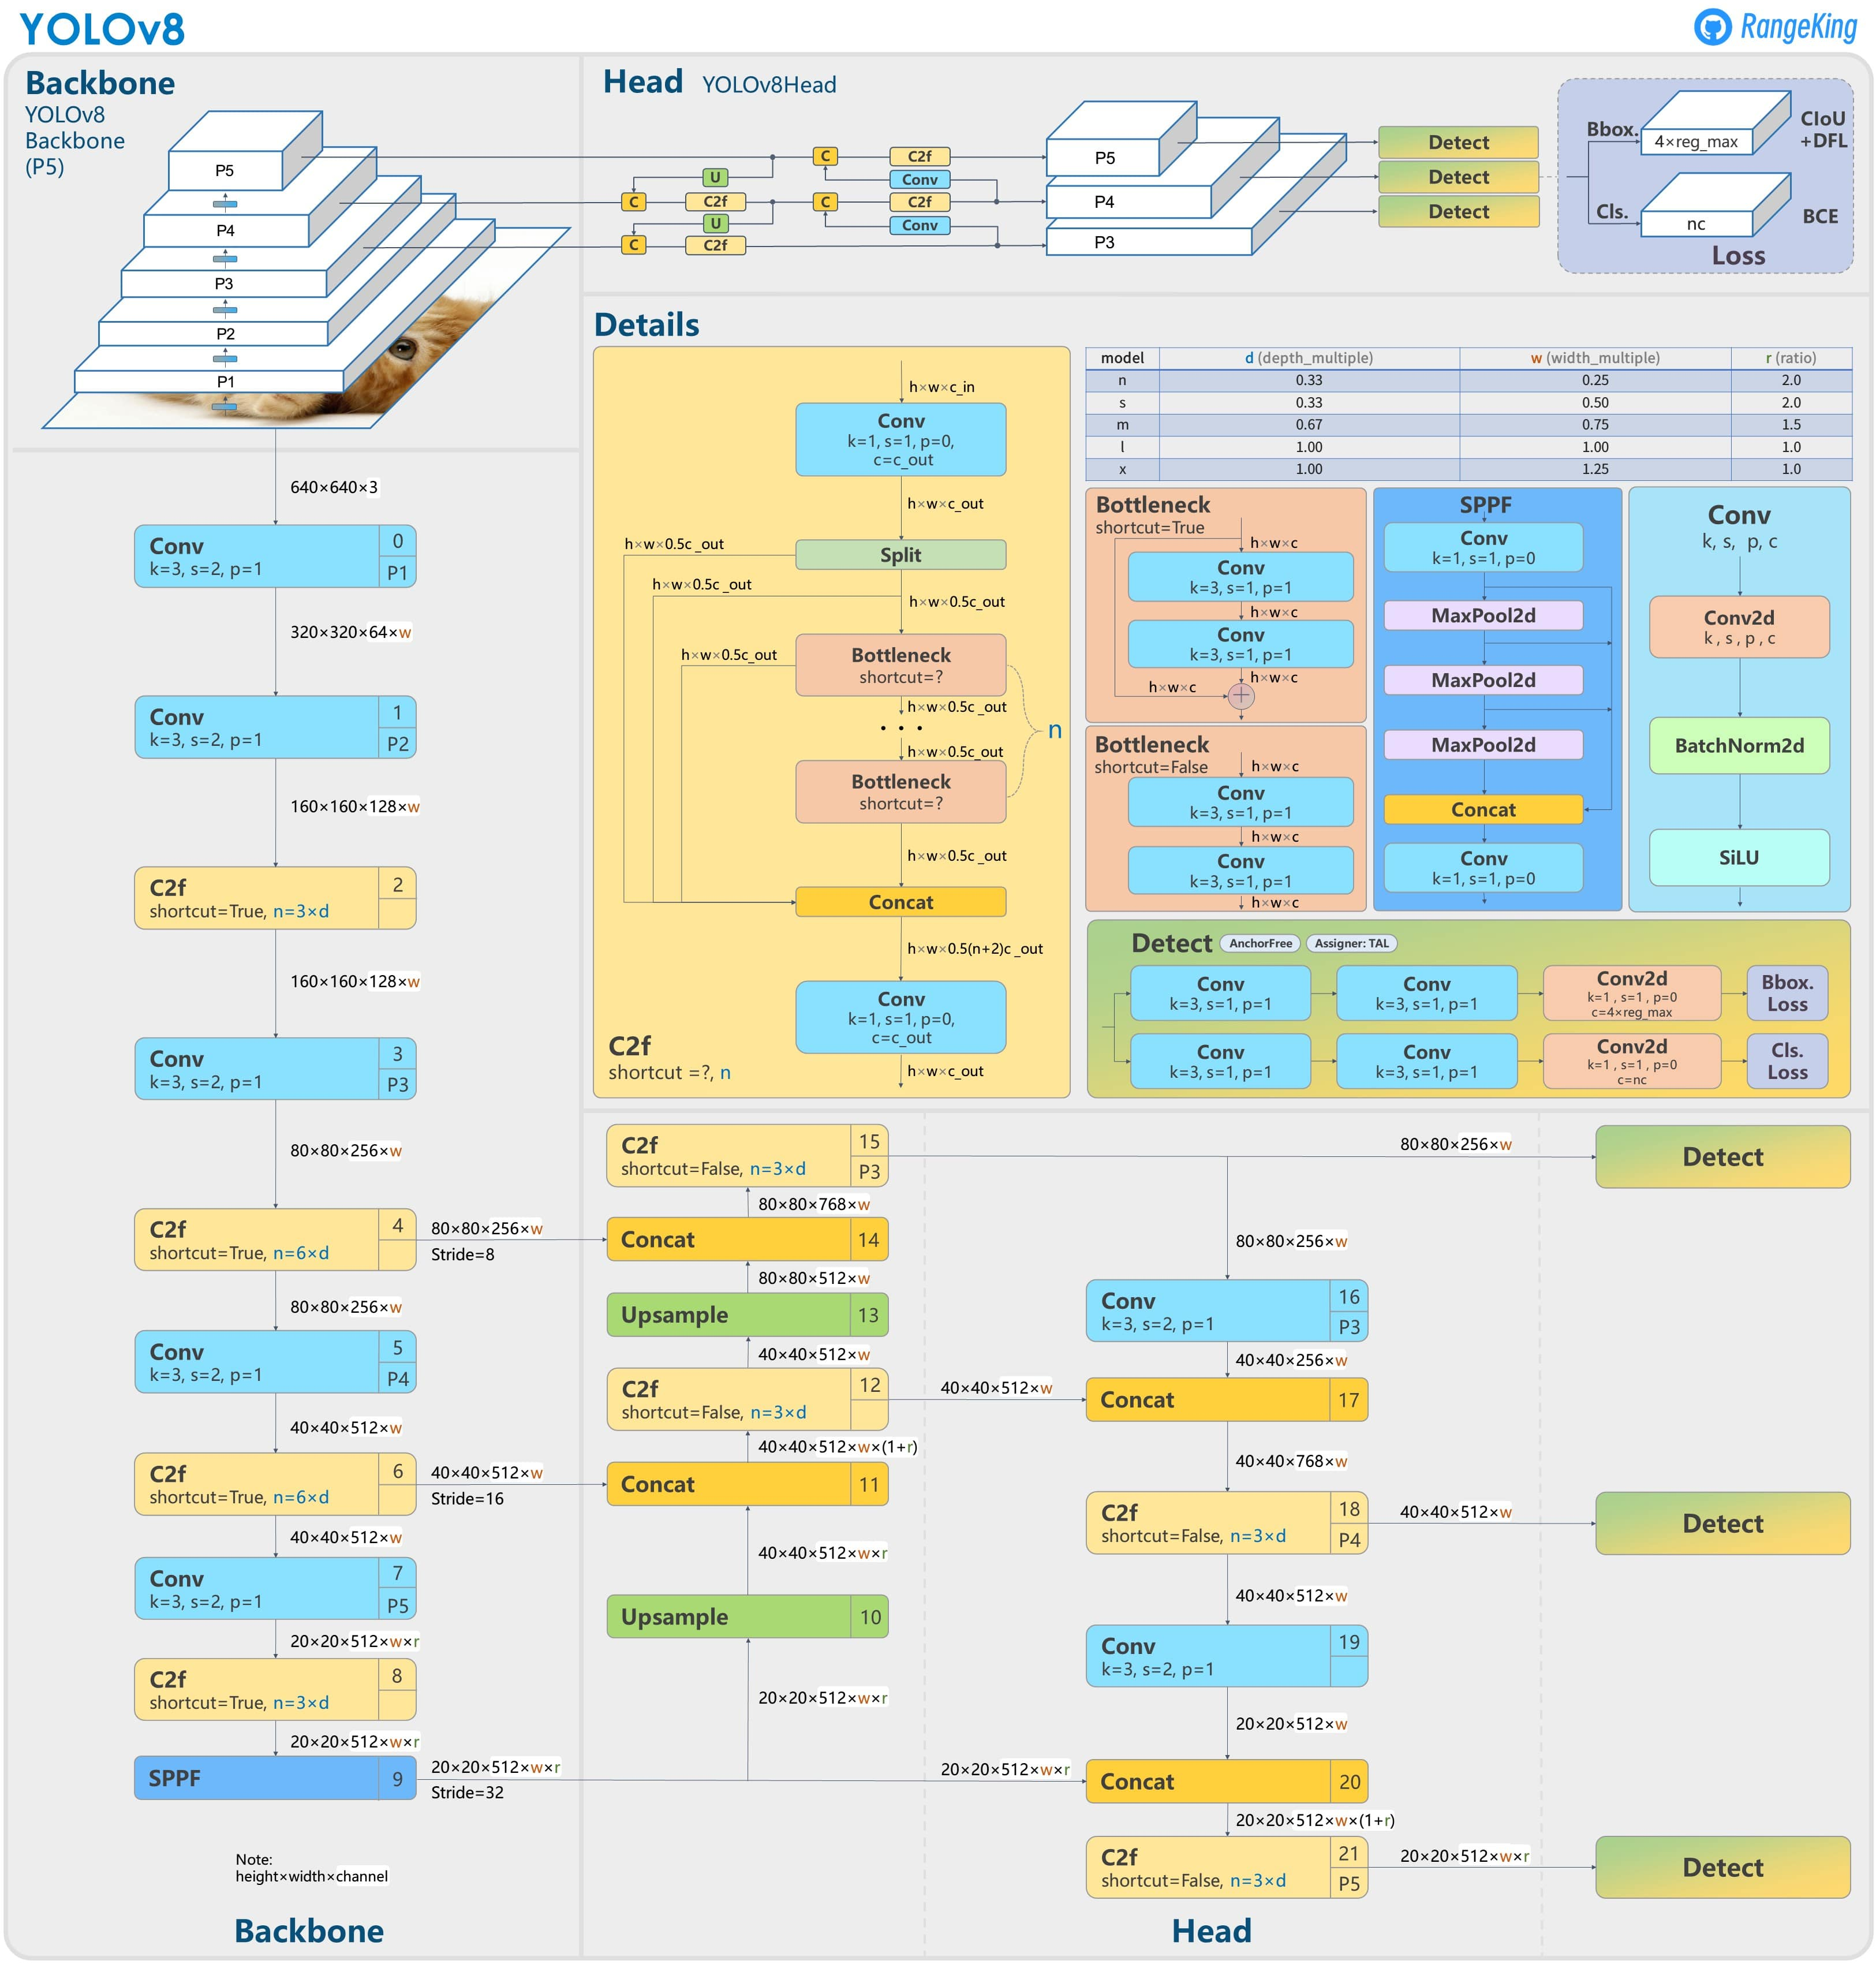

### Creación del modelo

En este proyecto, hemos decidido utilizar la implementación de YOLOv8 proporcionada por [Ultralytics](https://docs.ultralytics.com/models/yolov8/) debido a su facilidad de uso y flexibilidad.

In [ ]:
from ultralytics import YOLO
from PIL import Image

# Creamos el modelo: YOLOv8m preentranado
yolo_version = "yolov8m.pt"
model_Yolo = YOLO(yolo_version)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 160MB/s]


### Predicción sin entrenamiento

Antes de entrenar el modelo, se va a realizar una predicción de una imagen para poder comparar el antes y el después de la precisión del modelo tras su entrenamiento.

In [ ]:
# Imagen a predecir
image_file = PATH_IMG_TEST + '/airport_20_jpg.rf.84d6aa6622df2998c395dc7e5fedd94e.jpg'

# Predicción
predictions = model_Yolo.predict(source=image_file, save=True)


image 1/1 /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/test/images/airport_20_jpg.rf.84d6aa6622df2998c395dc7e5fedd94e.jpg: 640x640 (no detections), 1854.4ms
Speed: 19.6ms preprocess, 1854.4ms inference, 15.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


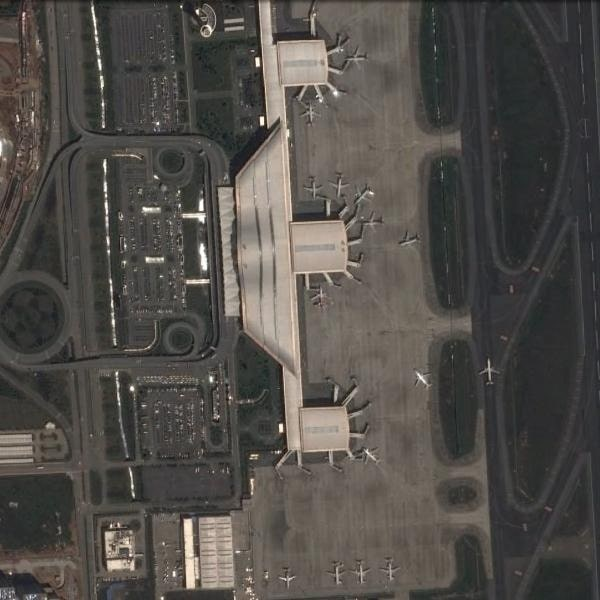

Al observar la imagen resultante que contiene las bounding boxes de los objetos encontrados podemos observar que por ahora no es capaz de realizar ninguna detección de ningún avión.

### Entrenamiento


Para poder entrenar cualquier modelo, es necesario especificar las configuraciones y parámetros a utilizar para entrenar y ejecutar el modelo de forma eficiente y flexible.

Parte de esta configuración se va a encontrar en los archivos **YAML**, los cuales nos van a servir para poder indicar principalmente las rutas a las imágenes (ya sean del conjunto de entrenamiento, validación o test) y la cantidad y nombres de las clases a detectar, entre otros.

Además, también es necesario ajustar los valores de los [hiperparámetros](https://docs.ultralytics.com/modes/train/#train-settings) para un correcto entrenamiento y, por tanto, mejores predicciones. Los valores que van a tomar estos serán los siguientes:

- **Número de épocas**: $25$, número suficiente para obtener buenos resultados y evitar el sobreajuste.
- **Tamaño de batch**: $8$, máxima potencia de 2 que permite Google Colab.
- **Tamaño de imagen**: $600$, tamaño de las imágenes de los conjuntos de datos.
- **_Learning rate_ incial**: $10^{-3}$, correspondiente con Adam.
- **_Learning rate_ final**: $10^{-5}$, buen valor para evitar una temprana convergencia o la ausencia de la misma.
- **Paciencia de _early stopping_**: 5, para evitar sobreajuste y no desperdiciar recursos computacionales.

YOLOv8 utiliza 3 funciones de pérdida, entre las que encontramos:

- `box_loss`: corresponde con **CIoU (Complete Intersection over Union) loss**. Mejora la precisión de la localización de las bounding boxes a través de regresión. Esta es una mejora de IoU Loss (Intersection over Union Loss), diseñada para medir la calidad de las predicciones de cajas delimitadoras en tareas de detección de objetos. No solo tiene en cuenta la superposición entre la caja predicha y la real, sino también otros factores como la distancia y el aspecto. Se puede expresar con la siguiente fórmula:
  $$
  L_{\text{CIoU}} = 1 - \text{IoU} + \frac{\rho^2(b, b^g)}{c^2} + \alpha v
  $$
  Donde:

  - $\text{IoU}$: _Intersection over Union_, que mide la superposición entre la caja predicha y la real.

  - $\rho (b, b^g)$: Distancia euclidiana entre los centros de la caja predicha $(b)$ y la real $(b^g)$.

  - $c$: Diagonal del rectángulo mínimo que contiene ambas cajas.

  - $v$: Término que mide la diferencia en la relación de aspecto de las cajas, definido como:

    $$
    v = \frac{4}{\pi^2} \left( \arctan\left(\frac{w^g}{h^g}\right) - \arctan\left(\frac{w}{h}\right) \right)^2
    $$

  - $\alpha$: Factor de ajuste que pondera $v$, calculado como:

    $$
    \alpha = \frac{v}{(1 - \text{IoU}) + v}
    $$

    ![CIoU loss](https://www.researchgate.net/profile/Hong-Vin-Koay-2/publication/355427005/figure/fig5/AS:1080926331252740@1634724328385/CIoU-calculation-conceptualized-The-classification-function-L-cls-only-penalizes-if.png)

- `cls_loss`: corresponde con **VFL (Varifocal Loss) loss**. Está diseñada para abordar los desequilibrios y las incertidumbres en las tareas de clasificación. Intenta optimizar las probabilidades de detecciones verdaderas (*true positive*) y minimizar las probabilidades de falsos positivos (*false positive*). Se puede expresar con la siguiente fórmula:
  $$
  \text{VFL}(p, q) =
  \begin{cases}
  -q \left( q \log(p) + (1 - q) \log(1 - p) \right) & q > 0, \\
  -\alpha p^\gamma \log(1 - p) & q = 0.
  \end{cases}
  $$
  Donde:

  - $p$: representa la **probabilidad predicha** por el modelo para que una clase sea positiva. Está en el rango $[0, 1]$ donde $p=1$ indica alta confianza en que el objeto pertenece a la clase objetivo, y $p=0$ indica lo contrario.
  - $q$: Se utiliza para ajustar la importancia de la predicción, basándose en la calidad de la correspondencia entre un ancla y el objeto real. Cuanto mayor sea el valor, mayor correspondencia habrá.
  - $\gamma$: Es el **coeficiente de focalización**, que controla cuánto penalizar las predicciones incorrectas para los ejemplos difíciles.
  - $\alpha$: Es un **factor de ponderación** que controla la contribución de los ejemplos negativos (cuando $q=0$). Ayuda a equilibrar la influencia de los ejemplos positivos y negativos en el cálculo de la pérdida.

  ![VFL loss](https://learnopencv.com/wp-content/uploads/2024/02/varifocal-loss.png)

- `dfl_loss`: corresponde con **DFL (Distribution Focal Loss) loss**. Mejora la estimación de las categorías de los objetos detectados.

### Configuración de entrenamiento

In [ ]:
# Configuración del entrenamiento
IMG_SIZE = 600

train_config = {
    "epochs": 25,                                # Número de épocas
    "batch": 8,                                  # Tamaño del batch
    "imgsz": IMG_SIZE,                           # Tamaño de entrada de imágenes
    "optimizer": "AdamW",                        # Optimizador para entrenamiento
    "lr0": 0.001,                                # Tasa de aprendizaje inicial
    "lrf": 0.01,                                 # Factor para calcular lr_max (lr_max = lr0 * lrf)
    "device": "cuda",                            # Utilizar GPU si está disponible
    "name": "plane_detection",                   # Nombre de la corrida de entrenamiento
    "save_period": -1,                           # Guardar modelo después de cada época
    "verbose": True,                             # Mostrar detalles durante el entrenamiento
    "patience": 5,                               # Early stopping: paciencia de 5 épocas
    "plots": True                                # Genera y guarda gráficos de métricas de entrenamiento y validación
}

### Conjunto de datos original

#### Entrenamiento


In [ ]:
train_config["data"] = PATH_PROYECTO + "data.yaml" # Ruta a un archivo YAML que describe el dataset (clases, directorios)
train_config["project"] = PATH_PROYECTO + "yolo_project/"  # Carpeta donde se guardarán los resultados

In [ ]:
# Entrenar el modelo
results = model_Yolo.train(**train_config)

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/My Drive/Colab Notebooks/VC_PROYECTO/data.yaml, epochs=25, time=None, patience=5, batch=8, imgsz=600, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/, name=plane_detection21, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.7MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]


train: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/train/labels.cache... 708 images, 9 backgrounds, 0 corrupt: 100%|██████████| 708/708 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/valid/labels.cache... 68 images, 2 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


Plotting labels to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection21/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 608 train, 608 val
Using 2 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection21
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.63G      1.809      1.324      1.142         81        608: 100%|██████████| 89/89 [00:31<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all         68       1018      0.756      0.712      0.764       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.62G      1.648     0.9365      1.075         62        608: 100%|██████████| 89/89 [00:28<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]

                   all         68       1018      0.855      0.802      0.872      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.58G      1.592     0.9033      1.052         67        608: 100%|██████████| 89/89 [00:29<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all         68       1018      0.885      0.801      0.862      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.46G      1.561     0.8444      1.046         42        608: 100%|██████████| 89/89 [00:28<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]


                   all         68       1018      0.875      0.832      0.892      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.59G      1.528     0.8145      1.031         65        608: 100%|██████████| 89/89 [00:27<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]

                   all         68       1018      0.873      0.816       0.89      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.54G      1.514     0.7931      1.017         68        608: 100%|██████████| 89/89 [00:28<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]

                   all         68       1018      0.885      0.821      0.892      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.47G      1.521     0.8067      1.026        140        608: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all         68       1018      0.914      0.864      0.921      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.48G      1.489     0.7594       1.01         73        608: 100%|██████████| 89/89 [00:27<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


                   all         68       1018      0.914      0.848      0.908      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       3.6G      1.432     0.7383          1         74        608: 100%|██████████| 89/89 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all         68       1018      0.904      0.859       0.91      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.55G       1.47     0.7357      1.003         64        608: 100%|██████████| 89/89 [00:31<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all         68       1018      0.914      0.869      0.932      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.61G      1.459     0.7097      1.006        152        608: 100%|██████████| 89/89 [00:27<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]

                   all         68       1018      0.914      0.871      0.935      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.47G      1.469     0.7198      1.003         40        608: 100%|██████████| 89/89 [00:27<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]

                   all         68       1018      0.922      0.896      0.937      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.45G      1.398     0.6783     0.9917        109        608: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]

                   all         68       1018      0.933      0.884      0.942      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.69G      1.401     0.6838     0.9883         67        608: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all         68       1018      0.917      0.881      0.932      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.81G        1.4     0.6934     0.9907         69        608: 100%|██████████| 89/89 [00:27<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]

                   all         68       1018      0.902      0.863      0.926      0.517


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.42G      1.383     0.6587      1.003         22        608: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]

                   all         68       1018      0.941      0.883      0.937      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.48G      1.392     0.6322      1.009         39        608: 100%|██████████| 89/89 [00:27<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all         68       1018       0.92      0.873      0.928      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.46G      1.356     0.6272      1.005         22        608: 100%|██████████| 89/89 [00:27<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]

                   all         68       1018      0.926        0.9      0.943      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.45G      1.324      0.599     0.9876         91        608: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]

                   all         68       1018      0.923      0.889       0.94      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.38G      1.321     0.5966     0.9876         64        608: 100%|██████████| 89/89 [00:28<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]


                   all         68       1018      0.915      0.896      0.948      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.44G      1.296     0.5829     0.9742         32        608: 100%|██████████| 89/89 [00:26<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]

                   all         68       1018      0.935      0.904      0.952      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.44G      1.285     0.5721     0.9699         39        608: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]

                   all         68       1018      0.934      0.876      0.941      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.43G      1.268     0.5523     0.9705         62        608: 100%|██████████| 89/89 [00:27<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

                   all         68       1018       0.94      0.893      0.953      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       3.4G      1.254     0.5516     0.9619         64        608: 100%|██████████| 89/89 [00:26<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]

                   all         68       1018      0.932      0.905      0.946      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.46G      1.241     0.5343     0.9584         69        608: 100%|██████████| 89/89 [00:28<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all         68       1018      0.935      0.909      0.949      0.544



25 epochs completed in 0.225 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection21/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection21/weights/best.pt, 52.0MB

Validating /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection21/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


                   all         68       1018      0.935      0.909      0.949      0.544
Speed: 0.4ms preprocess, 10.8ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection21


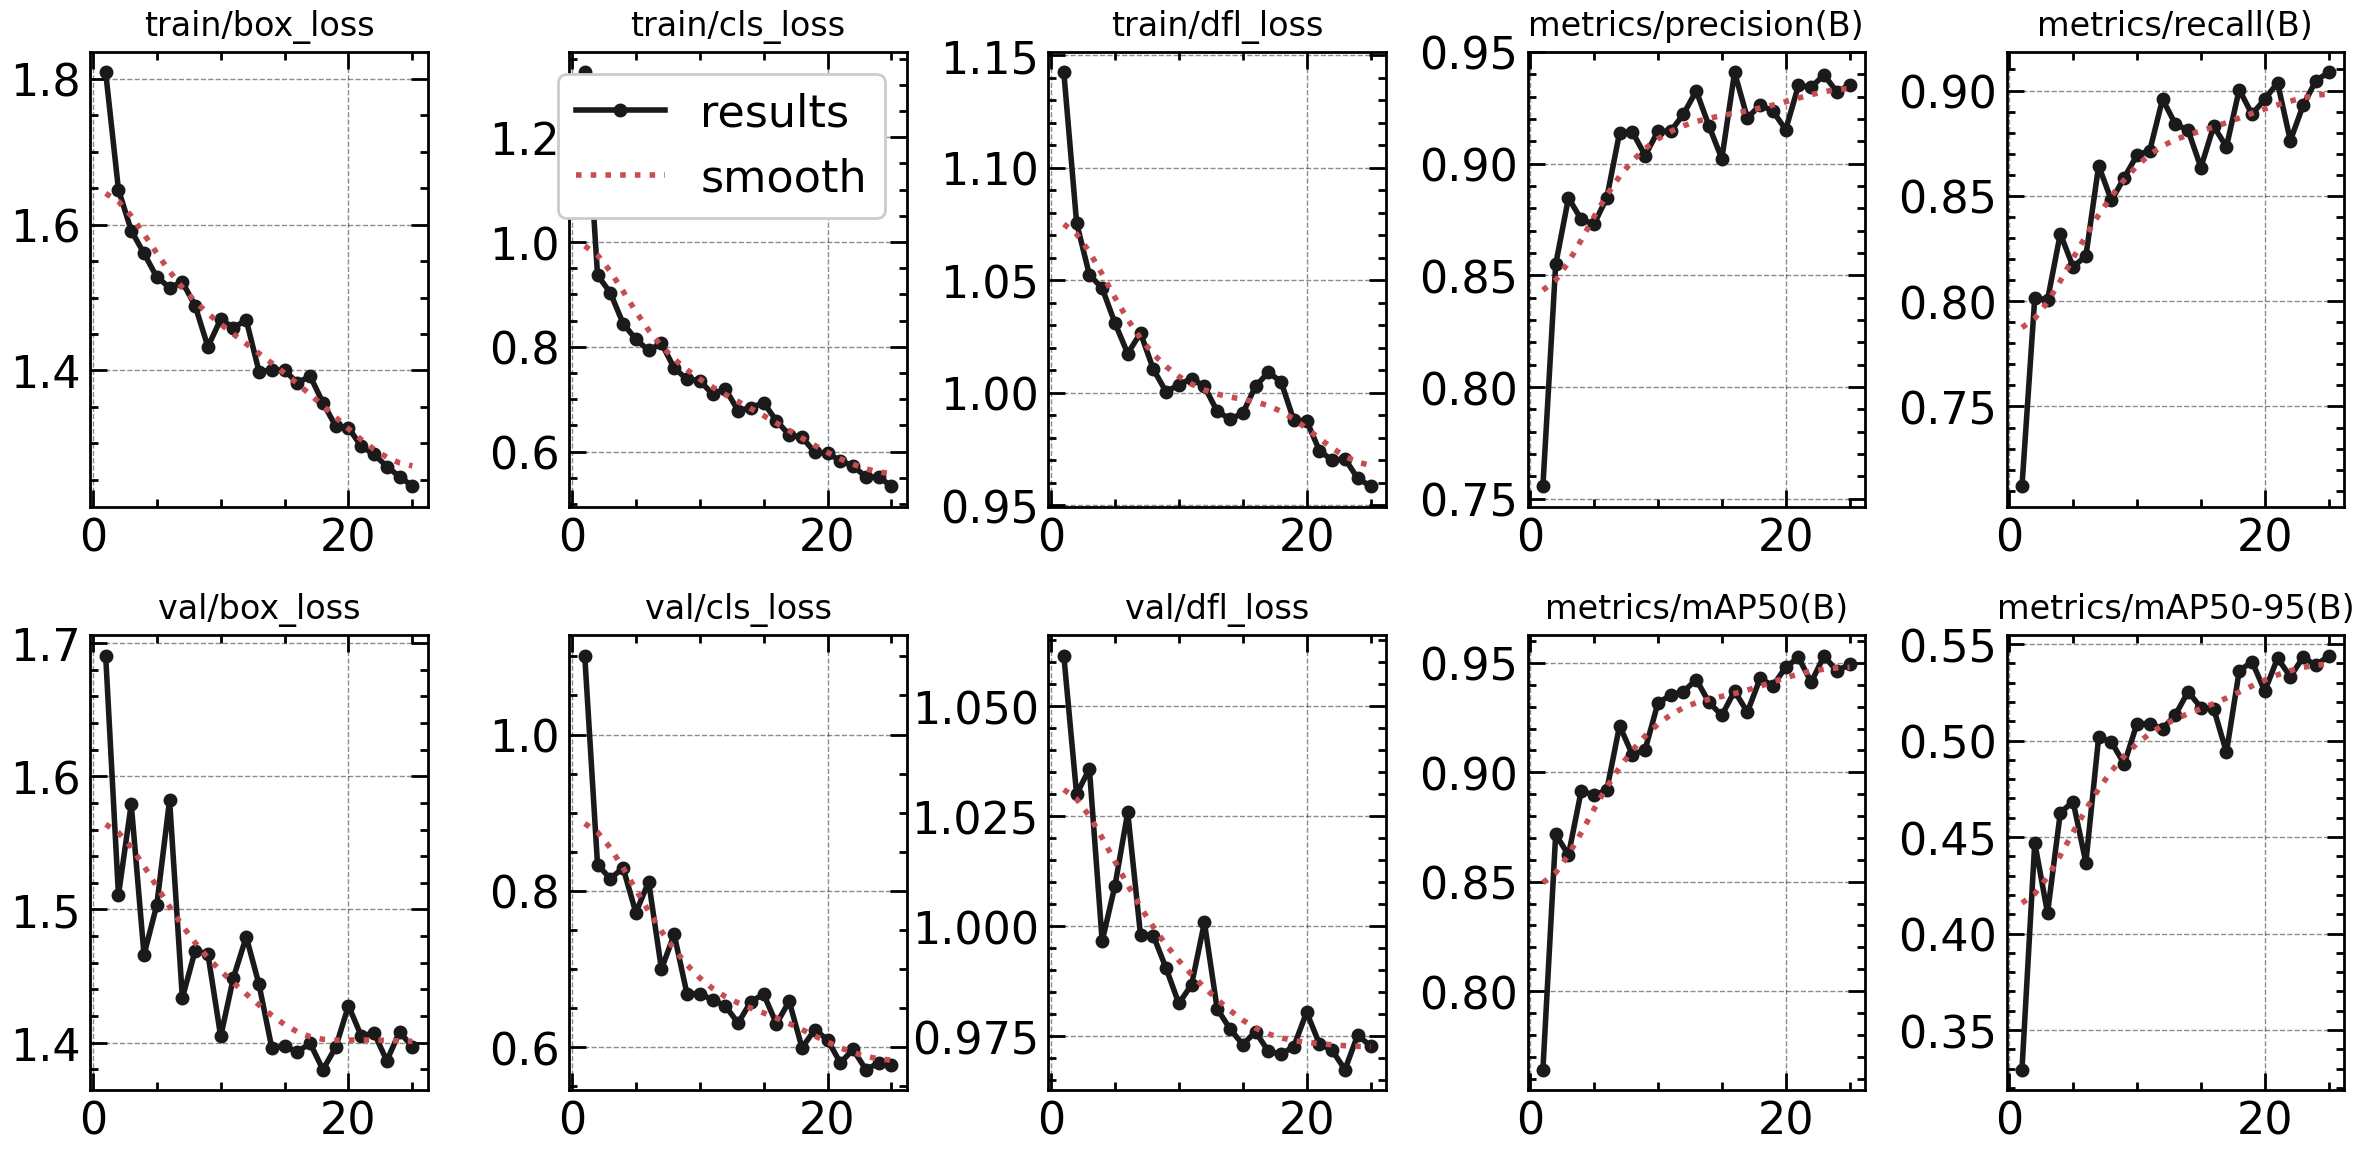

#### Predicción

In [ ]:
# Imágenes a predecir
image1 = PATH_IMG_TEST + '/airport_20_jpg.rf.84d6aa6622df2998c395dc7e5fedd94e.jpg'
image2 = PATH_IMG_TEST + '/airport_100_jpg.rf.f764c95324c38a84bc2af17b1243f913.jpg'
image3 = PATH_IMG_TEST + '/airport_214_jpg.rf.3a324502759ab9fd15748acff0fcdafc.jpg'
image4 = PATH_IMG_TEST + '/airport_241_jpg.rf.48233f88e0aba89db4dd06f40b5c3514.jpg'
image5 = PATH_IMG_TEST + '/airport_252_jpg.rf.7e946be8b045c7ef244a5198dbd91e67.jpg'

# Array con las imágenes
Images = [image1, image2, image3, image4, image5]

# Confianza mínima
conf = 0.5

# Predicción
predictions = model_Yolo.predict(source=Images, save=True, conf=conf)


0: 608x608 15 airplanes, 31.9ms
1: 608x608 25 airplanes, 31.9ms
2: 608x608 8 airplanes, 31.9ms
3: 608x608 6 airplanes, 31.9ms
4: 608x608 5 airplanes, 31.9ms
Speed: 5.9ms preprocess, 31.9ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 608)
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection212


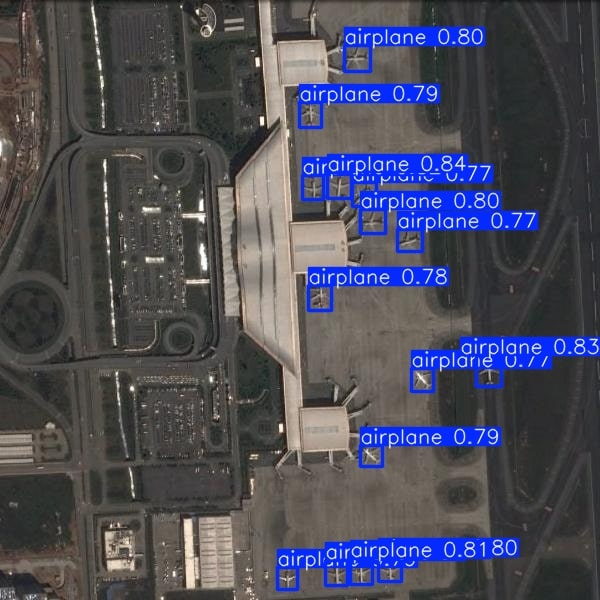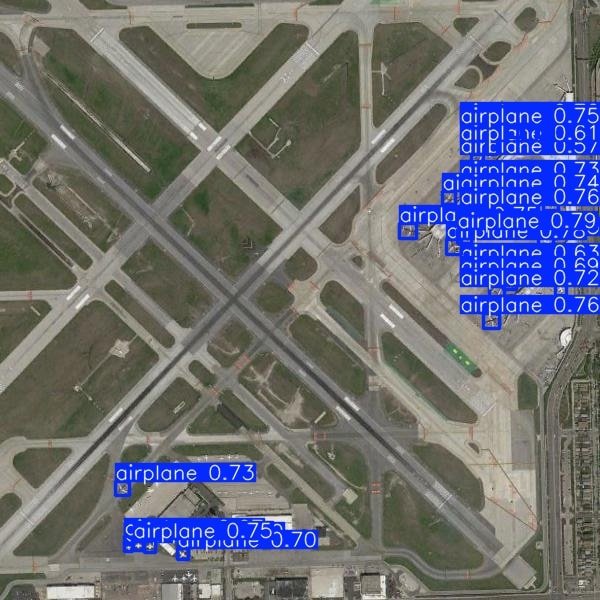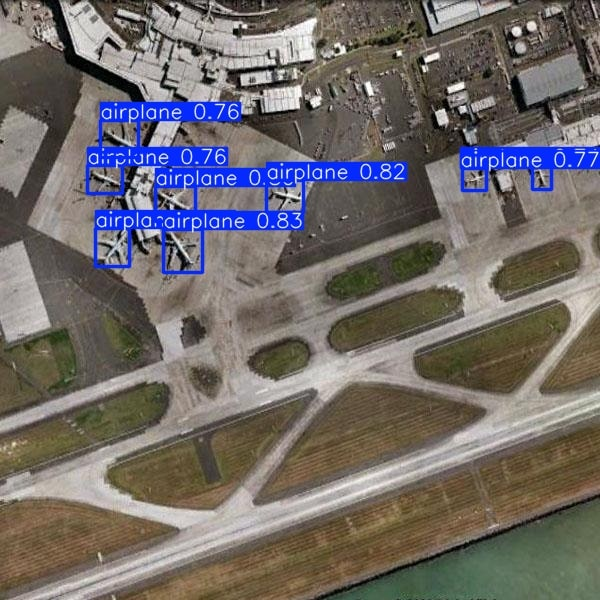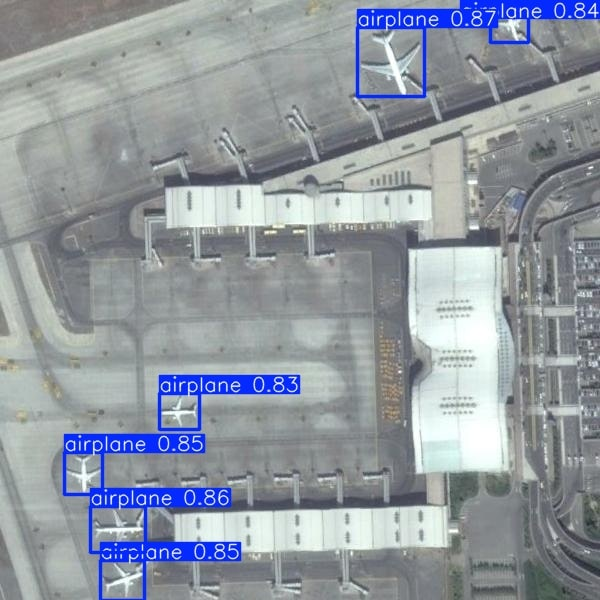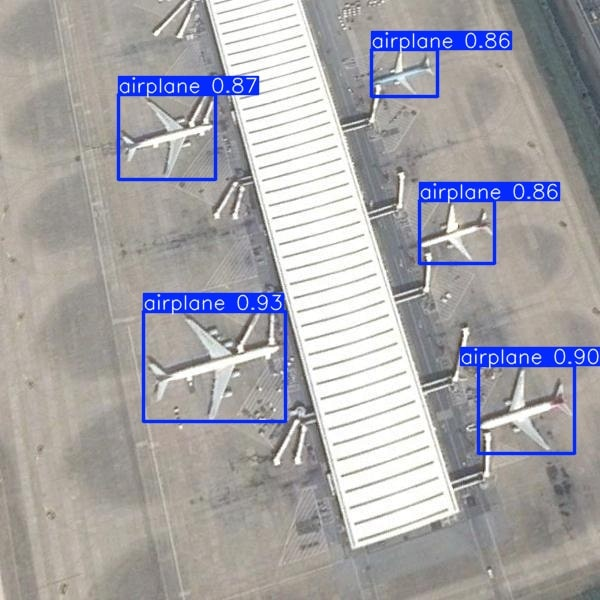

#### Evaluación

Una vez que hemos entrenado el modelo, vamos a realizar la evaluación con todos los conjuntos (Train, Valid, y Test) para tener la información. Para ello vamos a usar la función `val` de `Ultralytics` la cual nos ofrece una serie de métricas para la evaluación de este modelo.

##### Evaluación en Train

In [ ]:
# Evaluación y métricas del modelo en el conjunto Train
metrics = model_Yolo.val(data=PATH_PROYECTO + "data.yaml", imgsz=IMG_SIZE, split = 'train')

print("Mean Average Precision (IoU 50-95): ", metrics.box.map)
print("Mean Average Precision (IoU 50): ", metrics.box.map50)
print("Mean Average Precision (IoU 75): ", metrics.box.map75)
print("Average Precision (IoU 50-95): ", metrics.box.ap)
print("Average Precision (IoU 50): ", metrics.box.ap50)
print("Precision: ", metrics.box.p)
print("Recall: ", metrics.box.r)
print("F1 Score: ", metrics.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/train/labels.cache... 708 images, 9 backgrounds, 0 corrupt: 100%|██████████| 708/708 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:27<00:00,  3.23it/s]


                   all        708      10216      0.947       0.93      0.971      0.632
Speed: 0.5ms preprocess, 22.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection215
Mean Average Precision (IoU 50-95):  0.6317444705058277
Mean Average Precision (IoU 50):  0.9711826321948056
Mean Average Precision (IoU 75):  0.7315015530969687
Average Precision (IoU 50-95):  [    0.63174]
Average Precision (IoU 50):  [    0.97118]
Precision:  [    0.94679]
Recall:  [    0.93013]
F1 Score:  [    0.93839]


Como se puede observar, para el conjunto de entrenamiento del conjunto de datos original se muestran unos resultados más que aceptables, sobre todo en términos de precisión. Los valores de **Average Precision (AP)** muestran una sobresaliente de los objetos a detectar para un **IoU = 50** con un valor de **AP = 97.11%**, por lo que prácticamente en todos los casos se va a lograr identificar correctamente todos los objetos.

Respecto a detecciones más restrictivas, cuando **IoU = 75** logramos obtener un valor de **AP = 73.15%**, demostrando que gran parte de las predicciones tienen gran rigurosidad, teniendo un valor incluso más alto que para la métrica global (**IoU = 50-95**) el cual es del **63.17%**, lo que indica que la mayoría de las detecciones se realizan para los valores de IoU superiores a 95, reforzando así su gran destreza prediciendo.

Con un **Recall del 93.01%**, el modelo demuestra su capacidad para identificar la mayoría de los objetos presentes en las imágenes, minimizando la cantidad de falsos negativos, asegurando que casi ningún objeto se quede sin detectar. Además, el **F1 score**, que combina precisión y recall en una única métrica, es de **93.83%**, lo que indica que el modelo logra un excelente equilibrio entre ambos aspectos, optimizando tanto la exactitud (**Precision del 94.67%**)) como la cobertura en la detección de objetos.

##### Evaluación en Valid

In [ ]:
# Evaluacion y métricas del modelo en el conjunto Valid
metrics = model_Yolo.val(data=PATH_PROYECTO + "data.yaml", imgsz=IMG_SIZE, split = 'val')

print("Mean Average Precision (IoU 50-95): ", metrics.box.map)
print("Mean Average Precision (IoU 50): ", metrics.box.map50)
print("Mean Average Precision (IoU 75): ", metrics.box.map75)
print("Average Precision (IoU 50-95): ", metrics.box.ap)
print("Average Precision (IoU 50): ", metrics.box.ap50)
print("Precision: ", metrics.box.p)
print("Recall: ", metrics.box.r)
print("F1 Score: ", metrics.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/valid/labels.cache... 68 images, 2 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]


                   all         68       1018      0.933      0.907      0.948      0.547
Speed: 0.5ms preprocess, 26.9ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection217
Mean Average Precision (IoU 50-95):  0.547190942909417
Mean Average Precision (IoU 50):  0.9478310007855265
Mean Average Precision (IoU 75):  0.581966870309318
Average Precision (IoU 50-95):  [    0.54719]
Average Precision (IoU 50):  [    0.94783]
Precision:  [    0.93305]
Recall:  [    0.90668]
F1 Score:  [    0.91967]


Como se puede observar, los resultados obtenidos para el conjunto de validación del conjunto de datos original muestran un desempeño muy bueno, especialmente en términos de precisión y capacidad de detección de objetos.

Los valores de **Average Precision (AP)** destacan particularmente en el caso de un **IoU = 50**, donde se logra un valor sobresaliente de **AP = 94.78%**, lo que significa que el modelo es capaz de identificar correctamente prácticamente todos los objetos cuando se permite un cierto margen de superposición en las predicciones.

En escenarios más restrictivos, como cuando **IoU = 75**, el modelo alcanza un **AP = 58.20%**. Aunque este valor es más bajo que el obtenido con un IoU más laxo, sigue siendo una cifra significativa que indica que más de la mitad de las predicciones tienen una rigurosidad considerable en su alineación con las cajas reales. Esto se complementa con la métrica global (**IoU = 50-95**), donde el modelo logra un **AP = 54.72%**, lo que sugiere que la calidad de las predicciones disminuye a medida que aumenta la exigencia de superposición, pero se mantiene un desempeño consistente a través de todo el rango de IoU.

En cuanto a la cobertura de las detecciones, el modelo obtiene un **Recall del 90.67%**, lo que indica que identifica una gran mayoría de los objetos presentes en las imágenes, minimizando la cantidad de falsos negativos. Esto asegura que muy pocos objetos relevantes queden sin ser detectados, lo cual es crucial en aplicaciones donde la cobertura es prioritaria.

El **F1 Score**, que combina precisión y recall en una métrica unificada, es de **91.97%**, lo que resalta el excelente equilibrio entre estos dos aspectos clave. Además, la **precisión del 93.31%** reafirma la capacidad del modelo para generar detecciones correctas, con una muy baja proporción de falsos positivos.

##### Evaluación en Test

In [ ]:
# Evaluacion y métricas del modelo en el conjunto Test
metrics = model_Yolo.val(data=PATH_PROYECTO + "data.yaml", imgsz=IMG_SIZE, split = 'test')

print("Mean Average Precision (IoU 50-95): ", metrics.box.map)
print("Mean Average Precision (IoU 50): ", metrics.box.map50)
print("Mean Average Precision (IoU 75): ", metrics.box.map75)
print("Average Precision (IoU 50-95): ", metrics.box.ap)
print("Average Precision (IoU 50): ", metrics.box.ap50)
print("Precision: ", metrics.box.p)
print("Recall: ", metrics.box.r)
print("F1 Score: ", metrics.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/test/labels... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:26<00:00,  1.26it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


                   all         34        497      0.925      0.918      0.954      0.561
Speed: 0.6ms preprocess, 44.1ms inference, 0.1ms loss, 11.2ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/yolo_project/plane_detection218
Mean Average Precision (IoU 50-95):  0.5610370638395088
Mean Average Precision (IoU 50):  0.9542543060755015
Mean Average Precision (IoU 75):  0.5857175988410565
Average Precision (IoU 50-95):  [    0.56104]
Average Precision (IoU 50):  [    0.95425]
Precision:  [     0.9247]
Recall:  [    0.91751]
F1 Score:  [    0.92109]


Los resultados obtenidos muestran un rendimiento sólido y equilibrado del modelo en el conjunto de test del conjunto de datos original, destacando tanto en precisión como en capacidad de detección. Esto lo convierte en una herramienta confiable para tareas de detección de objetos, incluso bajo diferentes niveles de exigencia.

El **Mean Average Precision (IoU 50)**, con un valor de **95.43%**, evidencia que el modelo es altamente efectivo en identificar correctamente los objetos cuando se permite un margen más laxo de superposición entre las predicciones y las etiquetas reales. Este resultado refleja una capacidad sobresaliente del modelo para realizar detecciones precisas en situaciones menos restrictivas, lo cual es crucial para aplicaciones en las que la tolerancia a pequeñas desviaciones es aceptable.

Al analizar el desempeño bajo criterios más estrictos, representados por el **Mean Average Precision (IoU 75)**, el modelo mantiene un **mAP de 58.57%**. Esto indica que, aunque la exigencia aumenta, una proporción significativa de las predicciones sigue siendo precisa y consistente. Este resultado demuestra la robustez del modelo en escenarios donde es fundamental que las bounding boxes estén alineadas con un alto grado de exactitud con las cajas reales.

Por otro lado, al considerar el rango completo de IoU (de 50 a 95), el **Mean Average Precision (IoU 50-95)** alcanza un **56.10%**. Aunque este valor es menor que los obtenidos para IoU específicos, sigue siendo representativo de la consistencia global del modelo. Este resultado sugiere que el modelo mantiene un desempeño equilibrado en un rango amplio de niveles de superposición, lo que lo hace adecuado para tareas que requieren flexibilidad en la evaluación de la calidad de las predicciones.

En cuanto a la **precisión**, el modelo logra un valor de **92.47%**, lo que significa que casi todas las detecciones realizadas son correctas y que la cantidad de falsos positivos es mínima. Esto es fundamental en aplicaciones donde los errores en las detecciones pueden tener un impacto significativo. Por su parte, el **recall**, con un valor de **91.75%**, indica que el modelo tiene una gran capacidad para identificar la mayoría de los objetos presentes en las imágenes, asegurando que pocos objetos queden sin ser detectados. Este balance entre precisión y recall es fundamental para tareas que requieren tanto confiabilidad como una alta cobertura de detección.

Finalmente, el **F1 Score**, que combina precisión y recall en una métrica única, alcanza un **92.11%**, resaltando el excelente equilibrio logrado por el modelo. Este valor refleja que el modelo no solo es preciso en sus predicciones, sino que también tiene una cobertura adecuada, optimizando ambos aspectos esenciales en detección de objetos.

### Conjunto de datos sin Data Augmentation

#### Entrenamiento

In [ ]:
model_YoloDA = YOLO(yolo_version)

In [ ]:
train_config["data"] = PATH_PROYECTO_SIN_DA + "data.yaml" # Ruta a un archivo YAML que describe el dataset (clases, directorios)
train_config["project"] = PATH_PROYECTO_SIN_DA + "yolo_project/"  # Carpeta donde se guardarán los resultados

In [ ]:
results = model_YoloDA.train(**train_config)

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/data.yaml, epochs=25, time=None, patience=5, batch=8, imgsz=600, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/, name=plane_detection11, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

100%|██████████| 755k/755k [00:00<00:00, 53.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 300MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]


train: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_SIN_DA/train/labels... 236 images, 3 backgrounds, 0 corrupt: 100%|██████████| 236/236 [03:35<00:00,  1.10it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_SIN_DA/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_SIN_DA/valid/labels... 68 images, 2 backgrounds, 0 corrupt: 100%|██████████| 68/68 [01:56<00:00,  1.71s/it]

val: New cache created: /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_SIN_DA/valid/labels.cache


Plotting labels to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection11/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 608 train, 608 val
Using 2 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection11
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.87G      1.995      1.923      1.179         79        608: 100%|██████████| 30/30 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all         68       1018      0.621      0.498      0.558      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.59G      1.692      1.059      1.068         82        608: 100%|██████████| 30/30 [00:08<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all         68       1018      0.781      0.731      0.788      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.44G      1.628      0.946      1.038        139        608: 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all         68       1018      0.841      0.787      0.859      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.41G      1.547     0.8575      1.026         57        608: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]

                   all         68       1018      0.837      0.774      0.842      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.75G        1.6     0.8683      1.026         62        608: 100%|██████████| 30/30 [00:10<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


                   all         68       1018      0.847      0.714      0.817      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.51G      1.557     0.8252      1.015         48        608: 100%|██████████| 30/30 [00:08<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all         68       1018       0.91      0.809      0.878      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.39G      1.535     0.8172      1.014        105        608: 100%|██████████| 30/30 [00:09<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all         68       1018      0.901       0.79      0.877       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.39G      1.553     0.8289      1.015        115        608: 100%|██████████| 30/30 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]

                   all         68       1018        0.9      0.799      0.882      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       3.4G      1.484     0.8158      1.013         14        608: 100%|██████████| 30/30 [00:09<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all         68       1018      0.919      0.818       0.91      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.37G      1.423     0.7159     0.9992         47        608: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all         68       1018      0.908       0.82      0.894      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       3.4G      1.469     0.7531      1.009        127        608: 100%|██████████| 30/30 [00:10<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]

                   all         68       1018       0.89      0.806      0.878      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.45G      1.471     0.7336      0.967        100        608: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

                   all         68       1018      0.891      0.861      0.912      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.71G      1.485     0.7446     0.9829         38        608: 100%|██████████| 30/30 [00:09<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]

                   all         68       1018      0.905      0.856      0.916      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.68G      1.419     0.7033     0.9823        121        608: 100%|██████████| 30/30 [00:08<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all         68       1018      0.926      0.832      0.912      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.48G      1.395     0.6948     0.9725         83        608: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]

                   all         68       1018      0.921      0.861      0.919      0.499


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.49G      1.396     0.6652      1.005         48        608: 100%|██████████| 30/30 [00:11<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all         68       1018       0.91      0.864      0.925      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.47G      1.373     0.6553      1.002         25        608: 100%|██████████| 30/30 [00:08<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all         68       1018       0.91      0.882      0.931      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.41G      1.364      0.652     0.9993         78        608: 100%|██████████| 30/30 [00:10<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all         68       1018      0.914      0.868      0.932      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.37G       1.37     0.6532     0.9756         81        608: 100%|██████████| 30/30 [00:10<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all         68       1018      0.917      0.874      0.933      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.45G      1.371     0.6438     0.9807         63        608: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all         68       1018      0.926      0.884      0.936       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.48G      1.374     0.6276     0.9829         83        608: 100%|██████████| 30/30 [00:09<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]

                   all         68       1018       0.93       0.88      0.936      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.46G      1.345     0.6164     0.9554         80        608: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]

                   all         68       1018      0.932      0.874      0.932      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.46G      1.351     0.6195     0.9736         58        608: 100%|██████████| 30/30 [00:10<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]

                   all         68       1018      0.937      0.871      0.934      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.47G       1.33     0.6094     0.9682         19        608: 100%|██████████| 30/30 [00:08<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all         68       1018      0.928      0.876      0.932      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.47G      1.326     0.5964     0.9667        151        608: 100%|██████████| 30/30 [00:09<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]

                   all         68       1018      0.937      0.877      0.939      0.527



25 epochs completed in 0.099 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection11/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection11/weights/best.pt, 52.0MB

Validating /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection11/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


                   all         68       1018      0.931      0.876      0.935      0.532
Speed: 0.5ms preprocess, 13.4ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection11


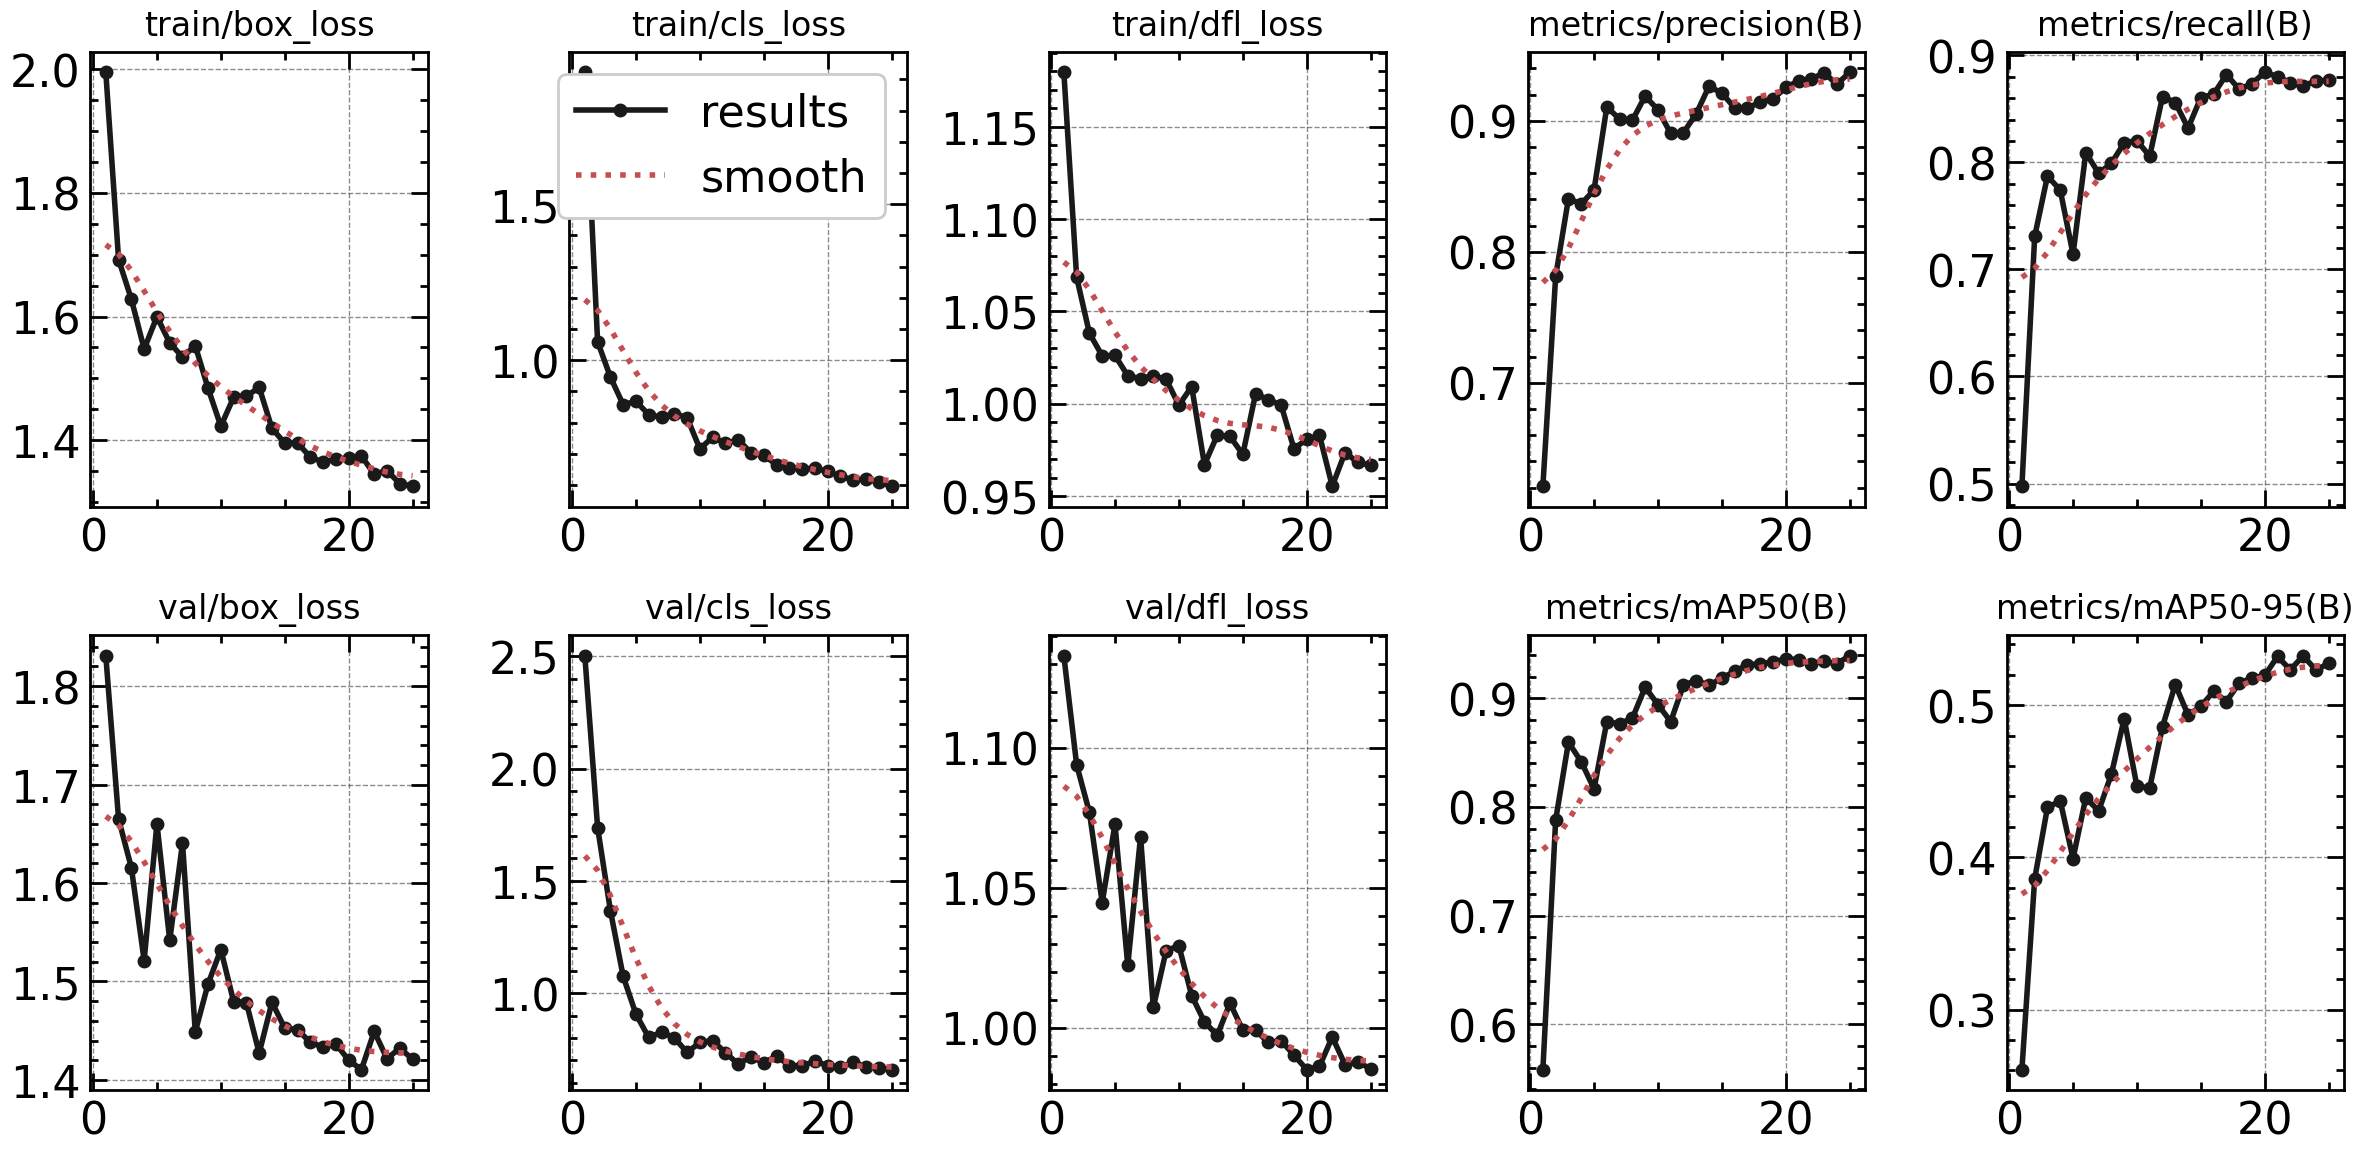

#### Predicción

In [ ]:
# Imçagenes a predecir
image1 = PATH_IMG_TEST_SIN_DA + '/airport_20_jpg.rf.0ed3b5bebe1ace564378ce7c8028b9e8.jpg'
image2 = PATH_IMG_TEST_SIN_DA + '/airport_100_jpg.rf.84d16a11b366223f52e1af29391735b7.jpg'
image3 = PATH_IMG_TEST_SIN_DA + '/airport_214_jpg.rf.e4ae4b1b2a0416c5c92f3ca7df519458.jpg'
image4 = PATH_IMG_TEST_SIN_DA + '/airport_252_jpg.rf.76386ab7c983bbe3cc20bda881330a42.jpg'
image5 = PATH_IMG_TEST_SIN_DA + '/airport_227_jpg.rf.73ac9de3d55d6b82169bcfa5c5367453.jpg'

# Array con las Imágenes
Images = [image1, image2, image3, image4, image5]

# Confianza mínima
conf = 0.5

# Predicción
predictions = model_YoloDA.predict(source=Images, save=True, conf=conf)


0: 608x608 15 airplanes, 31.1ms
1: 608x608 24 airplanes, 31.1ms
2: 608x608 7 airplanes, 31.1ms
3: 608x608 6 airplanes, 31.1ms
4: 608x608 29 airplanes, 31.1ms
Speed: 4.7ms preprocess, 31.1ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 608)
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection112


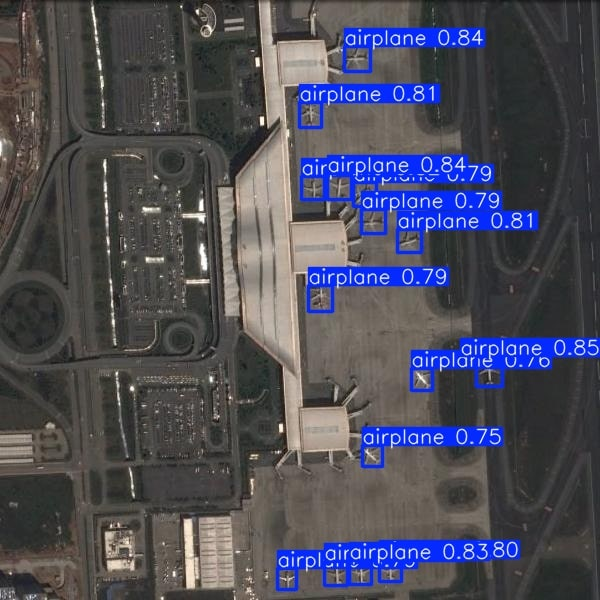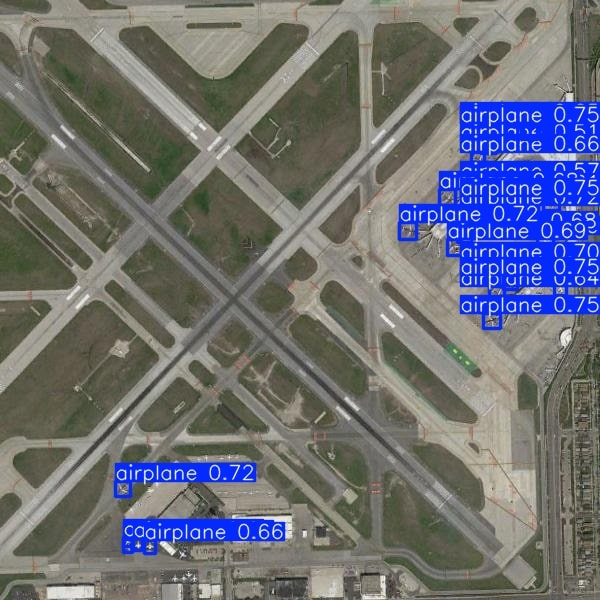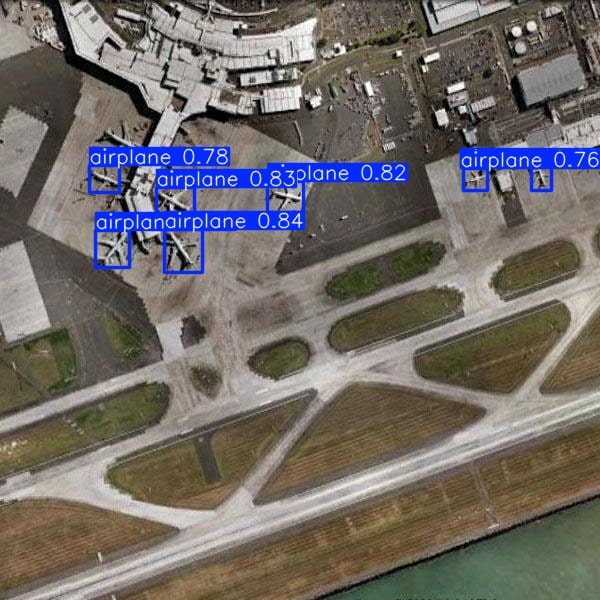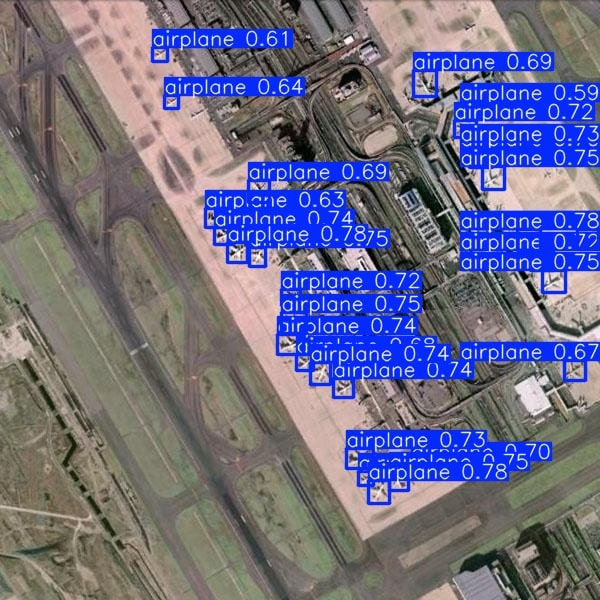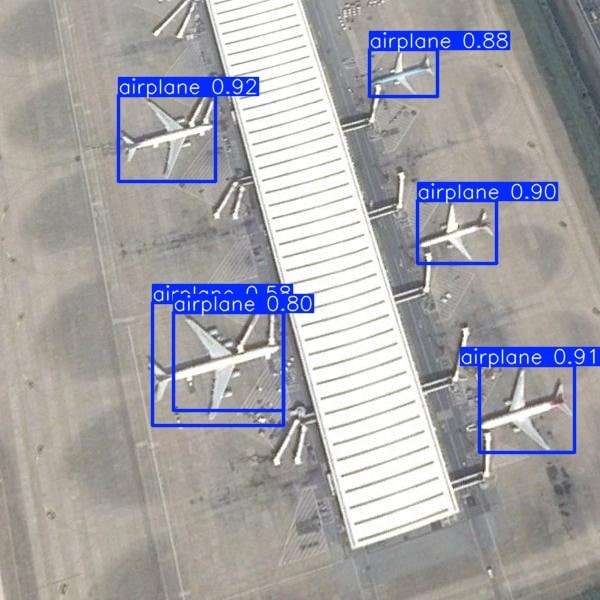

#### Evaluación

##### Evaluación en Train

In [ ]:
# Evaluacion y métricas del modelo en el conjunto train
metricsDA = model_YoloDA.val(data=PATH_PROYECTO_SIN_DA + "data.yaml", imgsz=IMG_SIZE, split = 'train')

print("Mean Average Precision (IoU 50-95): ", metricsDA.box.map)
print("Mean Average Precision (IoU 50): ", metricsDA.box.map50)
print("Mean Average Precision (IoU 75): ", metricsDA.box.map75)
print("Average Precision (IoU 50-95): ", metricsDA.box.ap)
print("Average Precision (IoU 50): ", metricsDA.box.ap50)
print("Precision: ", metricsDA.box.p)
print("Recall: ", metricsDA.box.r)
print("F1 Score: ", metricsDA.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_SIN_DA/train/labels.cache... 236 images, 3 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.13it/s]


                   all        236       3569      0.939      0.917      0.965      0.596
Speed: 0.4ms preprocess, 21.3ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection113
Mean Average Precision (IoU 50-95):  0.5956444034769736
Mean Average Precision (IoU 50):  0.9650044607462854
Mean Average Precision (IoU 75):  0.6682944687534867
Average Precision (IoU 50-95):  [    0.59564]
Average Precision (IoU 50):  [      0.965]
Precision:  [    0.93883]
Recall:  [    0.91706]
F1 Score:  [    0.92782]


El conjunto de entrenamiento del conjunto con DA clásico supera al conjunto de entrenamiento sin DA en todas las métricas, empeorando un **6.32% en IoU 75**, **3.61% en IoU 50-95**, y un peor equilibrio general con un **F1 Score** inferior del **1.05%**.

##### Evaluación en Valid

In [ ]:
# Evaluacion y métricas del modelo en el conjunto Valid
metricsDA = model_YoloDA.val(data=PATH_PROYECTO_SIN_DA + "data.yaml", imgsz=IMG_SIZE, split = 'val')

print("Mean Average Precision (IoU 50-95): ", metricsDA.box.map)
print("Mean Average Precision (IoU 50): ", metricsDA.box.map50)
print("Mean Average Precision (IoU 75): ", metricsDA.box.map75)
print("Average Precision (IoU 50-95): ", metricsDA.box.ap)
print("Average Precision (IoU 50): ", metricsDA.box.ap50)
print("Precision: ", metricsDA.box.p)
print("Recall: ", metricsDA.box.r)
print("F1 Score: ", metricsDA.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_SIN_DA/valid/labels.cache... 68 images, 2 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]


                   all         68       1018      0.931      0.874      0.933      0.533
Speed: 0.5ms preprocess, 22.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection114
Mean Average Precision (IoU 50-95):  0.5327813245224168
Mean Average Precision (IoU 50):  0.9331053181068136
Mean Average Precision (IoU 75):  0.5418435808023998
Average Precision (IoU 50-95):  [    0.53278]
Average Precision (IoU 50):  [    0.93311]
Precision:  [    0.93121]
Recall:  [    0.87426]
F1 Score:  [    0.90184]


El conjunto de validación con DA clásico supera al que no usa DA en todas las métricas, empeorando un **1.44% en IoU 50-95**, **4.01% en IoU 75**, y un **F1 Score superior del 1.78%**, además de menor precisión y recall general, teniendo un comportamiento parecido al del conjunto de entrenamiento.

##### Evaluación en Test

In [ ]:
# Evaluacion y métricas del modelo en el conjunto Test
metricsDA = model_YoloDA.val(data=PATH_PROYECTO_SIN_DA + "data.yaml", imgsz=IMG_SIZE, split = 'test')

print("Mean Average Precision (IoU 50-95): ", metricsDA.box.map)
print("Mean Average Precision (IoU 50): ", metricsDA.box.map50)
print("Mean Average Precision (IoU 75): ", metricsDA.box.map75)
print("Average Precision (IoU 50-95): ", metricsDA.box.ap)
print("Average Precision (IoU 50): ", metricsDA.box.ap50)
print("Precision: ", metricsDA.box.p)
print("Recall: ", metricsDA.box.r)
print("F1 Score: ", metricsDA.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_SIN_DA/test/labels... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:54<00:00,  1.60s/it]

val: New cache created: /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_SIN_DA/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


                   all         34        497      0.894      0.904      0.942      0.548
Speed: 0.4ms preprocess, 34.1ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_SIN_DA/yolo_project/plane_detection115
Mean Average Precision (IoU 50-95):  0.5478135083167097
Mean Average Precision (IoU 50):  0.9421700714165454
Mean Average Precision (IoU 75):  0.5652339031546447
Average Precision (IoU 50-95):  [    0.54781]
Average Precision (IoU 50):  [    0.94217]
Precision:  [    0.89445]
Recall:  [    0.90367]
F1 Score:  [    0.89904]


El conjunto de test con DA clásico supera al conjunto de test sin DA en todas las métricas, con mejoras notables del **1.32% en IoU 50-95**, **2.05% en IoU 75**, y un **F1 Score superior del 2.21%**, además de menor precisión y recall general, lo que refleja un rendimiento menos equilibrado y robusto.

Podemos confirmar tras estas pruebas que no utilizar el DA clásico llega a empeorar los resultados entre un 1% y un 6%.

### Conjunto de datos de inpainting

#### Entrenamiento

In [ ]:
model_YoloIP = YOLO(yolo_version)

In [ ]:
train_config["data"] = PATH_PROYECTO_ARTIFICIAL + "data.yaml" # Ruta a un archivo YAML que describe el dataset (clases, directorios)
train_config["project"] = PATH_PROYECTO_ARTIFICIAL + "yolo_project/" # Carpeta donde se guardarán los resultados

In [ ]:
# Entrenar el modelo
results = model_YoloIP.train(**train_config)

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/data.yaml, epochs=25, time=None, patience=5, batch=8, imgsz=600, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/, name=plane_detection5, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

100%|██████████| 755k/755k [00:00<00:00, 74.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 331MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]


train: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_ARTIFICIAL/train/labels.cache... 1029 images, 9 backgrounds, 0 corrupt: 100%|██████████| 1029/1029 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_ARTIFICIAL/valid/labels.cache... 68 images, 2 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]


Plotting labels to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection5/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 608 train, 608 val
Using 2 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.82G      1.706      1.163      1.095         36        608: 100%|██████████| 129/129 [01:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all         68       1018      0.806      0.732      0.791      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.59G      1.517     0.8811      1.019        105        608: 100%|██████████| 129/129 [00:42<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]

                   all         68       1018      0.849      0.769      0.832      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.56G      1.467     0.8309      1.015         83        608: 100%|██████████| 129/129 [00:42<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]

                   all         68       1018       0.82      0.765      0.813      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.57G      1.405     0.7643      1.002         73        608: 100%|██████████| 129/129 [00:41<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all         68       1018      0.846      0.804      0.863      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.66G      1.413     0.7613     0.9892         52        608: 100%|██████████| 129/129 [00:54<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all         68       1018      0.886      0.807      0.891      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.73G      1.357     0.7179     0.9756        144        608: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


                   all         68       1018      0.889      0.818      0.888      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.61G      1.347     0.7148     0.9782         59        608: 100%|██████████| 129/129 [00:41<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all         68       1018      0.871      0.848      0.896      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       3.6G      1.329     0.6838     0.9733        152        608: 100%|██████████| 129/129 [00:41<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]

                   all         68       1018      0.908      0.836      0.905      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.59G      1.312      0.678     0.9613         40        608: 100%|██████████| 129/129 [00:41<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]

                   all         68       1018      0.892      0.864      0.914      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.53G      1.278     0.6488     0.9656        119        608: 100%|██████████| 129/129 [00:42<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all         68       1018      0.877      0.853      0.907      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.45G      1.251     0.6449     0.9497        111        608: 100%|██████████| 129/129 [00:40<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

                   all         68       1018      0.889      0.852      0.915      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.65G      1.242     0.6362     0.9541        144        608: 100%|██████████| 129/129 [00:49<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]

                   all         68       1018      0.905      0.884      0.931      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.37G      1.245     0.6236     0.9486        127        608: 100%|██████████| 129/129 [00:42<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all         68       1018      0.925      0.887       0.94      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.02G      1.225     0.6023     0.9438        113        608: 100%|██████████| 129/129 [00:42<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]

                   all         68       1018      0.899      0.885       0.93      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.77G      1.183     0.5851     0.9361         73        608: 100%|██████████| 129/129 [00:40<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all         68       1018      0.918      0.869      0.925      0.506


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.49G      1.175     0.5649     0.9459         88        608: 100%|██████████| 129/129 [00:42<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]

                   all         68       1018      0.917      0.884      0.936      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.46G      1.152     0.5424     0.9443        122        608: 100%|██████████| 129/129 [00:43<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all         68       1018      0.909      0.851      0.916      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.45G      1.129     0.5261     0.9408         61        608: 100%|██████████| 129/129 [00:40<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all         68       1018      0.931      0.888      0.943      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.47G      1.128      0.528     0.9411         33        608: 100%|██████████| 129/129 [00:41<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


                   all         68       1018      0.935      0.879      0.943      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.45G      1.116      0.522      0.936         38        608: 100%|██████████| 129/129 [00:41<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]

                   all         68       1018      0.929       0.88      0.941      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.42G       1.12     0.5171     0.9294         65        608: 100%|██████████| 129/129 [00:40<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all         68       1018      0.933      0.876      0.943      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.48G        1.1     0.4965     0.9283         74        608: 100%|██████████| 129/129 [00:43<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all         68       1018      0.934       0.89      0.945      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.47G      1.073     0.4862     0.9156         71        608: 100%|██████████| 129/129 [00:40<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all         68       1018      0.935      0.891      0.948       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.48G      1.055     0.4708     0.9117         27        608: 100%|██████████| 129/129 [00:40<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all         68       1018      0.926      0.904       0.95      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.45G      1.038     0.4617     0.9148         73        608: 100%|██████████| 129/129 [00:41<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all         68       1018      0.924      0.889      0.944      0.524



25 epochs completed in 0.375 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection5/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection5/weights/best.pt, 52.0MB

Validating /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection5/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


                   all         68       1018      0.926      0.904       0.95      0.541
Speed: 0.3ms preprocess, 15.1ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection5


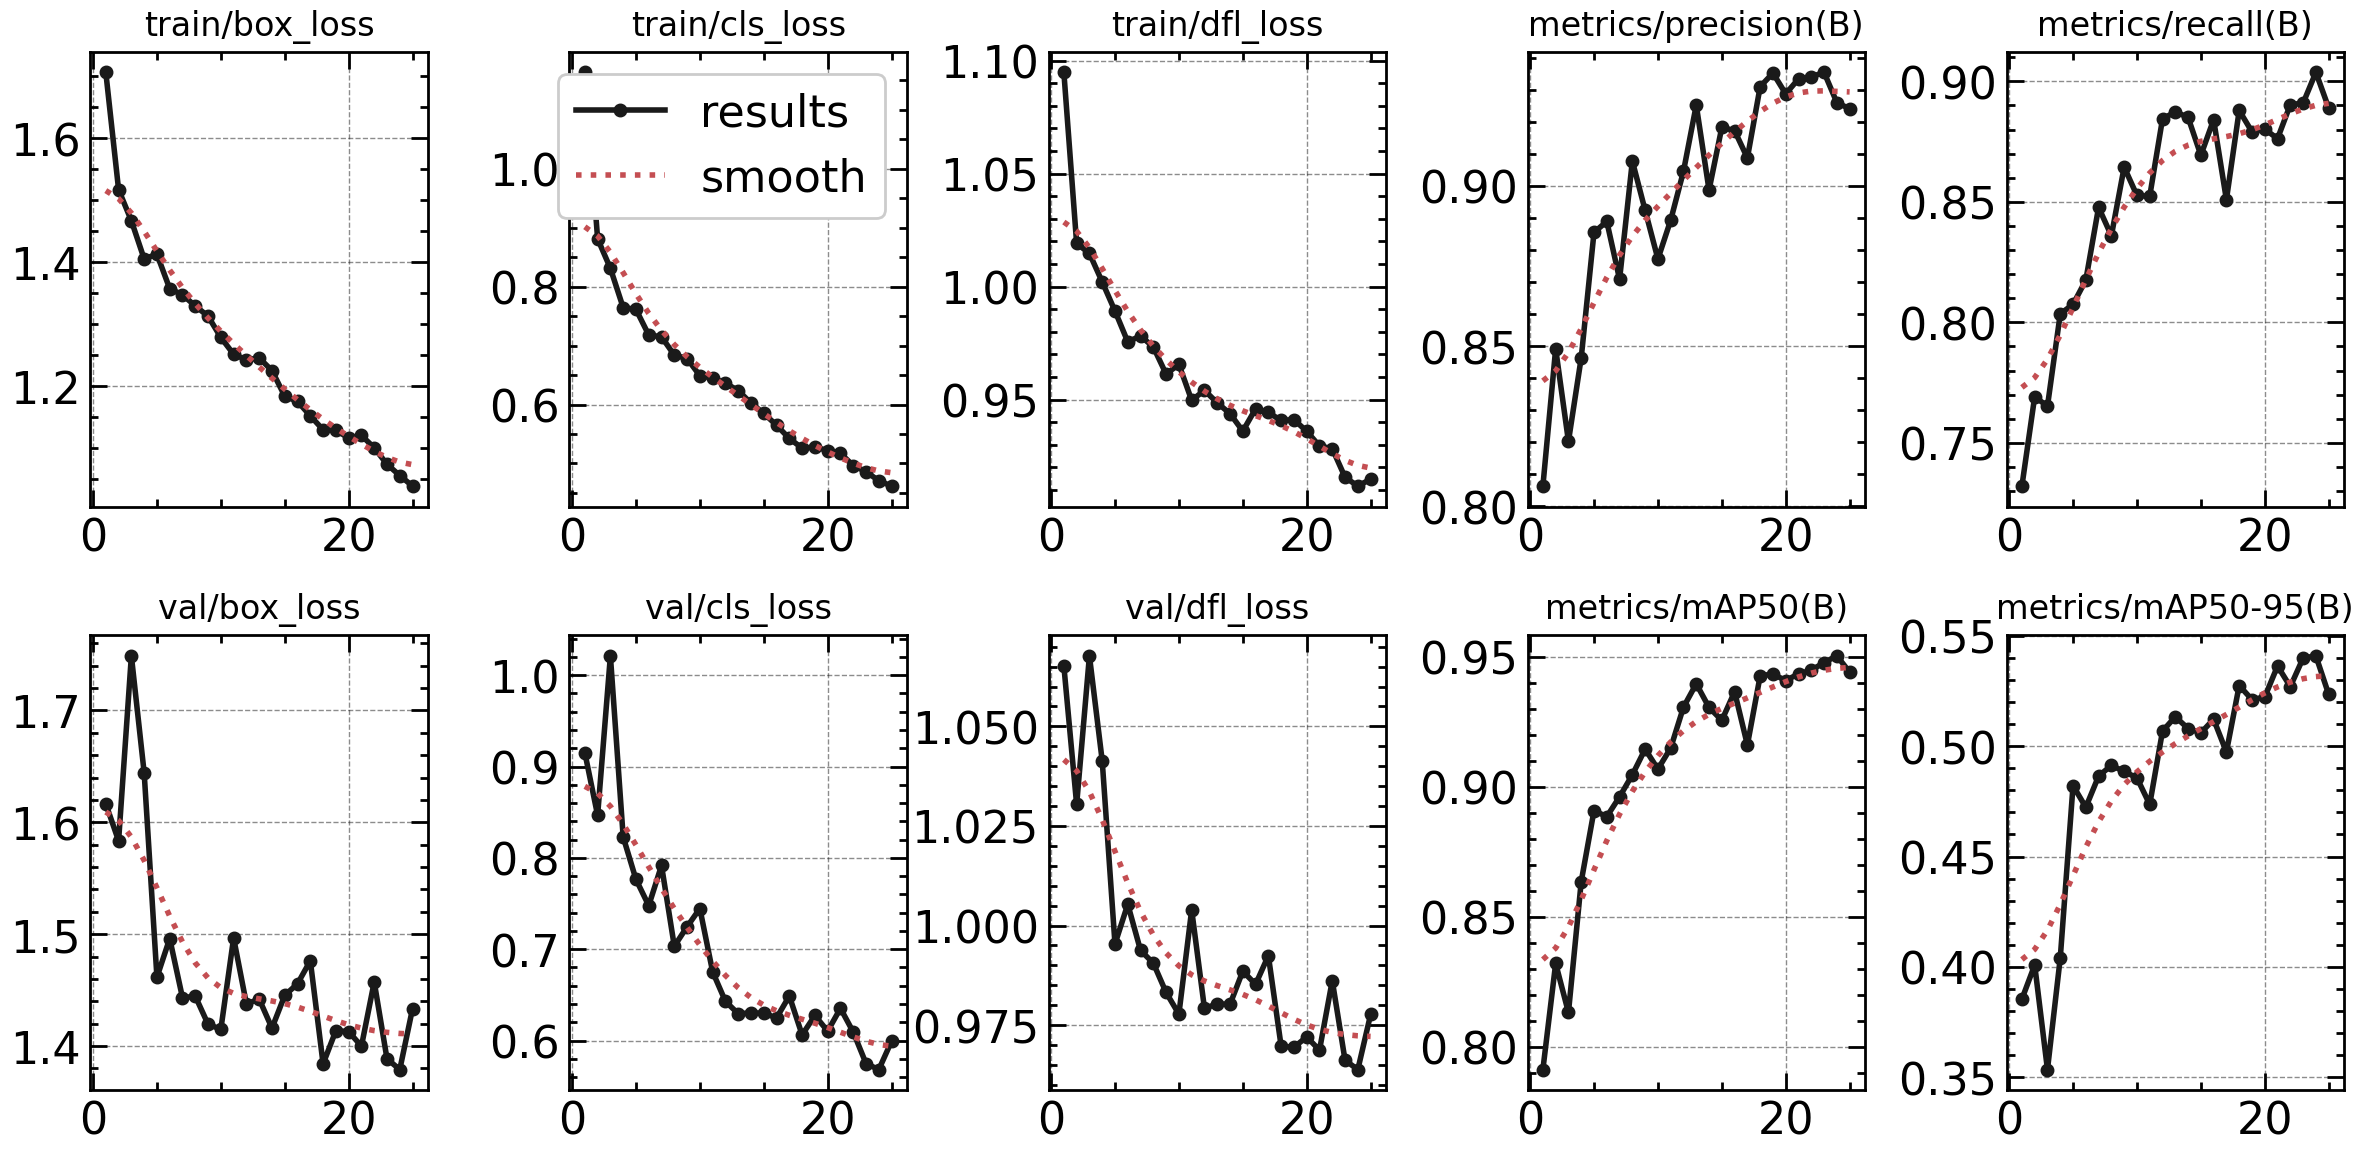

#### Predicción

In [ ]:
# Imágenes a predecir
image1 = PATH_IMG_TEST_ARTIFICIAL + '/airport_20_jpg.rf.84d6aa6622df2998c395dc7e5fedd94e.jpg'
image2 = PATH_IMG_TEST_ARTIFICIAL + '/airport_110_jpg.rf.fa9e3404321d04de0f9318c996d2796c.jpg'
image3 = PATH_IMG_TEST_ARTIFICIAL + '/airport_118_jpg.rf.4254cd74c3e555998d50a2982c1263c2.jpg'
image4 = PATH_IMG_TEST_ARTIFICIAL + '/airport_222_jpg.rf.f4ea1438e7f3e40ece0f3ea0b973b33f.jpg'
image5 = PATH_IMG_TEST_ARTIFICIAL + '/airport_252_jpg.rf.7e946be8b045c7ef244a5198dbd91e67.jpg'

# Array con las imágenes
Images = [image1, image2, image3, image4, image5]

# Confianza mínima
conf = 0.5

# Predicción
predictions = model_YoloIP.predict(source=Images, save=True, conf=conf)


0: 608x608 15 airplanes, 28.6ms
1: 608x608 23 airplanes, 28.6ms
2: 608x608 24 airplanes, 28.6ms
3: 608x608 34 airplanes, 28.6ms
4: 608x608 5 airplanes, 28.6ms
Speed: 7.0ms preprocess, 28.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 608)
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection52


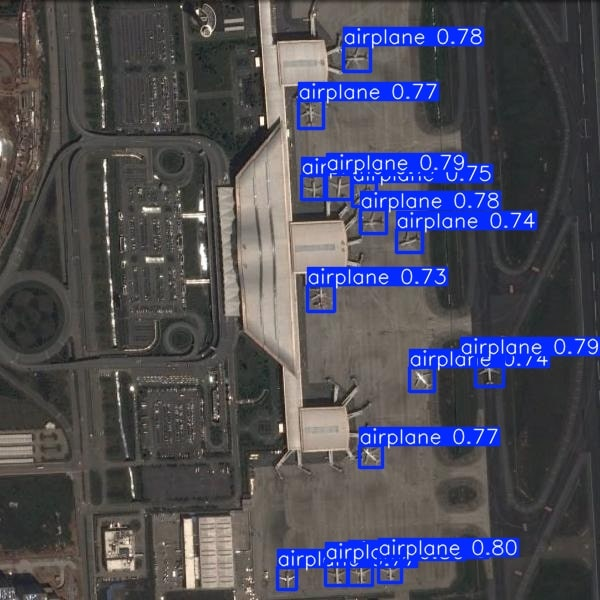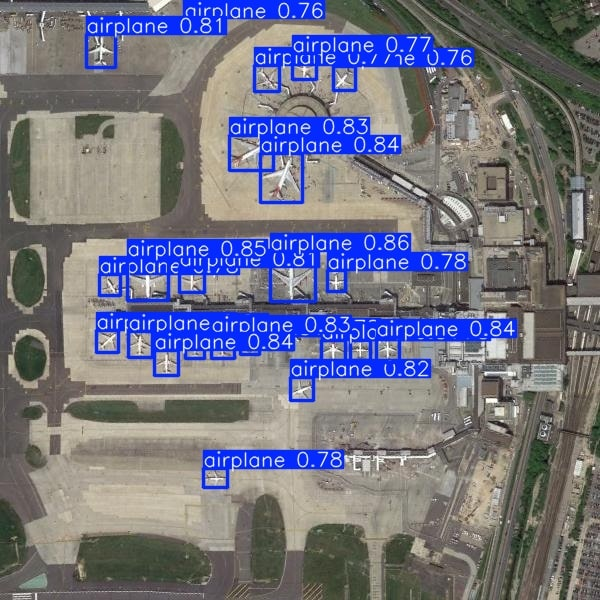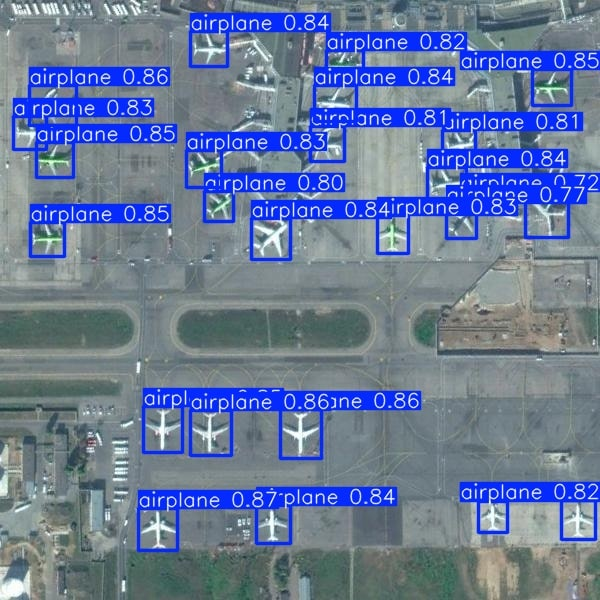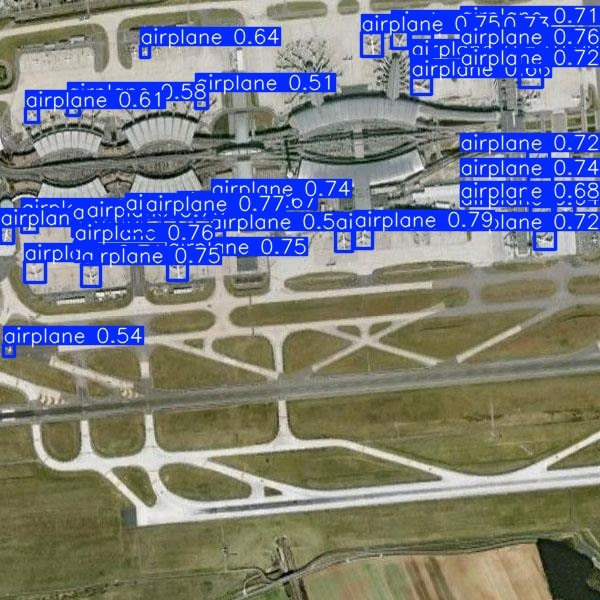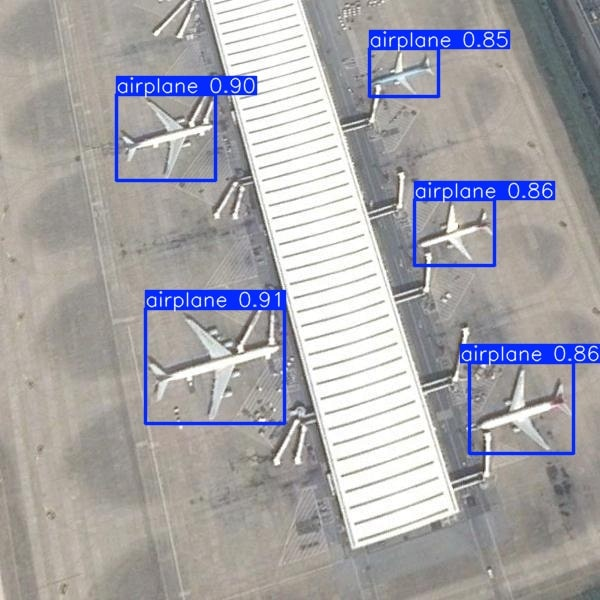

#### Evaluación

##### Evaluación en Train

In [ ]:
# Evaluacion y métricas del modelo en el conjunto train
metricsIP = model_YoloIP.val(data=PATH_PROYECTO_ARTIFICIAL + "data.yaml", imgsz=IMG_SIZE, split = 'train')

print("Mean Average Precision (IoU 50-95): ", metricsIP.box.map)
print("Mean Average Precision (IoU 50): ", metricsIP.box.map50)
print("Mean Average Precision (IoU 75): ", metricsIP.box.map75)
print("Average Precision (IoU 50-95): ", metricsIP.box.ap)
print("Average Precision (IoU 50): ", metricsIP.box.ap50)
print("Precision: ", metricsIP.box.p)
print("Recall: ", metricsIP.box.r)
print("F1 Score: ", metricsIP.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_ARTIFICIAL/train/labels.cache... 1029 images, 9 backgrounds, 0 corrupt: 100%|██████████| 1029/1029 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 129/129 [00:43<00:00,  2.93it/s]


                   all       1029      15474      0.962      0.944      0.979      0.705
Speed: 0.6ms preprocess, 21.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection53
Mean Average Precision (IoU 50-95):  0.7050412595299771
Mean Average Precision (IoU 50):  0.9787046068988037
Mean Average Precision (IoU 75):  0.8047002899983381
Average Precision (IoU 50-95):  [    0.70504]
Average Precision (IoU 50):  [     0.9787]
Precision:  [    0.96238]
Recall:  [    0.94416]
F1 Score:  [    0.95318]


En este caso, llegamos a obtener unos resultados claramente superiores respecto al conjunto de entrenamiento con DA en todas las métricas en todas las métricas, destacando una mejora del **7.3% en IoU 50-95**, **7.3% en IoU 75**, y un **F1 Score mejorado en un 1.48%**, junto con una precisión y recall más altos, lo que indica un rendimiento más sólido y equilibrado en la detección de objetos.

##### Evaluación en Valid

In [ ]:
# Evaluacion y métricas del modelo en el conjunto valid
metricsIP = model_YoloIP.val(data=PATH_PROYECTO_ARTIFICIAL + "data.yaml", imgsz=IMG_SIZE, split = 'val')

print("Mean Average Precision (IoU 50-95): ", metricsIP.box.map)
print("Mean Average Precision (IoU 50): ", metricsIP.box.map50)
print("Mean Average Precision (IoU 75): ", metricsIP.box.map75)
print("Average Precision (IoU 50-95): ", metricsIP.box.ap)
print("Average Precision (IoU 50): ", metricsIP.box.ap50)
print("Precision: ", metricsIP.box.p)
print("Recall: ", metricsIP.box.r)
print("F1 Score: ", metricsIP.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_ARTIFICIAL/valid/labels.cache... 68 images, 2 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]


                   all         68       1018      0.926      0.904       0.95      0.544
Speed: 1.1ms preprocess, 22.9ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection55
Mean Average Precision (IoU 50-95):  0.5439785737097618
Mean Average Precision (IoU 50):  0.9499340774892401
Mean Average Precision (IoU 75):  0.5695555814954751
Average Precision (IoU 50-95):  [    0.54398]
Average Precision (IoU 50):  [    0.94993]
Precision:  [    0.92577]
Recall:  [    0.90373]
F1 Score:  [    0.91462]


Los resultados del conjunto de validación con inpainting muestra una ligera mejora en **Precision** (de 93.31% a 92.58%) y un **Recall** ligeramente superior (de 90.67% a 90.37%). Sin embargo, la mejora en **Mean Average Precision** (AP) es pequeña y las diferencias en las métricas de IoU no son significativas. En términos generales, las métricas son bastante similares, con el segundo conjunto de resultados mostrando un leve aumento en precisión, pero con un **F1 Score** algo más bajo, lo que sugiere una ligera disminución en el equilibrio entre precisión y recall en comparación con el primer conjunto.

##### Evaluación en Test

In [ ]:
# Evaluacion y métricas del modelo en el conjunto Test
metricsIP = model_YoloIP.val(data=PATH_PROYECTO_ARTIFICIAL + "data.yaml", imgsz=IMG_SIZE, split = 'test')

print("Mean Average Precision (IoU 50-95): ", metricsIP.box.map)
print("Mean Average Precision (IoU 50): ", metricsIP.box.map50)
print("Mean Average Precision (IoU 75): ", metricsIP.box.map75)
print("Average Precision (IoU 50-95): ", metricsIP.box.ap)
print("Average Precision (IoU 50): ", metricsIP.box.ap50)
print("Precision: ", metricsIP.box.p)
print("Recall: ", metricsIP.box.r)
print("F1 Score: ", metricsIP.box.f1)

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_ARTIFICIAL/test/labels... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:56<00:00,  1.67s/it]

val: New cache created: /content/drive/.shortcut-targets-by-id/1tjFO_d6Ac0OOgA0yB37y3d46ZmsI7Jkh/VC_PROYECTO/DS_ARTIFICIAL/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


                   all         34        497      0.941      0.926      0.967      0.541
Speed: 0.6ms preprocess, 32.8ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/VC_PROYECTO/DS_ARTIFICIAL/yolo_project/plane_detection54
Mean Average Precision (IoU 50-95):  0.5412901601094069
Mean Average Precision (IoU 50):  0.967281819192416
Mean Average Precision (IoU 75):  0.533351160481519
Average Precision (IoU 50-95):  [    0.54129]
Average Precision (IoU 50):  [    0.96728]
Precision:  [    0.94128]
Recall:  [    0.92555]
F1 Score:  [    0.93335]


En esta comparación, podemos observar que los resultados obtenidos con el conjunto de test con inpainting presenta una ligera mejora en términos de **Precision** (de 92.47% a 94.13%) y **Recall** (de 91.75% a 92.55%), lo que indica que el modelo es mejor en identificar objetos sin generar tantos falsos positivos ni negativos. Además, el **F1 Score** también muestra una mejora significativa, pasando de 92.11% a 93.34%, lo que sugiere un mejor balance entre precisión y recall.

Sin embargo, el primer conjunto de resultados tiene un valor ligeramente superior en la **Mean Average Precision** (IoU 50-95) con 56.1%, comparado con 54.1% del segundo conjunto, lo que indica que el modelo en el primer conjunto tiene una mejor capacidad para detectar objetos en un rango de IoU más amplio. A pesar de esta diferencia, el segundo conjunto de resultados parece ofrecer un rendimiento más equilibrado en términos de precisión y recall, con una ligera mejora en las métricas generales de la detección.

### Evaluación con pycocotools

Ultralytics ofrece una muy buena base con respecto a métricas de evaluación, sin embargo no ofrece un desglose por diferentes tamaños, métrica que se ofrece en la librería pycocotools por lo tanto para obtener un análisis más rico y estar en concordancia con el resto de modelos vamos a realizar las predicciones de realizadas previamente pero en este caso con dicha librería.

In [ ]:
from tqdm import tqdm

def evaluate_dataset_yolo(model, dataset, device):
    model.eval()
    all_pred_boxes = []
    all_pred_labels = []
    all_pred_scores = []
    all_true_boxes = []
    all_true_labels = []

    with torch.no_grad():
        # Usamos tqdm para mostrar el progreso mientras iteramos sobre el dataset
        for idx in tqdm(range(len(dataset))):
            # Obtener la imagen y las etiquetas del dataset
            image, target = dataset[idx]
            image = image.to(device)
            target = target.to(device)  # Las etiquetas reales

            # Realizamos la predicción del modelo
            results = model(image.unsqueeze(0))  # Asegúrate de que la imagen tenga el tamaño [1, C, H, W]

            # Para cada imagen
            for result, target in zip(results, target):
                # Convertir las cajas predichas de YOLO (x_center, y_center, width, height) a [xmin, ymin, xmax, ymax]
                pred_boxes = result.boxes.xywh.cpu().numpy()
                pred_labels = result.boxes.cls.cpu().numpy().astype(int)
                pred_scores = result.boxes.conf.cpu().numpy()

                # Convertir las cajas al formato [xmin, ymin, xmax, ymax]
                pred_boxes_coco = []
                for box in pred_boxes:
                    x_center, y_center, width, height = box
                    xmin = x_center - width / 2
                    ymin = y_center - height / 2
                    xmax = x_center + width / 2
                    ymax = y_center + height / 2
                    pred_boxes_coco.append([xmin, ymin, xmax, ymax])

                # Añadir las predicciones convertidas
                all_pred_boxes.append(np.array(pred_boxes_coco))
                all_pred_labels.append(pred_labels)
                all_pred_scores.append(pred_scores)
                # print(all_pred_boxes[-1], all_pred_labels[-1], all_pred_scores[-1])

    return all_pred_boxes, all_pred_labels, all_pred_scores, all_true_boxes, all_true_labels


In [ ]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

def evaluate_YOLO(model, dataloader, path, device, confidence=0.5):
    model.eval()

    all_pred_boxes, all_pred_labels, all_pred_scores, all_true_boxes, all_true_labels = evaluate_dataset_yolo(model, dataloader, device)

    coco_gt = COCO(path + '_annotations.coco.json')
    names = []
    ids = []

    for key, val in coco_gt.imgs.items():
        names.append(val['file_name'])
        ids.append(val['id'])

    names = np.array(names)
    ids = np.array(ids)
    idx = np.argsort(names)
    # names = names[idx]
    ids = ids[idx]

    coco_format_predictions = []
    for i, (pred_boxes, pred_labels, pred_scores) in enumerate(zip(all_pred_boxes, all_pred_labels, all_pred_scores)):
        for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
            if score > confidence:
                width = box[2] - box[0]
                height = box[3] - box[1]
                coco_format_predictions.append({
                    'image_id': ids[i],
                    'category_id': label + 1,
                    # 'bbox': box.tolist(),
                    'bbox': [box[0], box[1], width, height],
                    'score': score.item()
                })

    coco_dt = coco_gt.loadRes(coco_format_predictions)

    coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    return coco_eval

In [ ]:
model_Yolo = YOLO(PATH_PROYECTO + "best_clasico.pt")
model_Yolo.to(DEVICE);

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((608, 608)),
    transforms.ToTensor(),
])

ds_yolo_train = CustomDataset(images_dir=PATH_IMG_TRAIN, labels_dir=PATH_LABEL_TRAIN, transform=transform)
ds_yolo_valid = CustomDataset(images_dir=PATH_IMG_VAL, labels_dir=PATH_LABEL_VAL, transform=transform)
ds_yolo_test = CustomDataset(images_dir=PATH_IMG_TEST, labels_dir=PATH_LABEL_TEST, transform=transform)

In [ ]:
coco_eval = evaluate_YOLO(model_Yolo, ds_yolo_train,
                                    PATH_PROYECTO + 'train/', DEVICE)

  0%|          | 0/708 [00:00<?, ?it/s]


0: 608x608 12 airplanes, 48.3ms
Speed: 0.0ms preprocess, 48.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


  0%|          | 1/708 [00:00<01:44,  6.76it/s]


0: 608x608 12 airplanes, 49.6ms
Speed: 0.0ms preprocess, 49.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  0%|          | 2/708 [00:00<01:52,  6.28it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  0%|          | 3/708 [00:00<01:41,  6.92it/s]


0: 608x608 8 airplanes, 39.5ms
Speed: 0.0ms preprocess, 39.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  1%|          | 4/708 [00:00<01:34,  7.48it/s]


0: 608x608 7 airplanes, 40.7ms
Speed: 0.0ms preprocess, 40.7ms inference, 5.4ms postprocess per image at shape (1, 3, 608, 608)


  1%|          | 5/708 [00:00<01:33,  7.49it/s]


0: 608x608 7 airplanes, 46.3ms
Speed: 0.0ms preprocess, 46.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


  1%|          | 6/708 [00:00<01:35,  7.34it/s]


0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  1%|          | 8/708 [00:01<01:19,  8.77it/s]


0: 608x608 17 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 57 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


  1%|▏         | 10/708 [00:01<01:08, 10.14it/s]


0: 608x608 57 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 53 airplanes, 36.7ms
Speed: 0.0ms preprocess, 36.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  2%|▏         | 12/708 [00:01<01:04, 10.84it/s]


0: 608x608 20 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 20 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  2%|▏         | 14/708 [00:01<00:59, 11.63it/s]


0: 608x608 20 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  2%|▏         | 16/708 [00:01<00:55, 12.50it/s]


0: 608x608 13 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 13 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 18/708 [00:01<00:52, 13.11it/s]


0: 608x608 8 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 20/708 [00:01<00:49, 13.78it/s]


0: 608x608 8 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 25 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 22/708 [00:02<00:50, 13.63it/s]


0: 608x608 28 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 24/708 [00:02<00:48, 13.96it/s]


0: 608x608 21 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


  4%|▎         | 26/708 [00:02<00:48, 13.97it/s]


0: 608x608 20 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  4%|▍         | 28/708 [00:02<00:47, 14.33it/s]


0: 608x608 10 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  4%|▍         | 30/708 [00:02<00:46, 14.71it/s]


0: 608x608 14 airplanes, 25.1ms
Speed: 0.0ms preprocess, 25.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 13 airplanes, 24.7ms
Speed: 0.0ms preprocess, 24.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


  5%|▍         | 32/708 [00:02<00:45, 15.00it/s]


0: 608x608 13 airplanes, 24.6ms
Speed: 0.1ms preprocess, 24.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 17 airplanes, 24.4ms
Speed: 0.0ms preprocess, 24.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  5%|▍         | 34/708 [00:02<00:43, 15.33it/s]


0: 608x608 17 airplanes, 22.4ms
Speed: 0.0ms preprocess, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 17 airplanes, 22.2ms
Speed: 0.0ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  5%|▌         | 36/708 [00:02<00:42, 15.79it/s]


0: 608x608 18 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  5%|▌         | 38/708 [00:03<00:42, 15.93it/s]


0: 608x608 21 airplanes, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 35 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 40/708 [00:03<00:42, 15.89it/s]


0: 608x608 34 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 31 airplanes, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 42/708 [00:03<00:40, 16.26it/s]


0: 608x608 54 airplanes, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 5.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 51 airplanes, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 44/708 [00:03<00:40, 16.32it/s]


0: 608x608 56 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 22.6ms
Speed: 0.0ms preprocess, 22.6ms inference, 6.3ms postprocess per image at shape (1, 3, 608, 608)


  6%|▋         | 46/708 [00:03<00:41, 16.11it/s]


0: 608x608 6 airplanes, 31.6ms
Speed: 0.0ms preprocess, 31.6ms inference, 6.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 28.0ms
Speed: 0.0ms preprocess, 28.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


  7%|▋         | 48/708 [00:03<00:51, 12.92it/s]


0: 608x608 19 airplanes, 33.2ms
Speed: 0.0ms preprocess, 33.2ms inference, 8.8ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 19 airplanes, 27.6ms
Speed: 0.0ms preprocess, 27.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  7%|▋         | 50/708 [00:04<00:57, 11.36it/s]


0: 608x608 19 airplanes, 28.5ms
Speed: 0.0ms preprocess, 28.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 33.1ms
Speed: 0.0ms preprocess, 33.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  7%|▋         | 52/708 [00:04<01:07,  9.68it/s]


0: 608x608 14 airplanes, 21.1ms
Speed: 0.1ms preprocess, 21.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  8%|▊         | 54/708 [00:04<01:05,  9.97it/s]


0: 608x608 19 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


  8%|▊         | 56/708 [00:04<00:57, 11.35it/s]


0: 608x608 17 airplanes, 21.6ms
Speed: 0.0ms preprocess, 21.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  8%|▊         | 58/708 [00:04<00:51, 12.62it/s]


0: 608x608 4 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)


  8%|▊         | 60/708 [00:04<00:48, 13.50it/s]


0: 608x608 16 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 62/708 [00:04<00:46, 13.99it/s]


0: 608x608 15 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 64/708 [00:05<00:44, 14.62it/s]


0: 608x608 8 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 66/708 [00:05<00:42, 15.17it/s]


0: 608x608 27 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 28 airplanes, 23.1ms
Speed: 0.0ms preprocess, 23.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 10%|▉         | 68/708 [00:05<00:41, 15.44it/s]


0: 608x608 29 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 22.3ms
Speed: 0.0ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 10%|▉         | 70/708 [00:05<00:41, 15.54it/s]


0: 608x608 19 airplanes, 22.4ms
Speed: 0.0ms preprocess, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 20 airplanes, 21.7ms
Speed: 0.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 10%|█         | 72/708 [00:05<00:40, 15.69it/s]


0: 608x608 14 airplanes, 22.4ms
Speed: 0.0ms preprocess, 22.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 13 airplanes, 22.5ms
Speed: 0.0ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 10%|█         | 74/708 [00:05<00:41, 15.31it/s]


0: 608x608 18 airplanes, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 11%|█         | 76/708 [00:05<00:41, 15.25it/s]


0: 608x608 10 airplanes, 23.0ms
Speed: 0.0ms preprocess, 23.0ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 22.3ms
Speed: 0.0ms preprocess, 22.3ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 608)


 11%|█         | 78/708 [00:06<00:43, 14.43it/s]


0: 608x608 6 airplanes, 23.3ms
Speed: 0.0ms preprocess, 23.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 23.2ms
Speed: 0.0ms preprocess, 23.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 11%|█▏        | 80/708 [00:06<00:42, 14.75it/s]


0: 608x608 6 airplanes, 22.5ms
Speed: 0.0ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 22.5ms
Speed: 2.7ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 82/708 [00:06<00:41, 14.91it/s]


0: 608x608 8 airplanes, 22.5ms
Speed: 0.0ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 22.5ms
Speed: 0.0ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 84/708 [00:06<00:40, 15.27it/s]


0: 608x608 41 airplanes, 23.2ms
Speed: 0.0ms preprocess, 23.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 40 airplanes, 23.4ms
Speed: 0.0ms preprocess, 23.4ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 86/708 [00:06<00:40, 15.31it/s]


0: 608x608 43 airplanes, 22.8ms
Speed: 0.0ms preprocess, 22.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 88/708 [00:06<00:40, 15.31it/s]


0: 608x608 11 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 13%|█▎        | 90/708 [00:06<00:39, 15.50it/s]


0: 608x608 32 airplanes, 22.8ms
Speed: 0.0ms preprocess, 22.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 29 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 13%|█▎        | 92/708 [00:06<00:39, 15.45it/s]


0: 608x608 27 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 13%|█▎        | 94/708 [00:07<00:40, 15.24it/s]


0: 608x608 19 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 14%|█▎        | 96/708 [00:07<00:39, 15.38it/s]


0: 608x608 32 airplanes, 23.9ms
Speed: 0.0ms preprocess, 23.9ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 36 airplanes, 24.0ms
Speed: 0.0ms preprocess, 24.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 14%|█▍        | 98/708 [00:07<00:42, 14.50it/s]


0: 608x608 32 airplanes, 23.3ms
Speed: 0.0ms preprocess, 23.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 24.5ms
Speed: 0.0ms preprocess, 24.5ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 608)


 14%|█▍        | 100/708 [00:07<00:42, 14.26it/s]


0: 608x608 11 airplanes, 24.3ms
Speed: 0.0ms preprocess, 24.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 25.0ms
Speed: 0.0ms preprocess, 25.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 14%|█▍        | 102/708 [00:07<00:42, 14.21it/s]


0: 608x608 28 airplanes, 23.6ms
Speed: 0.0ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 25 airplanes, 23.7ms
Speed: 0.0ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 104/708 [00:07<00:42, 14.08it/s]


0: 608x608 26 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 23.6ms
Speed: 0.0ms preprocess, 23.6ms inference, 4.0ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 106/708 [00:07<00:42, 14.05it/s]


0: 608x608 5 airplanes, 23.6ms
Speed: 0.0ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 24.5ms
Speed: 0.0ms preprocess, 24.5ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▌        | 108/708 [00:08<00:43, 13.94it/s]


0: 608x608 8 airplanes, 24.8ms
Speed: 0.0ms preprocess, 24.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 24.7ms
Speed: 0.0ms preprocess, 24.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▌        | 110/708 [00:08<00:42, 14.04it/s]


0: 608x608 10 airplanes, 26.1ms
Speed: 0.0ms preprocess, 26.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 24.9ms
Speed: 0.0ms preprocess, 24.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▌        | 112/708 [00:08<00:43, 13.74it/s]


0: 608x608 7 airplanes, 28.8ms
Speed: 0.0ms preprocess, 28.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 26.8ms
Speed: 0.0ms preprocess, 26.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▌        | 114/708 [00:08<00:44, 13.38it/s]


0: 608x608 9 airplanes, 29.0ms
Speed: 0.0ms preprocess, 29.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 25.0ms
Speed: 0.0ms preprocess, 25.0ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▋        | 116/708 [00:08<00:44, 13.37it/s]


0: 608x608 9 airplanes, 26.8ms
Speed: 0.0ms preprocess, 26.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 15 airplanes, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 17%|█▋        | 118/708 [00:08<00:43, 13.55it/s]


0: 608x608 15 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 13 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 17%|█▋        | 120/708 [00:08<00:43, 13.46it/s]


0: 608x608 14 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 17%|█▋        | 122/708 [00:09<00:44, 13.18it/s]


0: 608x608 16 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 30.2ms
Speed: 0.0ms preprocess, 30.2ms inference, 4.7ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 124/708 [00:09<00:45, 12.81it/s]


0: 608x608 23 airplanes, 40.9ms
Speed: 0.0ms preprocess, 40.9ms inference, 18.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 27 airplanes, 40.2ms
Speed: 0.0ms preprocess, 40.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 126/708 [00:09<00:57, 10.19it/s]


0: 608x608 4 airplanes, 38.6ms
Speed: 0.0ms preprocess, 38.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 49.6ms
Speed: 0.0ms preprocess, 49.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 128/708 [00:09<01:03,  9.11it/s]


0: 608x608 4 airplanes, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 129/708 [00:09<01:09,  8.36it/s]


0: 608x608 8 airplanes, 32.9ms
Speed: 0.0ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 130/708 [00:10<01:10,  8.24it/s]


0: 608x608 4 airplanes, 31.9ms
Speed: 0.0ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 30.8ms
Speed: 0.0ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▊        | 132/708 [00:10<01:02,  9.24it/s]


0: 608x608 90 airplanes, 30.9ms
Speed: 0.0ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 91 airplanes, 30.9ms
Speed: 0.0ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▉        | 134/708 [00:10<00:58,  9.78it/s]


0: 608x608 85 airplanes, 31.2ms
Speed: 0.0ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 81 airplanes, 30.9ms
Speed: 0.0ms preprocess, 30.9ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▉        | 136/708 [00:10<00:55, 10.33it/s]


0: 608x608 96 airplanes, 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 6.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 100 airplanes, 31.9ms
Speed: 0.1ms preprocess, 31.9ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▉        | 138/708 [00:10<00:53, 10.73it/s]


0: 608x608 (no detections), 30.0ms
Speed: 0.0ms preprocess, 30.0ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 (no detections), 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 608)


 20%|█▉        | 140/708 [00:10<00:50, 11.34it/s]


0: 608x608 (no detections), 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 27.2ms
Speed: 0.1ms preprocess, 27.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 20%|██        | 142/708 [00:11<00:47, 11.95it/s]


0: 608x608 2 airplanes, 28.7ms
Speed: 0.0ms preprocess, 28.7ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 20%|██        | 144/708 [00:11<00:45, 12.50it/s]


0: 608x608 5 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 28.3ms
Speed: 0.0ms preprocess, 28.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 146/708 [00:11<00:46, 12.22it/s]


0: 608x608 5 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 13 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 148/708 [00:11<00:44, 12.54it/s]


0: 608x608 12 airplanes, 32.1ms
Speed: 0.0ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 13 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 150/708 [00:11<00:44, 12.48it/s]


0: 608x608 11 airplanes, 28.1ms
Speed: 0.0ms preprocess, 28.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 21%|██▏       | 152/708 [00:11<00:43, 12.76it/s]


0: 608x608 11 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 (no detections), 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 608)


 22%|██▏       | 154/708 [00:12<00:42, 13.18it/s]


0: 608x608 (no detections), 29.0ms
Speed: 0.0ms preprocess, 29.0ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 (no detections), 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 608)


 22%|██▏       | 156/708 [00:12<00:41, 13.30it/s]


0: 608x608 2 airplanes, 26.4ms
Speed: 0.0ms preprocess, 26.4ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 22%|██▏       | 158/708 [00:12<00:41, 13.24it/s]


0: 608x608 1 airplane, 27.4ms
Speed: 0.0ms preprocess, 27.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 7.8ms postprocess per image at shape (1, 3, 608, 608)


 23%|██▎       | 160/708 [00:12<00:41, 13.19it/s]


0: 608x608 9 airplanes, 28.9ms
Speed: 0.0ms preprocess, 28.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 23%|██▎       | 162/708 [00:12<00:41, 13.17it/s]


0: 608x608 2 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 6.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 23%|██▎       | 164/708 [00:12<00:41, 13.09it/s]


0: 608x608 2 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 26.1ms
Speed: 0.0ms preprocess, 26.1ms inference, 4.8ms postprocess per image at shape (1, 3, 608, 608)


 23%|██▎       | 166/708 [00:12<00:41, 13.08it/s]


0: 608x608 1 airplane, 26.0ms
Speed: 0.1ms preprocess, 26.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▎       | 168/708 [00:13<00:40, 13.25it/s]


0: 608x608 17 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 17 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▍       | 170/708 [00:13<00:41, 13.02it/s]


0: 608x608 18 airplanes, 28.7ms
Speed: 0.0ms preprocess, 28.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 29.5ms
Speed: 0.0ms preprocess, 29.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▍       | 172/708 [00:13<00:40, 13.17it/s]


0: 608x608 2 airplanes, 26.6ms
Speed: 0.0ms preprocess, 26.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▍       | 174/708 [00:13<00:40, 13.20it/s]


0: 608x608 15 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 19 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▍       | 176/708 [00:13<00:40, 13.10it/s]


0: 608x608 18 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▌       | 178/708 [00:13<00:40, 13.13it/s]


0: 608x608 15 airplanes, 28.8ms
Speed: 0.0ms preprocess, 28.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 18 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▌       | 180/708 [00:14<00:40, 13.15it/s]


0: 608x608 4 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▌       | 182/708 [00:14<00:38, 13.61it/s]


0: 608x608 3 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▌       | 184/708 [00:14<00:37, 13.94it/s]


0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▋       | 186/708 [00:14<00:36, 14.11it/s]


0: 608x608 56 airplanes, 29.0ms
Speed: 0.0ms preprocess, 29.0ms inference, 7.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 53 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 27%|██▋       | 188/708 [00:14<00:38, 13.56it/s]


0: 608x608 55 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 27%|██▋       | 190/708 [00:14<00:37, 13.94it/s]


0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 27.0ms
Speed: 0.0ms preprocess, 27.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 27%|██▋       | 192/708 [00:14<00:36, 14.23it/s]


0: 608x608 32 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 3.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 28 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)


 27%|██▋       | 194/708 [00:15<00:38, 13.31it/s]


0: 608x608 44 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 29.9ms
Speed: 0.0ms preprocess, 29.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 196/708 [00:15<00:39, 12.86it/s]


0: 608x608 16 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 198/708 [00:15<00:38, 13.18it/s]


0: 608x608 41 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 38 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 200/708 [00:15<00:37, 13.37it/s]


0: 608x608 38 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▊       | 202/708 [00:15<00:36, 13.75it/s]


0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 204/708 [00:15<00:34, 14.41it/s]


0: 608x608 24 airplanes, 25.9ms
Speed: 0.1ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 25 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 206/708 [00:15<00:34, 14.63it/s]


0: 608x608 25 airplanes, 23.8ms
Speed: 0.0ms preprocess, 23.8ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 32 airplanes, 23.0ms
Speed: 0.1ms preprocess, 23.0ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 208/708 [00:16<00:35, 14.04it/s]


0: 608x608 27 airplanes, 23.0ms
Speed: 0.0ms preprocess, 23.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 28 airplanes, 23.0ms
Speed: 0.0ms preprocess, 23.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 30%|██▉       | 210/708 [00:16<00:34, 14.62it/s]


0: 608x608 22 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 23.0ms
Speed: 0.0ms preprocess, 23.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 30%|██▉       | 212/708 [00:16<00:32, 15.09it/s]


0: 608x608 20 airplanes, 21.1ms
Speed: 0.0ms preprocess, 21.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 32 airplanes, 20.9ms
Speed: 0.0ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 30%|███       | 214/708 [00:16<00:31, 15.72it/s]


0: 608x608 35 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 31 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 31%|███       | 216/708 [00:16<00:30, 16.16it/s]


0: 608x608 9 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 31%|███       | 218/708 [00:16<00:32, 15.14it/s]


0: 608x608 8 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 22.9ms
Speed: 0.0ms preprocess, 22.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 31%|███       | 220/708 [00:16<00:31, 15.70it/s]


0: 608x608 13 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 20.5ms
Speed: 0.0ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 31%|███▏      | 222/708 [00:16<00:30, 15.94it/s]


0: 608x608 18 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 20 airplanes, 20.5ms
Speed: 0.0ms preprocess, 20.5ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 224/708 [00:17<00:31, 15.19it/s]


0: 608x608 16 airplanes, 23.5ms
Speed: 0.0ms preprocess, 23.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 20.5ms
Speed: 0.0ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 226/708 [00:17<00:31, 15.37it/s]


0: 608x608 9 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 20.5ms
Speed: 0.0ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 228/708 [00:17<00:30, 15.52it/s]


0: 608x608 19 airplanes, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 17 airplanes, 20.6ms
Speed: 1.2ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 230/708 [00:17<00:30, 15.83it/s]


0: 608x608 23 airplanes, 20.5ms
Speed: 0.0ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 27 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 33%|███▎      | 232/708 [00:17<00:29, 16.11it/s]


0: 608x608 29 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 27 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 33%|███▎      | 234/708 [00:17<00:29, 16.29it/s]


0: 608x608 11 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 33%|███▎      | 236/708 [00:17<00:28, 16.35it/s]


0: 608x608 11 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 35 airplanes, 20.5ms
Speed: 0.0ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▎      | 238/708 [00:17<00:28, 16.52it/s]


0: 608x608 35 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 24 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▍      | 240/708 [00:18<00:28, 16.37it/s]


0: 608x608 16 airplanes, 20.8ms
Speed: 0.0ms preprocess, 20.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 24.7ms
Speed: 0.0ms preprocess, 24.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▍      | 242/708 [00:18<00:30, 15.09it/s]


0: 608x608 13 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 35 airplanes, 21.4ms
Speed: 0.0ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▍      | 244/708 [00:18<00:29, 15.52it/s]


0: 608x608 42 airplanes, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 42 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▍      | 246/708 [00:18<00:29, 15.75it/s]


0: 608x608 26 airplanes, 21.4ms
Speed: 0.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 20 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 248/708 [00:18<00:28, 16.20it/s]


0: 608x608 25 airplanes, 22.2ms
Speed: 0.0ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 58 airplanes, 20.8ms
Speed: 0.0ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 250/708 [00:18<00:27, 16.39it/s]


0: 608x608 59 airplanes, 20.8ms
Speed: 0.0ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 53 airplanes, 20.8ms
Speed: 0.0ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 36%|███▌      | 252/708 [00:18<00:27, 16.63it/s]


0: 608x608 14 airplanes, 20.8ms
Speed: 0.0ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 20.8ms
Speed: 0.0ms preprocess, 20.8ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 36%|███▌      | 254/708 [00:18<00:27, 16.73it/s]


0: 608x608 14 airplanes, 21.4ms
Speed: 0.0ms preprocess, 21.4ms inference, 4.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 20.8ms
Speed: 0.0ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 36%|███▌      | 256/708 [00:19<00:28, 15.93it/s]


0: 608x608 24 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 3.9ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)


 36%|███▋      | 258/708 [00:19<00:28, 15.81it/s]


0: 608x608 4 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 7.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 20.2ms
Speed: 0.0ms preprocess, 20.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 37%|███▋      | 260/708 [00:19<00:28, 15.77it/s]


0: 608x608 4 airplanes, 20.4ms
Speed: 0.0ms preprocess, 20.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 24 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 608)


 37%|███▋      | 262/708 [00:19<00:28, 15.48it/s]


0: 608x608 23 airplanes, 20.5ms
Speed: 0.0ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 34 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 37%|███▋      | 264/708 [00:19<00:28, 15.72it/s]


0: 608x608 11 airplanes, 19.7ms
Speed: 0.0ms preprocess, 19.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 266/708 [00:19<00:28, 15.42it/s]


0: 608x608 11 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 19.5ms
Speed: 0.0ms preprocess, 19.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 268/708 [00:19<00:28, 15.52it/s]


0: 608x608 13 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 17 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 270/708 [00:19<00:27, 15.67it/s]


0: 608x608 14 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 19.7ms
Speed: 0.0ms preprocess, 19.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 272/708 [00:20<00:27, 16.03it/s]


0: 608x608 14 airplanes, 21.6ms
Speed: 0.0ms preprocess, 21.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 19.7ms
Speed: 0.0ms preprocess, 19.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 39%|███▊      | 274/708 [00:20<00:27, 15.77it/s]


0: 608x608 4 airplanes, 20.4ms
Speed: 0.0ms preprocess, 20.4ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 39%|███▉      | 276/708 [00:20<00:27, 15.57it/s]


0: 608x608 29 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 33 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 39%|███▉      | 278/708 [00:20<00:26, 15.98it/s]


0: 608x608 33 airplanes, 19.6ms
Speed: 0.1ms preprocess, 19.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 40%|███▉      | 280/708 [00:20<00:27, 15.71it/s]


0: 608x608 10 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 40%|███▉      | 282/708 [00:20<00:27, 15.59it/s]


0: 608x608 8 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 20.7ms
Speed: 0.0ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 40%|████      | 284/708 [00:20<00:26, 15.93it/s]


0: 608x608 9 airplanes, 20.3ms
Speed: 0.0ms preprocess, 20.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 21.4ms
Speed: 0.0ms preprocess, 21.4ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 40%|████      | 286/708 [00:20<00:26, 15.84it/s]


0: 608x608 7 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 288/708 [00:21<00:27, 15.49it/s]


0: 608x608 11 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 290/708 [00:21<00:26, 15.66it/s]


0: 608x608 11 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 292/708 [00:21<00:27, 15.03it/s]


0: 608x608 17 airplanes, 21.8ms
Speed: 0.0ms preprocess, 21.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 21.2ms
Speed: 0.0ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 42%|████▏     | 294/708 [00:21<00:27, 15.33it/s]


0: 608x608 10 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 22.0ms
Speed: 0.1ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 42%|████▏     | 296/708 [00:21<00:26, 15.26it/s]


0: 608x608 14 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 22.1ms
Speed: 0.0ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 42%|████▏     | 298/708 [00:21<00:25, 15.85it/s]


0: 608x608 8 airplanes, 22.4ms
Speed: 0.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 21.7ms
Speed: 0.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 42%|████▏     | 300/708 [00:21<00:25, 16.32it/s]


0: 608x608 15 airplanes, 21.7ms
Speed: 0.0ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 23.2ms
Speed: 0.0ms preprocess, 23.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 43%|████▎     | 302/708 [00:21<00:24, 16.39it/s]


0: 608x608 16 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 43%|████▎     | 304/708 [00:22<00:24, 16.64it/s]


0: 608x608 5 airplanes, 20.2ms
Speed: 0.0ms preprocess, 20.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 20.2ms
Speed: 0.0ms preprocess, 20.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 43%|████▎     | 306/708 [00:22<00:23, 17.01it/s]


0: 608x608 2 airplanes, 20.2ms
Speed: 0.0ms preprocess, 20.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 20.2ms
Speed: 0.0ms preprocess, 20.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▎     | 308/708 [00:22<00:23, 17.29it/s]


0: 608x608 2 airplanes, 19.9ms
Speed: 0.0ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 20.0ms
Speed: 0.0ms preprocess, 20.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 310/708 [00:22<00:22, 17.58it/s]


0: 608x608 4 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 19.3ms
Speed: 0.0ms preprocess, 19.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 312/708 [00:22<00:22, 17.88it/s]


0: 608x608 19 airplanes, 20.8ms
Speed: 0.1ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 20 airplanes, 19.5ms
Speed: 0.0ms preprocess, 19.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 314/708 [00:22<00:22, 17.68it/s]


0: 608x608 19 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 19.5ms
Speed: 0.0ms preprocess, 19.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 45%|████▍     | 316/708 [00:22<00:23, 16.74it/s]


0: 608x608 4 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)


 45%|████▍     | 318/708 [00:22<00:22, 17.18it/s]


0: 608x608 7 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 45%|████▌     | 320/708 [00:22<00:22, 17.33it/s]


0: 608x608 6 airplanes, 19.6ms
Speed: 0.0ms preprocess, 19.6ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 22.4ms
Speed: 0.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 45%|████▌     | 322/708 [00:23<00:23, 16.71it/s]


0: 608x608 7 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 46%|████▌     | 324/708 [00:23<00:23, 16.37it/s]


0: 608x608 3 airplanes, 21.7ms
Speed: 0.0ms preprocess, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 20.4ms
Speed: 0.0ms preprocess, 20.4ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)


 46%|████▌     | 326/708 [00:23<00:23, 16.59it/s]


0: 608x608 3 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)


 46%|████▋     | 328/708 [00:23<00:22, 16.83it/s]


0: 608x608 20 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 18 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 330/708 [00:23<00:23, 16.18it/s]


0: 608x608 52 airplanes, 22.5ms
Speed: 0.0ms preprocess, 22.5ms inference, 4.9ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 49 airplanes, 23.5ms
Speed: 0.0ms preprocess, 23.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 332/708 [00:23<00:24, 15.67it/s]


0: 608x608 49 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 28 airplanes, 22.3ms
Speed: 0.0ms preprocess, 22.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 334/708 [00:23<00:23, 16.16it/s]


0: 608x608 28 airplanes, 19.5ms
Speed: 0.0ms preprocess, 19.5ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 336/708 [00:23<00:22, 16.45it/s]


0: 608x608 32 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 31 airplanes, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 48%|████▊     | 338/708 [00:24<00:22, 16.09it/s]


0: 608x608 33 airplanes, 20.7ms
Speed: 0.0ms preprocess, 20.7ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 20.2ms
Speed: 0.1ms preprocess, 20.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 48%|████▊     | 340/708 [00:24<00:23, 15.36it/s]


0: 608x608 5 airplanes, 20.2ms
Speed: 0.0ms preprocess, 20.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 48%|████▊     | 342/708 [00:24<00:22, 15.94it/s]


0: 608x608 5 airplanes, 20.7ms
Speed: 0.0ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 20.3ms
Speed: 0.0ms preprocess, 20.3ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▊     | 344/708 [00:24<00:22, 16.17it/s]


0: 608x608 5 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▉     | 346/708 [00:24<00:22, 15.97it/s]


0: 608x608 4 airplanes, 21.6ms
Speed: 0.0ms preprocess, 21.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 4.9ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▉     | 348/708 [00:24<00:22, 15.82it/s]


0: 608x608 10 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 22.6ms
Speed: 0.0ms preprocess, 22.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▉     | 350/708 [00:24<00:22, 15.71it/s]


0: 608x608 10 airplanes, 21.4ms
Speed: 0.0ms preprocess, 21.4ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 22.2ms
Speed: 0.1ms preprocess, 22.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 50%|████▉     | 352/708 [00:24<00:22, 16.08it/s]


0: 608x608 1 airplane, 24.2ms
Speed: 0.0ms preprocess, 24.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 21.2ms
Speed: 0.0ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 354/708 [00:25<00:22, 16.04it/s]


0: 608x608 2 airplanes, 21.2ms
Speed: 0.0ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 21.3ms
Speed: 0.0ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 356/708 [00:25<00:21, 16.05it/s]


0: 608x608 2 airplanes, 21.2ms
Speed: 0.0ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████     | 358/708 [00:25<00:21, 16.45it/s]


0: 608x608 24 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 18 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████     | 360/708 [00:25<00:20, 16.68it/s]


0: 608x608 19 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 18 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████     | 362/708 [00:25<00:20, 16.60it/s]


0: 608x608 16 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████▏    | 364/708 [00:25<00:21, 16.12it/s]


0: 608x608 6 airplanes, 23.8ms
Speed: 0.0ms preprocess, 23.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 21.4ms
Speed: 0.0ms preprocess, 21.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 52%|█████▏    | 366/708 [00:25<00:21, 16.13it/s]


0: 608x608 23 airplanes, 21.6ms
Speed: 0.0ms preprocess, 21.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 22.4ms
Speed: 0.1ms preprocess, 22.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 52%|█████▏    | 368/708 [00:25<00:21, 15.94it/s]


0: 608x608 18 airplanes, 21.8ms
Speed: 0.0ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 21.8ms
Speed: 0.0ms preprocess, 21.8ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 52%|█████▏    | 370/708 [00:26<00:21, 15.49it/s]


0: 608x608 9 airplanes, 22.5ms
Speed: 0.0ms preprocess, 22.5ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 22.2ms
Speed: 0.0ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 372/708 [00:26<00:21, 15.74it/s]


0: 608x608 21 airplanes, 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 20 airplanes, 23.5ms
Speed: 0.0ms preprocess, 23.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 374/708 [00:26<00:21, 15.70it/s]


0: 608x608 23 airplanes, 22.8ms
Speed: 0.0ms preprocess, 22.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 18 airplanes, 22.3ms
Speed: 0.0ms preprocess, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 376/708 [00:26<00:21, 15.71it/s]


0: 608x608 15 airplanes, 22.9ms
Speed: 0.0ms preprocess, 22.9ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 17 airplanes, 22.3ms
Speed: 0.0ms preprocess, 22.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 378/708 [00:26<00:21, 15.33it/s]


0: 608x608 9 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 23.2ms
Speed: 0.0ms preprocess, 23.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 54%|█████▎    | 380/708 [00:26<00:22, 14.66it/s]


0: 608x608 8 airplanes, 22.5ms
Speed: 0.0ms preprocess, 22.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 22.5ms
Speed: 0.0ms preprocess, 22.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 54%|█████▍    | 382/708 [00:26<00:22, 14.42it/s]


0: 608x608 8 airplanes, 23.4ms
Speed: 0.0ms preprocess, 23.4ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 22.8ms
Speed: 0.0ms preprocess, 22.8ms inference, 5.2ms postprocess per image at shape (1, 3, 608, 608)


 54%|█████▍    | 384/708 [00:27<00:22, 14.19it/s]


0: 608x608 6 airplanes, 27.4ms
Speed: 0.0ms preprocess, 27.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 23.9ms
Speed: 0.0ms preprocess, 23.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 55%|█████▍    | 386/708 [00:27<00:23, 13.82it/s]


0: 608x608 7 airplanes, 24.5ms
Speed: 0.0ms preprocess, 24.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 58 airplanes, 24.5ms
Speed: 0.0ms preprocess, 24.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 55%|█████▍    | 388/708 [00:27<00:23, 13.48it/s]


0: 608x608 56 airplanes, 24.0ms
Speed: 0.0ms preprocess, 24.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 62 airplanes, 25.7ms
Speed: 0.0ms preprocess, 25.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 55%|█████▌    | 390/708 [00:27<00:23, 13.53it/s]


0: 608x608 7 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 23.6ms
Speed: 0.0ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 55%|█████▌    | 392/708 [00:27<00:22, 13.83it/s]


0: 608x608 8 airplanes, 24.1ms
Speed: 0.0ms preprocess, 24.1ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 24.8ms
Speed: 0.0ms preprocess, 24.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 394/708 [00:27<00:22, 13.68it/s]


0: 608x608 8 airplanes, 24.2ms
Speed: 0.0ms preprocess, 24.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 25.0ms
Speed: 0.0ms preprocess, 25.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 396/708 [00:27<00:22, 13.71it/s]


0: 608x608 6 airplanes, 25.0ms
Speed: 0.0ms preprocess, 25.0ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 24.9ms
Speed: 0.0ms preprocess, 24.9ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 398/708 [00:28<00:22, 14.01it/s]


0: 608x608 6 airplanes, 24.6ms
Speed: 0.0ms preprocess, 24.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.8ms
Speed: 0.0ms preprocess, 25.8ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▋    | 400/708 [00:28<00:21, 14.10it/s]


0: 608x608 2 airplanes, 24.6ms
Speed: 0.0ms preprocess, 24.6ms inference, 4.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.1ms
Speed: 0.0ms preprocess, 25.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 57%|█████▋    | 402/708 [00:28<00:21, 14.09it/s]


0: 608x608 18 airplanes, 24.6ms
Speed: 0.0ms preprocess, 24.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 19 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 57%|█████▋    | 404/708 [00:28<00:21, 14.13it/s]


0: 608x608 20 airplanes, 24.6ms
Speed: 0.0ms preprocess, 24.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 24.6ms
Speed: 0.0ms preprocess, 24.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 57%|█████▋    | 406/708 [00:28<00:22, 13.37it/s]


0: 608x608 2 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 58%|█████▊    | 408/708 [00:28<00:22, 13.19it/s]


0: 608x608 5 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 58%|█████▊    | 410/708 [00:28<00:22, 13.16it/s]


0: 608x608 5 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 25 airplanes, 27.7ms
Speed: 0.0ms preprocess, 27.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 58%|█████▊    | 412/708 [00:29<00:23, 12.56it/s]


0: 608x608 25 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 23 airplanes, 27.3ms
Speed: 0.0ms preprocess, 27.3ms inference, 3.6ms postprocess per image at shape (1, 3, 608, 608)


 58%|█████▊    | 414/708 [00:29<00:23, 12.32it/s]


0: 608x608 2 airplanes, 26.3ms
Speed: 0.1ms preprocess, 26.3ms inference, 5.8ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 416/708 [00:29<00:24, 12.16it/s]


0: 608x608 2 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 418/708 [00:29<00:23, 12.53it/s]


0: 608x608 5 airplanes, 27.0ms
Speed: 0.0ms preprocess, 27.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 420/708 [00:29<00:22, 12.97it/s]


0: 608x608 14 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 60%|█████▉    | 422/708 [00:29<00:21, 13.15it/s]


0: 608x608 15 airplanes, 27.8ms
Speed: 0.0ms preprocess, 27.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 60%|█████▉    | 424/708 [00:30<00:21, 13.36it/s]


0: 608x608 5 airplanes, 28.7ms
Speed: 0.0ms preprocess, 28.7ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 60%|██████    | 426/708 [00:30<00:21, 12.82it/s]


0: 608x608 30 airplanes, 28.1ms
Speed: 0.0ms preprocess, 28.1ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 29 airplanes, 26.2ms
Speed: 0.1ms preprocess, 26.2ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 608)


 60%|██████    | 428/708 [00:30<00:21, 12.86it/s]


0: 608x608 29 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 608)


 61%|██████    | 430/708 [00:30<00:21, 13.11it/s]


0: 608x608 1 airplane, 27.7ms
Speed: 0.0ms preprocess, 27.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 61%|██████    | 432/708 [00:30<00:20, 13.26it/s]


0: 608x608 18 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 15 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 61%|██████▏   | 434/708 [00:30<00:20, 13.50it/s]


0: 608x608 17 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 5.3ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 436/708 [00:30<00:20, 13.23it/s]


0: 608x608 9 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 438/708 [00:31<00:20, 13.38it/s]


0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 440/708 [00:31<00:20, 13.27it/s]


0: 608x608 8 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 36 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 442/708 [00:31<00:19, 13.32it/s]


0: 608x608 36 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 34 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 63%|██████▎   | 444/708 [00:31<00:19, 13.23it/s]


0: 608x608 23 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 23 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 63%|██████▎   | 446/708 [00:31<00:19, 13.68it/s]


0: 608x608 23 airplanes, 27.0ms
Speed: 0.0ms preprocess, 27.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 63%|██████▎   | 448/708 [00:31<00:18, 14.13it/s]


0: 608x608 9 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 64%|██████▎   | 450/708 [00:31<00:17, 14.48it/s]


0: 608x608 19 airplanes, 26.2ms
Speed: 0.0ms preprocess, 26.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 19 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 64%|██████▍   | 452/708 [00:32<00:17, 14.90it/s]


0: 608x608 19 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 64%|██████▍   | 454/708 [00:32<00:16, 15.24it/s]


0: 608x608 4 airplanes, 29.6ms
Speed: 0.0ms preprocess, 29.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 64%|██████▍   | 456/708 [00:32<00:16, 14.92it/s]


0: 608x608 28 airplanes, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 26 airplanes, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 458/708 [00:32<00:16, 14.74it/s]


0: 608x608 27 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 16 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 460/708 [00:32<00:16, 15.24it/s]


0: 608x608 14 airplanes, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▌   | 462/708 [00:32<00:16, 14.66it/s]


0: 608x608 63 airplanes, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 53 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▌   | 464/708 [00:32<00:16, 15.05it/s]


0: 608x608 67 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▌   | 466/708 [00:33<00:15, 15.28it/s]


0: 608x608 13 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 27.4ms
Speed: 0.0ms preprocess, 27.4ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▌   | 468/708 [00:33<00:16, 14.67it/s]


0: 608x608 7 airplanes, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 28.3ms
Speed: 0.0ms preprocess, 28.3ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▋   | 470/708 [00:33<00:16, 14.42it/s]


0: 608x608 7 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 25.2ms
Speed: 0.0ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 67%|██████▋   | 472/708 [00:33<00:16, 14.47it/s]


0: 608x608 4 airplanes, 27.2ms
Speed: 0.0ms preprocess, 27.2ms inference, 7.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 26.4ms
Speed: 0.0ms preprocess, 26.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 67%|██████▋   | 474/708 [00:33<00:16, 14.00it/s]


0: 608x608 7 airplanes, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 67%|██████▋   | 476/708 [00:33<00:16, 13.95it/s]


0: 608x608 7 airplanes, 26.4ms
Speed: 0.0ms preprocess, 26.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 34 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 478/708 [00:33<00:16, 13.72it/s]


0: 608x608 36 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 5.8ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 34 airplanes, 26.8ms
Speed: 0.0ms preprocess, 26.8ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 480/708 [00:34<00:16, 13.82it/s]


0: 608x608 26 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 26 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 482/708 [00:34<00:16, 13.93it/s]


0: 608x608 26 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 484/708 [00:34<00:15, 14.27it/s]


0: 608x608 6 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 27.7ms
Speed: 0.0ms preprocess, 27.7ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▊   | 486/708 [00:34<00:16, 13.11it/s]


0: 608x608 8 airplanes, 30.7ms
Speed: 0.0ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▉   | 488/708 [00:34<00:16, 13.03it/s]


0: 608x608 8 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▉   | 490/708 [00:34<00:16, 13.22it/s]


0: 608x608 8 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 7.1ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▉   | 492/708 [00:34<00:16, 13.05it/s]


0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 70%|██████▉   | 494/708 [00:35<00:15, 13.46it/s]


0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 20 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 70%|███████   | 496/708 [00:35<00:15, 13.92it/s]


0: 608x608 21 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 70%|███████   | 498/708 [00:35<00:14, 14.10it/s]


0: 608x608 23 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 500/708 [00:35<00:14, 14.60it/s]


0: 608x608 19 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 6.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 29 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 502/708 [00:35<00:14, 14.54it/s]


0: 608x608 33 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 34 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 504/708 [00:35<00:13, 15.00it/s]


0: 608x608 42 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 36 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████▏  | 506/708 [00:35<00:13, 15.26it/s]


0: 608x608 40 airplanes, 26.6ms
Speed: 0.0ms preprocess, 26.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 508/708 [00:36<00:13, 14.65it/s]


0: 608x608 5 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 510/708 [00:36<00:13, 14.32it/s]


0: 608x608 15 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 512/708 [00:36<00:14, 13.74it/s]


0: 608x608 14 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 32 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 73%|███████▎  | 514/708 [00:36<00:14, 13.77it/s]


0: 608x608 36 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 25 airplanes, 30.1ms
Speed: 0.0ms preprocess, 30.1ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 608)


 73%|███████▎  | 516/708 [00:36<00:14, 13.37it/s]


0: 608x608 10 airplanes, 29.0ms
Speed: 0.0ms preprocess, 29.0ms inference, 7.9ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 45.2ms
Speed: 0.0ms preprocess, 45.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 73%|███████▎  | 518/708 [00:36<00:16, 11.47it/s]


0: 608x608 10 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 7.5ms postprocess per image at shape (1, 3, 608, 608)


 73%|███████▎  | 520/708 [00:37<00:17, 10.81it/s]


0: 608x608 4 airplanes, 25.8ms
Speed: 0.0ms preprocess, 25.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▎  | 522/708 [00:37<00:17, 10.36it/s]


0: 608x608 2 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 8.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.6ms
Speed: 0.0ms preprocess, 25.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▍  | 524/708 [00:37<00:19,  9.27it/s]


0: 608x608 2 airplanes, 30.1ms
Speed: 0.0ms preprocess, 30.1ms inference, 9.4ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▍  | 525/708 [00:37<00:20,  9.10it/s]


0: 608x608 10 airplanes, 30.9ms
Speed: 0.0ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 30.9ms
Speed: 0.0ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▍  | 527/708 [00:37<00:18,  9.64it/s]


0: 608x608 10 airplanes, 31.1ms
Speed: 0.0ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 35.1ms
Speed: 0.0ms preprocess, 35.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▍  | 529/708 [00:38<00:17, 10.21it/s]


0: 608x608 3 airplanes, 35.2ms
Speed: 0.0ms preprocess, 35.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 30.3ms
Speed: 0.0ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▌  | 531/708 [00:38<00:16, 10.70it/s]


0: 608x608 54 airplanes, 30.3ms
Speed: 0.0ms preprocess, 30.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 52 airplanes, 30.3ms
Speed: 0.0ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▌  | 533/708 [00:38<00:15, 11.14it/s]


0: 608x608 56 airplanes, 30.3ms
Speed: 0.0ms preprocess, 30.3ms inference, 6.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 30.0ms
Speed: 0.0ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▌  | 535/708 [00:38<00:15, 11.32it/s]


0: 608x608 4 airplanes, 28.8ms
Speed: 0.0ms preprocess, 28.8ms inference, 3.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▌  | 537/708 [00:38<00:15, 11.31it/s]


0: 608x608 6 airplanes, 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▌  | 539/708 [00:38<00:14, 11.85it/s]


0: 608x608 6 airplanes, 28.3ms
Speed: 0.0ms preprocess, 28.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 6.1ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▋  | 541/708 [00:39<00:13, 12.21it/s]


0: 608x608 5 airplanes, 29.3ms
Speed: 0.0ms preprocess, 29.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 77%|███████▋  | 543/708 [00:39<00:13, 12.61it/s]


0: 608x608 7 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 77%|███████▋  | 545/708 [00:39<00:12, 12.80it/s]


0: 608x608 7 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 77%|███████▋  | 547/708 [00:39<00:12, 12.95it/s]


0: 608x608 7 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 549/708 [00:39<00:12, 13.18it/s]


0: 608x608 5 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 551/708 [00:39<00:12, 13.02it/s]


0: 608x608 5 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 553/708 [00:39<00:11, 13.03it/s]


0: 608x608 2 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 555/708 [00:40<00:11, 13.02it/s]


0: 608x608 6 airplanes, 26.6ms
Speed: 0.0ms preprocess, 26.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▊  | 557/708 [00:40<00:11, 13.16it/s]


0: 608x608 6 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 559/708 [00:40<00:11, 13.45it/s]


0: 608x608 12 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 5.2ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 561/708 [00:40<00:10, 13.45it/s]


0: 608x608 6 airplanes, 27.8ms
Speed: 0.0ms preprocess, 27.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 5.4ms postprocess per image at shape (1, 3, 608, 608)


 80%|███████▉  | 563/708 [00:40<00:10, 13.44it/s]


0: 608x608 6 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 608)


 80%|███████▉  | 565/708 [00:40<00:10, 13.27it/s]


0: 608x608 3 airplanes, 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 80%|████████  | 567/708 [00:40<00:10, 13.24it/s]


0: 608x608 15 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 26.8ms
Speed: 0.0ms preprocess, 26.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 80%|████████  | 569/708 [00:41<00:10, 13.03it/s]


0: 608x608 12 airplanes, 26.6ms
Speed: 0.0ms preprocess, 26.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████  | 571/708 [00:41<00:10, 13.02it/s]


0: 608x608 10 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 11 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████  | 573/708 [00:41<00:10, 13.02it/s]


0: 608x608 6 airplanes, 26.8ms
Speed: 0.0ms preprocess, 26.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████  | 575/708 [00:41<00:10, 12.92it/s]


0: 608x608 7 airplanes, 28.2ms
Speed: 0.0ms preprocess, 28.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 27.2ms
Speed: 0.0ms preprocess, 27.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████▏ | 577/708 [00:41<00:10, 13.10it/s]


0: 608x608 13 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 5.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 13 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 7.7ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 579/708 [00:41<00:09, 12.97it/s]


0: 608x608 11 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 581/708 [00:42<00:09, 12.84it/s]


0: 608x608 13 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 583/708 [00:42<00:09, 12.72it/s]


0: 608x608 1 airplane, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 83%|████████▎ | 585/708 [00:42<00:09, 12.76it/s]


0: 608x608 1 airplane, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 83%|████████▎ | 587/708 [00:42<00:09, 12.89it/s]


0: 608x608 1 airplane, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 83%|████████▎ | 589/708 [00:42<00:09, 12.94it/s]


0: 608x608 3 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 83%|████████▎ | 591/708 [00:42<00:09, 12.87it/s]


0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 29.8ms
Speed: 0.0ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 84%|████████▍ | 593/708 [00:43<00:08, 12.83it/s]


0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 84%|████████▍ | 595/708 [00:43<00:08, 12.84it/s]


0: 608x608 4 airplanes, 26.4ms
Speed: 0.0ms preprocess, 26.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 27.6ms
Speed: 0.0ms preprocess, 27.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 84%|████████▍ | 597/708 [00:43<00:08, 12.80it/s]


0: 608x608 5 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▍ | 599/708 [00:43<00:08, 12.75it/s]


0: 608x608 5 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 26.9ms
Speed: 0.0ms preprocess, 26.9ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▍ | 601/708 [00:43<00:08, 12.67it/s]


0: 608x608 1 airplane, 28.7ms
Speed: 0.0ms preprocess, 28.7ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 603/708 [00:43<00:08, 12.92it/s]


0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 605/708 [00:43<00:07, 13.02it/s]


0: 608x608 7 airplanes, 28.0ms
Speed: 0.0ms preprocess, 28.0ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 27.2ms
Speed: 0.0ms preprocess, 27.2ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 608)


 86%|████████▌ | 607/708 [00:44<00:07, 12.75it/s]


0: 608x608 3 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 31.7ms
Speed: 0.0ms preprocess, 31.7ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 86%|████████▌ | 609/708 [00:44<00:07, 12.46it/s]


0: 608x608 2 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 86%|████████▋ | 611/708 [00:44<00:07, 12.21it/s]


0: 608x608 2 airplanes, 28.8ms
Speed: 0.0ms preprocess, 28.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 613/708 [00:44<00:07, 12.11it/s]


0: 608x608 8 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 615/708 [00:44<00:07, 12.25it/s]


0: 608x608 14 airplanes, 26.2ms
Speed: 0.0ms preprocess, 26.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 617/708 [00:44<00:07, 12.61it/s]


0: 608x608 13 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 619/708 [00:45<00:06, 13.26it/s]


0: 608x608 1 airplane, 27.4ms
Speed: 0.0ms preprocess, 27.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 621/708 [00:45<00:06, 13.55it/s]


0: 608x608 1 airplane, 28.3ms
Speed: 0.0ms preprocess, 28.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 28.3ms
Speed: 0.0ms preprocess, 28.3ms inference, 6.3ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 623/708 [00:45<00:06, 13.66it/s]


0: 608x608 2 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 625/708 [00:45<00:05, 13.88it/s]


0: 608x608 9 airplanes, 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 7 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 89%|████████▊ | 627/708 [00:45<00:05, 14.04it/s]


0: 608x608 58 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 49 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 89%|████████▉ | 629/708 [00:45<00:05, 14.00it/s]


0: 608x608 53 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 25 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 89%|████████▉ | 631/708 [00:45<00:05, 13.87it/s]


0: 608x608 24 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 89%|████████▉ | 633/708 [00:46<00:05, 14.00it/s]


0: 608x608 20 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 22 airplanes, 27.2ms
Speed: 0.0ms preprocess, 27.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 90%|████████▉ | 635/708 [00:46<00:05, 13.98it/s]


0: 608x608 22 airplanes, 25.9ms
Speed: 0.1ms preprocess, 25.9ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 90%|████████▉ | 637/708 [00:46<00:05, 13.91it/s]


0: 608x608 9 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 9 airplanes, 27.5ms
Speed: 0.0ms preprocess, 27.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 90%|█████████ | 639/708 [00:46<00:04, 13.99it/s]


0: 608x608 8 airplanes, 26.5ms
Speed: 0.0ms preprocess, 26.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 8 airplanes, 26.1ms
Speed: 0.0ms preprocess, 26.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 641/708 [00:46<00:04, 13.57it/s]


0: 608x608 8 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 (no detections), 26.5ms
Speed: 0.0ms preprocess, 26.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 643/708 [00:46<00:04, 14.30it/s]


0: 608x608 (no detections), 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 (no detections), 26.1ms
Speed: 0.0ms preprocess, 26.1ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 645/708 [00:46<00:04, 14.71it/s]


0: 608x608 15 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 6.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 14 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████▏| 647/708 [00:47<00:04, 14.36it/s]


0: 608x608 15 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 19 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 92%|█████████▏| 649/708 [00:47<00:04, 14.67it/s]


0: 608x608 17 airplanes, 28.1ms
Speed: 0.0ms preprocess, 28.1ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 24 airplanes, 29.1ms
Speed: 0.0ms preprocess, 29.1ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 92%|█████████▏| 651/708 [00:47<00:04, 13.55it/s]


0: 608x608 12 airplanes, 27.7ms
Speed: 0.0ms preprocess, 27.7ms inference, 4.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 10 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 608)


 92%|█████████▏| 653/708 [00:47<00:04, 11.22it/s]


0: 608x608 11 airplanes, 29.1ms
Speed: 0.0ms preprocess, 29.1ms inference, 9.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 29.7ms
Speed: 0.0ms preprocess, 29.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 655/708 [00:47<00:05, 10.24it/s]


0: 608x608 5 airplanes, 33.6ms
Speed: 0.0ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 3 airplanes, 30.6ms
Speed: 0.0ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 657/708 [00:48<00:05,  9.38it/s]


0: 608x608 20 airplanes, 28.8ms
Speed: 0.0ms preprocess, 28.8ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 20 airplanes, 29.3ms
Speed: 0.0ms preprocess, 29.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 659/708 [00:48<00:04, 10.33it/s]


0: 608x608 21 airplanes, 29.3ms
Speed: 0.0ms preprocess, 29.3ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 30.8ms
Speed: 0.0ms preprocess, 30.8ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 661/708 [00:48<00:04, 10.94it/s]


0: 608x608 5 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 29.2ms
Speed: 0.0ms preprocess, 29.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▎| 663/708 [00:48<00:03, 11.77it/s]


0: 608x608 1 airplane, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 665/708 [00:48<00:03, 11.86it/s]


0: 608x608 2 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 4 airplanes, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 667/708 [00:48<00:03, 12.31it/s]


0: 608x608 7 airplanes, 30.8ms
Speed: 0.0ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 30.9ms
Speed: 0.0ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 669/708 [00:48<00:03, 12.61it/s]


0: 608x608 19 airplanes, 30.7ms
Speed: 0.0ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 18 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 95%|█████████▍| 671/708 [00:49<00:02, 12.85it/s]


0: 608x608 23 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 95%|█████████▌| 673/708 [00:49<00:02, 13.01it/s]


0: 608x608 2 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 95%|█████████▌| 675/708 [00:49<00:02, 13.28it/s]


0: 608x608 23 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 21 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▌| 677/708 [00:49<00:02, 13.35it/s]


0: 608x608 26 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 17 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 4.7ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▌| 679/708 [00:49<00:02, 13.25it/s]


0: 608x608 17 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 18 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▌| 681/708 [00:49<00:01, 13.51it/s]


0: 608x608 5 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 5 airplanes, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▋| 683/708 [00:50<00:01, 13.09it/s]


0: 608x608 5 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 27 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 685/708 [00:50<00:01, 13.27it/s]


0: 608x608 27 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 28 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 687/708 [00:50<00:01, 12.44it/s]


0: 608x608 10 airplanes, 29.6ms
Speed: 0.0ms preprocess, 29.6ms inference, 10.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 12 airplanes, 26.4ms
Speed: 0.0ms preprocess, 26.4ms inference, 10.3ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 689/708 [00:50<00:01, 10.57it/s]


0: 608x608 10 airplanes, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 54 airplanes, 26.2ms
Speed: 0.0ms preprocess, 26.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 98%|█████████▊| 691/708 [00:50<00:01, 10.68it/s]


0: 608x608 60 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 59 airplanes, 29.6ms
Speed: 0.0ms preprocess, 29.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 98%|█████████▊| 693/708 [00:50<00:01, 11.13it/s]


0: 608x608 16 airplanes, 28.8ms
Speed: 0.0ms preprocess, 28.8ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 19 airplanes, 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 98%|█████████▊| 695/708 [00:51<00:01, 11.44it/s]


0: 608x608 20 airplanes, 28.4ms
Speed: 0.0ms preprocess, 28.4ms inference, 4.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 98%|█████████▊| 697/708 [00:51<00:00, 11.51it/s]


0: 608x608 2 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 2 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 99%|█████████▊| 699/708 [00:51<00:00, 11.71it/s]


0: 608x608 32 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 36 airplanes, 28.0ms
Speed: 0.0ms preprocess, 28.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 99%|█████████▉| 701/708 [00:51<00:00, 12.10it/s]


0: 608x608 34 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 99%|█████████▉| 703/708 [00:51<00:00, 12.36it/s]


0: 608x608 1 airplane, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


100%|█████████▉| 705/708 [00:51<00:00, 12.95it/s]


0: 608x608 13 airplanes, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 13 airplanes, 26.3ms
Speed: 0.0ms preprocess, 26.3ms inference, 5.7ms postprocess per image at shape (1, 3, 608, 608)


100%|█████████▉| 707/708 [00:52<00:00, 13.42it/s]


0: 608x608 11 airplanes, 27.6ms
Speed: 0.0ms preprocess, 27.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


100%|██████████| 708/708 [00:52<00:00, 13.59it/s]

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=9.45s).
Accumulating evaluation results...
DONE (t=0.31s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.423
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.350
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.704
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.023
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [ ]:
coco_eval = evaluate_YOLO(model_Yolo, ds_yolo_valid,
                                    PATH_PROYECTO + 'valid/', DEVICE)

  0%|          | 0/68 [00:00<?, ?it/s]


0: 608x608 102 airplanes, 37.3ms
Speed: 0.0ms preprocess, 37.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  1%|▏         | 1/68 [00:01<01:19,  1.18s/it]


0: 608x608 53 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 2/68 [00:02<01:10,  1.07s/it]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  4%|▍         | 3/68 [00:02<01:01,  1.05it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 4/68 [00:03<00:55,  1.15it/s]


0: 608x608 10 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  7%|▋         | 5/68 [00:04<00:52,  1.20it/s]


0: 608x608 9 airplanes, 36.5ms
Speed: 0.0ms preprocess, 36.5ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 6/68 [00:05<00:49,  1.25it/s]


0: 608x608 13 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 10%|█         | 7/68 [00:05<00:47,  1.27it/s]


0: 608x608 28 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 8/68 [00:07<00:51,  1.17it/s]


0: 608x608 10 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 13%|█▎        | 9/68 [00:07<00:48,  1.21it/s]


0: 608x608 23 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 10/68 [00:08<00:47,  1.21it/s]


0: 608x608 9 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▌        | 11/68 [00:09<00:49,  1.16it/s]


0: 608x608 (no detections), 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 12/68 [00:10<00:42,  1.33it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▉        | 13/68 [00:10<00:44,  1.23it/s]


0: 608x608 11 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 14/68 [00:11<00:43,  1.24it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 22%|██▏       | 15/68 [00:12<00:44,  1.18it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▎       | 16/68 [00:13<00:43,  1.20it/s]


0: 608x608 31 airplanes, 39.2ms
Speed: 0.0ms preprocess, 39.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▌       | 17/68 [00:14<00:43,  1.16it/s]


0: 608x608 8 airplanes, 37.1ms
Speed: 0.0ms preprocess, 37.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▋       | 18/68 [00:15<00:41,  1.21it/s]


0: 608x608 20 airplanes, 37.9ms
Speed: 0.0ms preprocess, 37.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 19/68 [00:15<00:40,  1.22it/s]


0: 608x608 (no detections), 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 20/68 [00:16<00:34,  1.39it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 31%|███       | 21/68 [00:17<00:34,  1.38it/s]


0: 608x608 37 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 22/68 [00:18<00:34,  1.33it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 3.6ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▍      | 23/68 [00:18<00:34,  1.29it/s]


0: 608x608 42 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 24/68 [00:19<00:34,  1.29it/s]


0: 608x608 2 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 37%|███▋      | 25/68 [00:20<00:32,  1.32it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 26/68 [00:21<00:31,  1.35it/s]


0: 608x608 36 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 40%|███▉      | 27/68 [00:21<00:30,  1.33it/s]


0: 608x608 18 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 28/68 [00:22<00:31,  1.28it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 43%|████▎     | 29/68 [00:23<00:29,  1.31it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 30/68 [00:24<00:28,  1.33it/s]


0: 608x608 32 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 46%|████▌     | 31/68 [00:24<00:28,  1.28it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 32/68 [00:25<00:28,  1.27it/s]


0: 608x608 31 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▊     | 33/68 [00:26<00:27,  1.26it/s]


0: 608x608 7 airplanes, 40.6ms
Speed: 0.0ms preprocess, 40.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 34/68 [00:27<00:27,  1.24it/s]


0: 608x608 10 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████▏    | 35/68 [00:28<00:28,  1.15it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 12.4ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 36/68 [00:29<00:26,  1.20it/s]


0: 608x608 28 airplanes, 37.7ms
Speed: 0.0ms preprocess, 37.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 54%|█████▍    | 37/68 [00:29<00:24,  1.27it/s]


0: 608x608 1 airplane, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 38/68 [00:30<00:23,  1.25it/s]


0: 608x608 3 airplanes, 40.2ms
Speed: 1.6ms preprocess, 40.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 57%|█████▋    | 39/68 [00:31<00:23,  1.26it/s]


0: 608x608 26 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 40/68 [00:32<00:22,  1.23it/s]


0: 608x608 17 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 60%|██████    | 41/68 [00:33<00:21,  1.27it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 42/68 [00:33<00:19,  1.30it/s]


0: 608x608 22 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 63%|██████▎   | 43/68 [00:34<00:18,  1.33it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 44/68 [00:35<00:17,  1.37it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▌   | 45/68 [00:36<00:17,  1.28it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 46/68 [00:36<00:17,  1.25it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▉   | 47/68 [00:37<00:16,  1.30it/s]


0: 608x608 17 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 48/68 [00:38<00:15,  1.30it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 49/68 [00:39<00:14,  1.33it/s]


0: 608x608 3 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▎  | 50/68 [00:39<00:13,  1.30it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▌  | 51/68 [00:40<00:13,  1.28it/s]


0: 608x608 35 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▋  | 52/68 [00:41<00:12,  1.30it/s]


0: 608x608 10 airplanes, 38.8ms
Speed: 0.0ms preprocess, 38.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 53/68 [00:42<00:11,  1.32it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 6.2ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 54/68 [00:42<00:10,  1.32it/s]


0: 608x608 61 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████  | 55/68 [00:43<00:09,  1.33it/s]


0: 608x608 14 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 56/68 [00:44<00:09,  1.26it/s]


0: 608x608 5 airplanes, 38.6ms
Speed: 0.0ms preprocess, 38.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 84%|████████▍ | 57/68 [00:45<00:08,  1.23it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 6.4ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 58/68 [00:46<00:07,  1.27it/s]


0: 608x608 2 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 59/68 [00:46<00:07,  1.25it/s]


0: 608x608 45 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 60/68 [00:47<00:06,  1.22it/s]


0: 608x608 14 airplanes, 38.1ms
Speed: 0.0ms preprocess, 38.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 90%|████████▉ | 61/68 [00:48<00:05,  1.26it/s]


0: 608x608 6 airplanes, 48.1ms
Speed: 0.0ms preprocess, 48.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 62/68 [00:49<00:04,  1.21it/s]


0: 608x608 19 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 63/68 [00:50<00:04,  1.22it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 64/68 [00:51<00:03,  1.25it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 3.9ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▌| 65/68 [00:51<00:02,  1.26it/s]


0: 608x608 1 airplane, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 66/68 [00:52<00:01,  1.26it/s]


0: 608x608 5 airplanes, 39.1ms
Speed: 0.0ms preprocess, 39.1ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 608)


 99%|█████████▊| 67/68 [00:53<00:00,  1.28it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


100%|██████████| 68/68 [00:54<00:00,  1.25it/s]

loading annotations into memory...


Done (t=0.31s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.10s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.394
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.037
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.397
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.022
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.114
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.160
 Average Recall    

In [ ]:
coco_eval = evaluate_YOLO(model_Yolo, ds_yolo_test,
                                    PATH_PROYECTO + 'test/', DEVICE)

  0%|          | 0/34 [00:00<?, ?it/s]


0: 608x608 34 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 1/34 [00:01<00:37,  1.12s/it]


0: 608x608 20 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 2/34 [00:01<00:28,  1.11it/s]


0: 608x608 23 airplanes, 42.6ms
Speed: 0.0ms preprocess, 42.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 3/34 [00:02<00:25,  1.24it/s]


0: 608x608 24 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 5.7ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 4/34 [00:03<00:23,  1.30it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 5/34 [00:03<00:21,  1.35it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 5.6ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 6/34 [00:04<00:20,  1.35it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 7/34 [00:05<00:19,  1.36it/s]


0: 608x608 28 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▎       | 8/34 [00:06<00:19,  1.35it/s]


0: 608x608 21 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▋       | 9/34 [00:06<00:18,  1.37it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 10/34 [00:07<00:17,  1.38it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 11/34 [00:08<00:16,  1.39it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 12/34 [00:09<00:16,  1.36it/s]


0: 608x608 26 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 13/34 [00:10<00:16,  1.24it/s]


0: 608x608 41 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 14/34 [00:10<00:15,  1.28it/s]


0: 608x608 31 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 15/34 [00:11<00:14,  1.27it/s]


0: 608x608 18 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 16/34 [00:12<00:13,  1.31it/s]


0: 608x608 23 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 17/34 [00:13<00:12,  1.33it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 18/34 [00:13<00:11,  1.34it/s]


0: 608x608 12 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 6.4ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 19/34 [00:14<00:11,  1.33it/s]


0: 608x608 12 airplanes, 36.8ms
Speed: 0.0ms preprocess, 36.8ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 20/34 [00:15<00:11,  1.27it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 21/34 [00:16<00:11,  1.18it/s]


0: 608x608 5 airplanes, 36.4ms
Speed: 0.0ms preprocess, 36.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 22/34 [00:17<00:09,  1.22it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 23/34 [00:17<00:08,  1.24it/s]


0: 608x608 4 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 24/34 [00:18<00:07,  1.26it/s]


0: 608x608 6 airplanes, 36.5ms
Speed: 0.0ms preprocess, 36.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▎  | 25/34 [00:19<00:07,  1.27it/s]


0: 608x608 1 airplane, 36.3ms
Speed: 0.3ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▋  | 26/34 [00:20<00:06,  1.26it/s]


0: 608x608 12 airplanes, 42.4ms
Speed: 0.0ms preprocess, 42.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 27/34 [00:21<00:05,  1.25it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 28/34 [00:21<00:04,  1.30it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 29/34 [00:22<00:03,  1.30it/s]


0: 608x608 71 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 30/34 [00:23<00:03,  1.32it/s]


0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 31/34 [00:24<00:02,  1.26it/s]


0: 608x608 9 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 32/34 [00:24<00:01,  1.28it/s]


0: 608x608 44 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 33/34 [00:25<00:00,  1.27it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


100%|██████████| 34/34 [00:26<00:00,  1.29it/s]

loading annotations into memory...


Done (t=0.34s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.48s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.401
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.427
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.404
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.024
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Recall     

In [ ]:
model_Yolo = YOLO(PATH_PROYECTO + "best_sinda.pt")
model_Yolo.to(DEVICE);

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((608, 608)),
    transforms.ToTensor(),
])

ds_yolo_train = CustomDataset(images_dir=PATH_IMG_TRAIN_SIN_DA, labels_dir=PATH_LABEL_TRAIN_SIN_DA, transform=transform)
ds_yolo_valid = CustomDataset(images_dir=PATH_IMG_VAL_SIN_DA, labels_dir=PATH_LABEL_VAL_SIN_DA, transform=transform)
ds_yolo_test = CustomDataset(images_dir=PATH_IMG_TEST_SIN_DA, labels_dir=PATH_LABEL_TEST_SIN_DA, transform=transform)

In [ ]:
coco_eval = evaluate_YOLO(model_Yolo, ds_yolo_train,
                                    PATH_PROYECTO_SIN_DA + 'train/', DEVICE)

  0%|          | 0/236 [00:00<?, ?it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


  0%|          | 1/236 [00:01<05:44,  1.47s/it]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)


  1%|          | 2/236 [00:02<04:01,  1.03s/it]


0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


  1%|▏         | 3/236 [00:04<06:14,  1.61s/it]


0: 608x608 57 airplanes, 37.3ms
Speed: 0.0ms preprocess, 37.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  2%|▏         | 4/236 [00:04<04:32,  1.17s/it]


0: 608x608 20 airplanes, 37.5ms
Speed: 0.0ms preprocess, 37.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  2%|▏         | 5/236 [00:05<03:27,  1.11it/s]


0: 608x608 14 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 9.7ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 6/236 [00:05<02:49,  1.36it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 7/236 [00:06<02:31,  1.51it/s]


0: 608x608 28 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 8/236 [00:06<02:10,  1.74it/s]


0: 608x608 21 airplanes, 40.3ms
Speed: 0.0ms preprocess, 40.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


  4%|▍         | 9/236 [00:07<02:02,  1.85it/s]


0: 608x608 10 airplanes, 38.5ms
Speed: 0.0ms preprocess, 38.5ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  4%|▍         | 10/236 [00:07<01:52,  2.00it/s]


0: 608x608 14 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  5%|▍         | 11/236 [00:08<01:50,  2.04it/s]


0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  5%|▌         | 12/236 [00:08<01:52,  1.99it/s]


0: 608x608 21 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 13/236 [00:09<02:09,  1.72it/s]


0: 608x608 37 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 14/236 [00:09<01:59,  1.86it/s]


0: 608x608 43 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


  6%|▋         | 15/236 [00:10<01:49,  2.02it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  7%|▋         | 16/236 [00:10<01:41,  2.17it/s]


0: 608x608 20 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  7%|▋         | 17/236 [00:10<01:37,  2.24it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  8%|▊         | 18/236 [00:11<01:46,  2.05it/s]


0: 608x608 17 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


  8%|▊         | 19/236 [00:12<01:43,  2.10it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  8%|▊         | 20/236 [00:12<01:50,  1.95it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 21/236 [00:13<01:49,  1.97it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 22/236 [00:13<01:48,  1.97it/s]


0: 608x608 30 airplanes, 44.3ms
Speed: 0.0ms preprocess, 44.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 10%|▉         | 23/236 [00:14<01:49,  1.95it/s]


0: 608x608 24 airplanes, 36.5ms
Speed: 0.0ms preprocess, 36.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 10%|█         | 24/236 [00:14<01:54,  1.85it/s]


0: 608x608 17 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 11%|█         | 25/236 [00:15<01:44,  2.02it/s]


0: 608x608 11 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 11%|█         | 26/236 [00:15<01:37,  2.15it/s]


0: 608x608 7 airplanes, 36.4ms
Speed: 0.0ms preprocess, 36.4ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 608)


 11%|█▏        | 27/236 [00:15<01:31,  2.29it/s]


0: 608x608 9 airplanes, 36.7ms
Speed: 0.0ms preprocess, 36.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 28/236 [00:16<01:27,  2.36it/s]


0: 608x608 47 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 29/236 [00:16<01:24,  2.44it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 13%|█▎        | 30/236 [00:17<01:22,  2.49it/s]


0: 608x608 35 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 13%|█▎        | 31/236 [00:17<01:26,  2.37it/s]


0: 608x608 22 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 14%|█▎        | 32/236 [00:17<01:23,  2.43it/s]


0: 608x608 34 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 14%|█▍        | 33/236 [00:18<01:28,  2.29it/s]


0: 608x608 12 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 14%|█▍        | 34/236 [00:18<01:26,  2.34it/s]


0: 608x608 28 airplanes, 37.1ms
Speed: 0.0ms preprocess, 37.1ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 35/236 [00:19<01:30,  2.23it/s]


0: 608x608 5 airplanes, 37.2ms
Speed: 0.0ms preprocess, 37.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▌        | 36/236 [00:19<01:31,  2.20it/s]


0: 608x608 9 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▌        | 37/236 [00:20<01:33,  2.13it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 7.6ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▌        | 38/236 [00:20<01:26,  2.28it/s]


0: 608x608 10 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 17%|█▋        | 39/236 [00:21<01:22,  2.39it/s]


0: 608x608 14 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 17%|█▋        | 40/236 [00:21<01:25,  2.29it/s]


0: 608x608 14 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 608)


 17%|█▋        | 41/236 [00:21<01:22,  2.35it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 42/236 [00:22<01:23,  2.32it/s]


0: 608x608 4 airplanes, 36.6ms
Speed: 0.0ms preprocess, 36.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 43/236 [00:22<01:26,  2.24it/s]


0: 608x608 2 airplanes, 38.3ms
Speed: 0.0ms preprocess, 38.3ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▊        | 44/236 [00:23<01:28,  2.16it/s]


0: 608x608 92 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▉        | 45/236 [00:23<01:30,  2.11it/s]


0: 608x608 93 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▉        | 46/236 [00:24<01:24,  2.25it/s]


0: 608x608 (no detections), 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 1 airplane, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 20%|██        | 48/236 [00:24<01:07,  2.80it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 49/236 [00:25<01:11,  2.61it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 50/236 [00:25<01:18,  2.36it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)


 22%|██▏       | 51/236 [00:26<01:22,  2.25it/s]


0: 608x608 (no detections), 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 22%|██▏       | 53/236 [00:26<01:06,  2.74it/s]


0: 608x608 10 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 23%|██▎       | 54/236 [00:27<01:07,  2.71it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 23%|██▎       | 55/236 [00:27<01:13,  2.47it/s]


0: 608x608 1 airplane, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▎       | 56/236 [00:28<01:17,  2.33it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▍       | 57/236 [00:28<01:15,  2.38it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▍       | 58/236 [00:28<01:14,  2.40it/s]


0: 608x608 17 airplanes, 36.8ms
Speed: 0.0ms preprocess, 36.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▌       | 59/236 [00:29<01:19,  2.22it/s]


0: 608x608 17 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▌       | 60/236 [00:29<01:15,  2.33it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▌       | 61/236 [00:30<01:13,  2.39it/s]


0: 608x608 4 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▋       | 62/236 [00:30<01:17,  2.25it/s]


0: 608x608 64 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 27%|██▋       | 63/236 [00:31<01:15,  2.28it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 27%|██▋       | 64/236 [00:31<01:15,  2.28it/s]


0: 608x608 53 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 65/236 [00:32<01:16,  2.23it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 66/236 [00:32<01:12,  2.33it/s]


0: 608x608 42 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 67/236 [00:32<01:11,  2.38it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 68/236 [00:33<01:11,  2.34it/s]


0: 608x608 28 airplanes, 38.1ms
Speed: 0.0ms preprocess, 38.1ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 69/236 [00:33<01:12,  2.31it/s]


0: 608x608 23 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 30%|██▉       | 70/236 [00:34<01:14,  2.23it/s]


0: 608x608 23 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 30%|███       | 71/236 [00:34<01:16,  2.16it/s]


0: 608x608 32 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 31%|███       | 72/236 [00:35<01:17,  2.11it/s]


0: 608x608 12 airplanes, 37.7ms
Speed: 0.0ms preprocess, 37.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 31%|███       | 73/236 [00:35<01:13,  2.23it/s]


0: 608x608 18 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 31%|███▏      | 74/236 [00:36<01:14,  2.18it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 75/236 [00:36<01:15,  2.14it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 76/236 [00:37<01:16,  2.10it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 33%|███▎      | 77/236 [00:37<01:18,  2.03it/s]


0: 608x608 29 airplanes, 37.8ms
Speed: 0.0ms preprocess, 37.8ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 33%|███▎      | 78/236 [00:38<01:19,  1.98it/s]


0: 608x608 11 airplanes, 38.8ms
Speed: 0.0ms preprocess, 38.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 33%|███▎      | 79/236 [00:38<01:18,  1.99it/s]


0: 608x608 35 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▍      | 80/236 [00:39<01:12,  2.16it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▍      | 81/236 [00:39<01:12,  2.14it/s]


0: 608x608 45 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▍      | 82/236 [00:39<01:06,  2.31it/s]


0: 608x608 26 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 83/236 [00:40<01:09,  2.20it/s]


0: 608x608 62 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 36%|███▌      | 84/236 [00:40<01:08,  2.23it/s]


0: 608x608 16 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 36%|███▌      | 85/236 [00:41<01:04,  2.33it/s]


0: 608x608 25 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 36%|███▋      | 86/236 [00:41<01:07,  2.22it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 37%|███▋      | 87/236 [00:42<01:05,  2.28it/s]


0: 608x608 35 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 37%|███▋      | 88/236 [00:42<01:03,  2.32it/s]


0: 608x608 13 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 89/236 [00:43<01:07,  2.17it/s]


0: 608x608 21 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 90/236 [00:43<01:13,  1.99it/s]


0: 608x608 13 airplanes, 40.0ms
Speed: 0.0ms preprocess, 40.0ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 608)


 39%|███▊      | 91/236 [00:44<01:09,  2.08it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 39%|███▉      | 92/236 [00:44<01:04,  2.22it/s]


0: 608x608 34 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 39%|███▉      | 93/236 [00:44<01:00,  2.35it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 40%|███▉      | 94/236 [00:45<00:59,  2.39it/s]


0: 608x608 10 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 40%|████      | 95/236 [00:45<01:02,  2.27it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 96/236 [00:46<01:00,  2.31it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 97/236 [00:46<01:11,  1.93it/s]


0: 608x608 18 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 42%|████▏     | 98/236 [00:47<01:09,  1.99it/s]


0: 608x608 15 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 42%|████▏     | 99/236 [00:47<01:01,  2.21it/s]


0: 608x608 8 airplanes, 36.3ms
Speed: 0.1ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 42%|████▏     | 100/236 [00:48<01:03,  2.15it/s]


0: 608x608 16 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 6.7ms postprocess per image at shape (1, 3, 608, 608)


 43%|████▎     | 101/236 [00:48<01:05,  2.08it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 43%|████▎     | 102/236 [00:48<00:58,  2.28it/s]


0: 608x608 2 airplanes, 37.2ms
Speed: 0.0ms preprocess, 37.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▎     | 103/236 [00:49<00:57,  2.32it/s]


0: 608x608 2 airplanes, 37.2ms
Speed: 0.0ms preprocess, 37.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 104/236 [00:49<00:56,  2.35it/s]


0: 608x608 20 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 105/236 [00:50<00:58,  2.25it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 45%|████▍     | 106/236 [00:50<00:59,  2.19it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 45%|████▌     | 107/236 [00:51<00:57,  2.26it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 608)


 46%|████▌     | 108/236 [00:51<00:59,  2.16it/s]


0: 608x608 3 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 46%|████▌     | 109/236 [00:52<00:57,  2.23it/s]


0: 608x608 20 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 7.1ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 110/236 [00:52<00:54,  2.33it/s]


0: 608x608 57 airplanes, 38.6ms
Speed: 0.0ms preprocess, 38.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 111/236 [00:53<00:57,  2.16it/s]


0: 608x608 28 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 112/236 [00:53<00:54,  2.26it/s]


0: 608x608 34 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 48%|████▊     | 113/236 [00:53<00:54,  2.28it/s]


0: 608x608 4 airplanes, 38.4ms
Speed: 0.0ms preprocess, 38.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 48%|████▊     | 114/236 [00:54<00:52,  2.32it/s]


0: 608x608 5 airplanes, 37.4ms
Speed: 0.0ms preprocess, 37.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▊     | 115/236 [00:54<00:52,  2.29it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 3.5ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▉     | 116/236 [00:55<00:56,  2.11it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 50%|████▉     | 117/236 [00:55<00:57,  2.05it/s]


0: 608x608 1 airplane, 37.2ms
Speed: 0.0ms preprocess, 37.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 118/236 [00:56<00:54,  2.18it/s]


0: 608x608 2 airplanes, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 119/236 [00:56<00:51,  2.26it/s]


0: 608x608 26 airplanes, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████     | 120/236 [00:57<00:52,  2.20it/s]


0: 608x608 18 airplanes, 38.2ms
Speed: 0.0ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████▏    | 121/236 [00:57<00:55,  2.09it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 52%|█████▏    | 122/236 [00:58<00:52,  2.19it/s]


0: 608x608 26 airplanes, 36.7ms
Speed: 0.0ms preprocess, 36.7ms inference, 6.9ms postprocess per image at shape (1, 3, 608, 608)


 52%|█████▏    | 123/236 [00:58<00:50,  2.24it/s]


0: 608x608 9 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 124/236 [00:58<00:48,  2.31it/s]


0: 608x608 22 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 125/236 [00:59<00:49,  2.25it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 6.7ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 126/236 [00:59<00:50,  2.16it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 54%|█████▍    | 127/236 [01:00<00:50,  2.14it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 54%|█████▍    | 128/236 [01:00<00:51,  2.11it/s]


0: 608x608 8 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)


 55%|█████▍    | 129/236 [01:01<00:48,  2.23it/s]


0: 608x608 59 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 55%|█████▌    | 130/236 [01:01<00:46,  2.28it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 131/236 [01:01<00:44,  2.37it/s]


0: 608x608 10 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 132/236 [01:02<00:43,  2.41it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▋    | 133/236 [01:02<00:41,  2.47it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 57%|█████▋    | 134/236 [01:03<00:57,  1.78it/s]


0: 608x608 20 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 57%|█████▋    | 135/236 [01:04<00:52,  1.94it/s]


0: 608x608 2 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 58%|█████▊    | 136/236 [01:04<00:48,  2.05it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 58%|█████▊    | 137/236 [01:04<00:46,  2.15it/s]


0: 608x608 24 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 58%|█████▊    | 138/236 [01:05<00:46,  2.11it/s]


0: 608x608 2 airplanes, 36.8ms
Speed: 0.0ms preprocess, 36.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 139/236 [01:05<00:43,  2.24it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 140/236 [01:06<00:43,  2.20it/s]


0: 608x608 15 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 5.0ms postprocess per image at shape (1, 3, 608, 608)


 60%|█████▉    | 141/236 [01:07<00:53,  1.78it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 60%|██████    | 142/236 [01:07<00:49,  1.89it/s]


0: 608x608 29 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 61%|██████    | 143/236 [01:07<00:46,  2.02it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 61%|██████    | 144/236 [01:08<00:46,  1.99it/s]


0: 608x608 16 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 61%|██████▏   | 145/236 [01:08<00:45,  1.99it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 146/236 [01:09<00:42,  2.13it/s]


0: 608x608 10 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 147/236 [01:09<00:41,  2.17it/s]


0: 608x608 37 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 63%|██████▎   | 148/236 [01:10<00:38,  2.26it/s]


0: 608x608 23 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 63%|██████▎   | 149/236 [01:10<00:37,  2.31it/s]


0: 608x608 12 airplanes, 37.5ms
Speed: 0.0ms preprocess, 37.5ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 64%|██████▎   | 150/236 [01:11<00:38,  2.21it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 64%|██████▍   | 151/236 [01:11<00:37,  2.30it/s]


0: 608x608 4 airplanes, 37.3ms
Speed: 0.0ms preprocess, 37.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 64%|██████▍   | 152/236 [01:12<00:38,  2.19it/s]


0: 608x608 28 airplanes, 36.7ms
Speed: 0.0ms preprocess, 36.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 153/236 [01:12<00:36,  2.29it/s]


0: 608x608 14 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▌   | 154/236 [01:12<00:35,  2.30it/s]


0: 608x608 58 airplanes, 38.1ms
Speed: 0.0ms preprocess, 38.1ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▌   | 155/236 [01:13<00:36,  2.22it/s]


0: 608x608 14 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▌   | 156/236 [01:13<00:36,  2.19it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 67%|██████▋   | 157/236 [01:14<00:34,  2.30it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 67%|██████▋   | 158/236 [01:14<00:32,  2.37it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 67%|██████▋   | 159/236 [01:15<00:33,  2.28it/s]


0: 608x608 35 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 160/236 [01:15<00:36,  2.09it/s]


0: 608x608 26 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 161/236 [01:16<00:34,  2.17it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▊   | 162/236 [01:16<00:32,  2.26it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▉   | 163/236 [01:16<00:30,  2.41it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▉   | 164/236 [01:17<00:29,  2.44it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 70%|██████▉   | 165/236 [01:17<00:28,  2.52it/s]


0: 608x608 23 airplanes, 40.4ms
Speed: 0.0ms preprocess, 40.4ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 70%|███████   | 166/236 [01:18<00:28,  2.44it/s]


0: 608x608 24 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 167/236 [01:18<00:27,  2.50it/s]


0: 608x608 36 airplanes, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 168/236 [01:18<00:29,  2.34it/s]


0: 608x608 49 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 169/236 [01:19<00:30,  2.21it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 170/236 [01:19<00:30,  2.19it/s]


0: 608x608 15 airplanes, 40.3ms
Speed: 0.0ms preprocess, 40.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 171/236 [01:20<00:30,  2.13it/s]


0: 608x608 37 airplanes, 39.5ms
Speed: 0.0ms preprocess, 39.5ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 73%|███████▎  | 172/236 [01:20<00:30,  2.09it/s]


0: 608x608 12 airplanes, 39.1ms
Speed: 0.0ms preprocess, 39.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 73%|███████▎  | 173/236 [01:21<00:29,  2.17it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▎  | 174/236 [01:21<00:27,  2.21it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▍  | 175/236 [01:22<00:28,  2.13it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▍  | 176/236 [01:22<00:28,  2.11it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▌  | 177/236 [01:23<00:27,  2.11it/s]


0: 608x608 57 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▌  | 178/236 [01:23<00:27,  2.07it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▌  | 179/236 [01:24<00:26,  2.17it/s]


0: 608x608 6 airplanes, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▋  | 180/236 [01:24<00:25,  2.16it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 77%|███████▋  | 181/236 [01:24<00:24,  2.20it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 77%|███████▋  | 182/236 [01:25<00:25,  2.14it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 183/236 [01:25<00:23,  2.29it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 184/236 [01:26<00:24,  2.17it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 4.2ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 185/236 [01:26<00:24,  2.11it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 186/236 [01:27<00:24,  2.05it/s]


0: 608x608 11 airplanes, 36.4ms
Speed: 0.0ms preprocess, 36.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 187/236 [01:27<00:22,  2.15it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 80%|███████▉  | 188/236 [01:28<00:23,  2.07it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 80%|████████  | 189/236 [01:28<00:21,  2.18it/s]


0: 608x608 16 airplanes, 36.2ms
Speed: 0.8ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████  | 190/236 [01:29<00:22,  2.09it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████  | 191/236 [01:29<00:21,  2.11it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████▏ | 192/236 [01:30<00:21,  2.08it/s]


0: 608x608 14 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 193/236 [01:30<00:20,  2.13it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 194/236 [01:31<00:19,  2.12it/s]


0: 608x608 1 airplane, 38.9ms
Speed: 0.0ms preprocess, 38.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 83%|████████▎ | 195/236 [01:31<00:18,  2.19it/s]


0: 608x608 1 airplane, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 83%|████████▎ | 196/236 [01:31<00:17,  2.26it/s]


0: 608x608 1 airplane, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 83%|████████▎ | 197/236 [01:32<00:18,  2.14it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 84%|████████▍ | 198/236 [01:32<00:16,  2.25it/s]


0: 608x608 4 airplanes, 39.8ms
Speed: 0.0ms preprocess, 39.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 84%|████████▍ | 199/236 [01:33<00:17,  2.17it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▍ | 200/236 [01:33<00:16,  2.12it/s]


0: 608x608 (no detections), 36.4ms
Speed: 0.0ms preprocess, 36.4ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 201/236 [01:34<00:16,  2.18it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 6.3ms postprocess per image at shape (1, 3, 608, 608)


 86%|████████▌ | 202/236 [01:34<00:15,  2.22it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 86%|████████▌ | 203/236 [01:35<00:14,  2.33it/s]


0: 608x608 4 airplanes, 37.2ms
Speed: 0.0ms preprocess, 37.2ms inference, 6.5ms postprocess per image at shape (1, 3, 608, 608)


 86%|████████▋ | 204/236 [01:35<00:14,  2.26it/s]


0: 608x608 8 airplanes, 37.7ms
Speed: 0.0ms preprocess, 37.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 205/236 [01:35<00:13,  2.32it/s]


0: 608x608 14 airplanes, 37.3ms
Speed: 0.0ms preprocess, 37.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 206/236 [01:36<00:13,  2.27it/s]


0: 608x608 1 airplane, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 207/236 [01:36<00:11,  2.43it/s]


0: 608x608 2 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 208/236 [01:37<00:12,  2.27it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 89%|████████▊ | 209/236 [01:37<00:12,  2.15it/s]


0: 608x608 57 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 89%|████████▉ | 210/236 [01:38<00:14,  1.76it/s]


0: 608x608 25 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 89%|████████▉ | 211/236 [01:39<00:13,  1.87it/s]


0: 608x608 26 airplanes, 50.2ms
Speed: 0.0ms preprocess, 50.2ms inference, 6.0ms postprocess per image at shape (1, 3, 608, 608)


 90%|████████▉ | 212/236 [01:39<00:12,  1.85it/s]


0: 608x608 9 airplanes, 39.3ms
Speed: 0.0ms preprocess, 39.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 90%|█████████ | 213/236 [01:40<00:11,  1.96it/s]


0: 608x608 8 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 214/236 [01:40<00:11,  1.98it/s]


0: 608x608 (no detections), 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 608)

0: 608x608 15 airplanes, 37.9ms
Speed: 0.0ms preprocess, 37.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 92%|█████████▏| 216/236 [01:41<00:08,  2.46it/s]


0: 608x608 17 airplanes, 40.1ms
Speed: 0.0ms preprocess, 40.1ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 92%|█████████▏| 217/236 [01:41<00:07,  2.44it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 92%|█████████▏| 218/236 [01:42<00:07,  2.42it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 219/236 [01:42<00:07,  2.14it/s]


0: 608x608 20 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 220/236 [01:43<00:07,  2.15it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▎| 221/236 [01:43<00:06,  2.18it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 222/236 [01:44<00:06,  2.14it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 223/236 [01:44<00:05,  2.22it/s]


0: 608x608 23 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 95%|█████████▍| 224/236 [01:44<00:05,  2.17it/s]


0: 608x608 2 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 95%|█████████▌| 225/236 [01:45<00:04,  2.28it/s]


0: 608x608 27 airplanes, 38.7ms
Speed: 0.0ms preprocess, 38.7ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▌| 226/236 [01:45<00:04,  2.27it/s]


0: 608x608 18 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▌| 227/236 [01:46<00:03,  2.36it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 228/236 [01:46<00:03,  2.48it/s]


0: 608x608 27 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 229/236 [01:46<00:03,  2.29it/s]


0: 608x608 11 airplanes, 37.9ms
Speed: 0.0ms preprocess, 37.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 230/236 [01:47<00:02,  2.20it/s]


0: 608x608 64 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 98%|█████████▊| 231/236 [01:47<00:02,  2.23it/s]


0: 608x608 21 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 98%|█████████▊| 232/236 [01:48<00:01,  2.08it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 6.3ms postprocess per image at shape (1, 3, 608, 608)


 99%|█████████▊| 233/236 [01:48<00:01,  2.12it/s]


0: 608x608 37 airplanes, 39.1ms
Speed: 0.0ms preprocess, 39.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 99%|█████████▉| 234/236 [01:49<00:00,  2.18it/s]


0: 608x608 1 airplane, 39.1ms
Speed: 0.0ms preprocess, 39.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


100%|█████████▉| 235/236 [01:49<00:00,  2.24it/s]


0: 608x608 13 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)


100%|██████████| 236/236 [01:50<00:00,  2.14it/s]

loading annotations into memory...


Done (t=0.46s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.49s).
Accumulating evaluation results...
DONE (t=0.10s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.385
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.032
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.054
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.374
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.634
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.022
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.156
 Average Recall     

In [ ]:
coco_eval = evaluate_YOLO(model_Yolo, ds_yolo_valid,
                                    PATH_PROYECTO_SIN_DA + 'valid/', DEVICE)

  0%|          | 0/68 [00:00<?, ?it/s]


0: 608x608 105 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  1%|▏         | 1/68 [00:00<01:00,  1.11it/s]


0: 608x608 50 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 2/68 [00:01<00:52,  1.27it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  4%|▍         | 3/68 [00:02<00:53,  1.21it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 7.3ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 4/68 [00:03<00:50,  1.27it/s]


0: 608x608 10 airplanes, 37.3ms
Speed: 0.0ms preprocess, 37.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


  7%|▋         | 5/68 [00:03<00:47,  1.33it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 6/68 [00:04<00:45,  1.35it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 10%|█         | 7/68 [00:05<00:44,  1.36it/s]


0: 608x608 28 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 8/68 [00:06<00:43,  1.37it/s]


0: 608x608 10 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 13%|█▎        | 9/68 [00:06<00:44,  1.33it/s]


0: 608x608 20 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 10/68 [00:07<00:43,  1.32it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▌        | 11/68 [00:08<00:41,  1.37it/s]


0: 608x608 1 airplane, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 12/68 [00:08<00:34,  1.64it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▉        | 13/68 [00:09<00:36,  1.53it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 14/68 [00:10<00:37,  1.45it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 4.9ms postprocess per image at shape (1, 3, 608, 608)


 22%|██▏       | 15/68 [00:10<00:36,  1.43it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▎       | 16/68 [00:11<00:37,  1.39it/s]


0: 608x608 32 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▌       | 17/68 [00:12<00:36,  1.39it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▋       | 18/68 [00:13<00:37,  1.35it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 19/68 [00:14<00:38,  1.29it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 20/68 [00:14<00:30,  1.56it/s]


0: 608x608 2 airplanes, 36.4ms
Speed: 0.0ms preprocess, 36.4ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 31%|███       | 21/68 [00:15<00:32,  1.46it/s]


0: 608x608 36 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 22/68 [00:15<00:33,  1.37it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▍      | 23/68 [00:16<00:35,  1.27it/s]


0: 608x608 36 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 24/68 [00:18<00:39,  1.11it/s]


0: 608x608 1 airplane, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 37%|███▋      | 25/68 [00:18<00:38,  1.11it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 26/68 [00:19<00:35,  1.18it/s]


0: 608x608 29 airplanes, 41.6ms
Speed: 0.0ms preprocess, 41.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 40%|███▉      | 27/68 [00:20<00:33,  1.24it/s]


0: 608x608 13 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 28/68 [00:21<00:34,  1.17it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 43%|████▎     | 29/68 [00:22<00:32,  1.20it/s]


0: 608x608 15 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 30/68 [00:22<00:31,  1.21it/s]


0: 608x608 28 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 46%|████▌     | 31/68 [00:23<00:29,  1.25it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 32/68 [00:24<00:29,  1.22it/s]


0: 608x608 28 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▊     | 33/68 [00:25<00:28,  1.24it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 34/68 [00:26<00:26,  1.29it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████▏    | 35/68 [00:26<00:26,  1.27it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 36/68 [00:27<00:24,  1.29it/s]


0: 608x608 26 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 54%|█████▍    | 37/68 [00:28<00:24,  1.28it/s]


0: 608x608 1 airplane, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 38/68 [00:29<00:22,  1.33it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 57%|█████▋    | 39/68 [00:29<00:21,  1.33it/s]


0: 608x608 26 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 40/68 [00:30<00:21,  1.28it/s]


0: 608x608 17 airplanes, 38.5ms
Speed: 0.0ms preprocess, 38.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 60%|██████    | 41/68 [00:31<00:20,  1.32it/s]


0: 608x608 6 airplanes, 37.2ms
Speed: 0.0ms preprocess, 37.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 42/68 [00:32<00:20,  1.29it/s]


0: 608x608 21 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 5.3ms postprocess per image at shape (1, 3, 608, 608)


 63%|██████▎   | 43/68 [00:32<00:19,  1.31it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 5.3ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 44/68 [00:33<00:17,  1.34it/s]


0: 608x608 11 airplanes, 39.2ms
Speed: 0.0ms preprocess, 39.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▌   | 45/68 [00:34<00:17,  1.31it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 46/68 [00:35<00:16,  1.31it/s]


0: 608x608 4 airplanes, 38.9ms
Speed: 0.0ms preprocess, 38.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▉   | 47/68 [00:36<00:17,  1.21it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 48/68 [00:37<00:16,  1.21it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 49/68 [00:37<00:15,  1.26it/s]


0: 608x608 3 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▎  | 50/68 [00:38<00:14,  1.25it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▌  | 51/68 [00:39<00:13,  1.24it/s]


0: 608x608 33 airplanes, 38.3ms
Speed: 0.0ms preprocess, 38.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▋  | 52/68 [00:40<00:12,  1.24it/s]


0: 608x608 10 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 53/68 [00:40<00:11,  1.29it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 54/68 [00:41<00:10,  1.33it/s]


0: 608x608 64 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████  | 55/68 [00:42<00:09,  1.33it/s]


0: 608x608 14 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 56/68 [00:43<00:09,  1.29it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 84%|████████▍ | 57/68 [00:43<00:08,  1.28it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 58/68 [00:44<00:07,  1.29it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 59/68 [00:45<00:06,  1.30it/s]


0: 608x608 47 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 60/68 [00:46<00:06,  1.27it/s]


0: 608x608 13 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 90%|████████▉ | 61/68 [00:47<00:05,  1.24it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 62/68 [00:47<00:04,  1.24it/s]


0: 608x608 20 airplanes, 42.8ms
Speed: 0.0ms preprocess, 42.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 63/68 [00:48<00:03,  1.26it/s]


0: 608x608 2 airplanes, 38.9ms
Speed: 0.0ms preprocess, 38.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 64/68 [00:49<00:03,  1.23it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▌| 65/68 [00:50<00:02,  1.23it/s]


0: 608x608 1 airplane, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 66/68 [00:51<00:01,  1.27it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 99%|█████████▊| 67/68 [00:51<00:00,  1.30it/s]


0: 608x608 7 airplanes, 38.0ms
Speed: 0.0ms preprocess, 38.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


100%|██████████| 68/68 [00:52<00:00,  1.30it/s]

loading annotations into memory...


Done (t=0.61s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.99s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.374
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.033
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.053
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.378
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.021
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Recall    

In [ ]:
coco_eval = evaluate_YOLO(model_Yolo, ds_yolo_test,
                                    PATH_PROYECTO_SIN_DA + 'test/', DEVICE)

  0%|          | 0/34 [00:00<?, ?it/s]


0: 608x608 29 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 1/34 [00:00<00:29,  1.11it/s]


0: 608x608 16 airplanes, 37.8ms
Speed: 0.0ms preprocess, 37.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 2/34 [00:01<00:27,  1.18it/s]


0: 608x608 23 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 3/34 [00:02<00:24,  1.26it/s]


0: 608x608 24 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 4/34 [00:03<00:23,  1.30it/s]


0: 608x608 4 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 5/34 [00:03<00:22,  1.28it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 6/34 [00:04<00:21,  1.32it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 7/34 [00:05<00:20,  1.32it/s]


0: 608x608 22 airplanes, 36.2ms
Speed: 0.1ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▎       | 8/34 [00:06<00:19,  1.36it/s]


0: 608x608 24 airplanes, 45.5ms
Speed: 0.0ms preprocess, 45.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▋       | 9/34 [00:07<00:19,  1.28it/s]


0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 10/34 [00:07<00:18,  1.31it/s]


0: 608x608 5 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 11/34 [00:08<00:17,  1.35it/s]


0: 608x608 7 airplanes, 39.6ms
Speed: 0.0ms preprocess, 39.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 12/34 [00:09<00:17,  1.26it/s]


0: 608x608 29 airplanes, 49.2ms
Speed: 0.0ms preprocess, 49.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 13/34 [00:10<00:17,  1.20it/s]


0: 608x608 40 airplanes, 38.1ms
Speed: 0.0ms preprocess, 38.1ms inference, 5.3ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 14/34 [00:10<00:16,  1.25it/s]


0: 608x608 33 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 15/34 [00:11<00:15,  1.26it/s]


0: 608x608 12 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 16/34 [00:12<00:14,  1.24it/s]


0: 608x608 23 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 17/34 [00:13<00:13,  1.30it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 18/34 [00:14<00:12,  1.30it/s]


0: 608x608 12 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 19/34 [00:14<00:11,  1.35it/s]


0: 608x608 12 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 20/34 [00:15<00:10,  1.33it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 21/34 [00:16<00:09,  1.33it/s]


0: 608x608 6 airplanes, 38.3ms
Speed: 0.0ms preprocess, 38.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 22/34 [00:17<00:09,  1.29it/s]


0: 608x608 (no detections), 37.5ms
Speed: 0.0ms preprocess, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 23/34 [00:17<00:08,  1.31it/s]


0: 608x608 4 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 24/34 [00:18<00:07,  1.28it/s]


0: 608x608 6 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▎  | 25/34 [00:19<00:06,  1.34it/s]


0: 608x608 1 airplane, 38.1ms
Speed: 0.0ms preprocess, 38.1ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▋  | 26/34 [00:20<00:05,  1.34it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 27/34 [00:20<00:05,  1.36it/s]


0: 608x608 8 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 28/34 [00:21<00:04,  1.27it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 29/34 [00:22<00:04,  1.24it/s]


0: 608x608 67 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 30/34 [00:23<00:03,  1.27it/s]


0: 608x608 18 airplanes, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 31/34 [00:24<00:02,  1.23it/s]


0: 608x608 8 airplanes, 36.4ms
Speed: 0.0ms preprocess, 36.4ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 32/34 [00:25<00:01,  1.15it/s]


0: 608x608 41 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 33/34 [00:26<00:00,  1.13it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


100%|██████████| 34/34 [00:26<00:00,  1.27it/s]

loading annotations into memory...


Done (t=0.37s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.38s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.392
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.393
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.751
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.023
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Recall     

In [ ]:
model_Yolo = YOLO(PATH_PROYECTO + "best_artificial.pt")
model_Yolo.to(DEVICE);

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((608, 608)),
    transforms.ToTensor(),
])

ds_yolo_train = CustomDataset(images_dir=PATH_IMG_TRAIN_ARTIFICIAL, labels_dir=PATH_LABEL_TRAIN_ARTIFICIAL, transform=transform)
ds_yolo_valid = CustomDataset(images_dir=PATH_IMG_VAL_ARTIFICIAL, labels_dir=PATH_LABEL_VAL_ARTIFICIAL, transform=transform)
ds_yolo_test = CustomDataset(images_dir=PATH_IMG_TEST_ARTIFICIAL, labels_dir=PATH_LABEL_TEST_ARTIFICIAL, transform=transform)

In [ ]:
coco_eval = evaluate_YOLO(model_Yolo, ds_yolo_valid,
                                    PATH_PROYECTO_ARTIFICIAL + 'valid/', DEVICE)

  0%|          | 0/68 [00:00<?, ?it/s]


0: 608x608 101 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  1%|▏         | 1/68 [00:00<00:43,  1.54it/s]


0: 608x608 54 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 2/68 [00:01<00:49,  1.34it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


  4%|▍         | 3/68 [00:02<00:47,  1.38it/s]


0: 608x608 11 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 4/68 [00:02<00:45,  1.40it/s]


0: 608x608 14 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


  7%|▋         | 5/68 [00:03<00:43,  1.44it/s]


0: 608x608 10 airplanes, 40.3ms
Speed: 0.1ms preprocess, 40.3ms inference, 3.9ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 6/68 [00:04<00:40,  1.52it/s]


0: 608x608 14 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 10%|█         | 7/68 [00:04<00:38,  1.58it/s]


0: 608x608 28 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 8/68 [00:05<00:43,  1.39it/s]


0: 608x608 10 airplanes, 36.3ms
Speed: 0.1ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 13%|█▎        | 9/68 [00:06<00:43,  1.36it/s]


0: 608x608 26 airplanes, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 10/68 [00:07<00:41,  1.41it/s]


0: 608x608 8 airplanes, 38.2ms
Speed: 0.0ms preprocess, 38.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 16%|█▌        | 11/68 [00:07<00:39,  1.43it/s]


0: 608x608 (no detections), 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 12/68 [00:08<00:36,  1.54it/s]


0: 608x608 20 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 19%|█▉        | 13/68 [00:08<00:36,  1.52it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 14/68 [00:09<00:39,  1.37it/s]


0: 608x608 3 airplanes, 36.9ms
Speed: 0.0ms preprocess, 36.9ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)


 22%|██▏       | 15/68 [00:10<00:39,  1.35it/s]


0: 608x608 11 airplanes, 36.7ms
Speed: 0.0ms preprocess, 36.7ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▎       | 16/68 [00:11<00:36,  1.44it/s]


0: 608x608 35 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 6.7ms postprocess per image at shape (1, 3, 608, 608)


 25%|██▌       | 17/68 [00:11<00:33,  1.52it/s]


0: 608x608 9 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 6.4ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▋       | 18/68 [00:12<00:38,  1.29it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 28%|██▊       | 19/68 [00:13<00:37,  1.31it/s]


0: 608x608 1 airplane, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 20/68 [00:13<00:31,  1.50it/s]


0: 608x608 2 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 31%|███       | 21/68 [00:14<00:32,  1.43it/s]


0: 608x608 35 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 22/68 [00:15<00:33,  1.37it/s]


0: 608x608 10 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 34%|███▍      | 23/68 [00:16<00:31,  1.41it/s]


0: 608x608 53 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 24/68 [00:16<00:30,  1.43it/s]


0: 608x608 1 airplane, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 37%|███▋      | 25/68 [00:17<00:29,  1.47it/s]


0: 608x608 11 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 26/68 [00:18<00:27,  1.51it/s]


0: 608x608 41 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 40%|███▉      | 27/68 [00:18<00:28,  1.42it/s]


0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 28/68 [00:19<00:27,  1.44it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 43%|████▎     | 29/68 [00:20<00:28,  1.38it/s]


0: 608x608 19 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 11.3ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 30/68 [00:21<00:26,  1.41it/s]


0: 608x608 29 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 46%|████▌     | 31/68 [00:21<00:25,  1.44it/s]


0: 608x608 21 airplanes, 36.5ms
Speed: 0.0ms preprocess, 36.5ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 32/68 [00:22<00:24,  1.49it/s]


0: 608x608 30 airplanes, 37.1ms
Speed: 0.0ms preprocess, 37.1ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 49%|████▊     | 33/68 [00:23<00:25,  1.37it/s]


0: 608x608 9 airplanes, 37.8ms
Speed: 0.0ms preprocess, 37.8ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 34/68 [00:23<00:24,  1.39it/s]


0: 608x608 12 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 6.9ms postprocess per image at shape (1, 3, 608, 608)


 51%|█████▏    | 35/68 [00:24<00:23,  1.40it/s]


0: 608x608 9 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 36/68 [00:25<00:22,  1.45it/s]


0: 608x608 29 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 54%|█████▍    | 37/68 [00:25<00:21,  1.47it/s]


0: 608x608 2 airplanes, 38.6ms
Speed: 0.0ms preprocess, 38.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 38/68 [00:26<00:21,  1.41it/s]


0: 608x608 3 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 608)


 57%|█████▋    | 39/68 [00:27<00:20,  1.39it/s]


0: 608x608 28 airplanes, 37.4ms
Speed: 0.0ms preprocess, 37.4ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 40/68 [00:28<00:20,  1.35it/s]


0: 608x608 19 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 608)


 60%|██████    | 41/68 [00:28<00:18,  1.43it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 42/68 [00:29<00:18,  1.42it/s]


0: 608x608 22 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 63%|██████▎   | 43/68 [00:30<00:17,  1.41it/s]


0: 608x608 9 airplanes, 41.6ms
Speed: 0.0ms preprocess, 41.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 44/68 [00:31<00:17,  1.35it/s]


0: 608x608 11 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 66%|██████▌   | 45/68 [00:31<00:16,  1.41it/s]


0: 608x608 12 airplanes, 36.7ms
Speed: 0.1ms preprocess, 36.7ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 46/68 [00:32<00:14,  1.47it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 4.2ms postprocess per image at shape (1, 3, 608, 608)


 69%|██████▉   | 47/68 [00:32<00:14,  1.48it/s]


0: 608x608 23 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 48/68 [00:33<00:13,  1.46it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 72%|███████▏  | 49/68 [00:34<00:12,  1.49it/s]


0: 608x608 3 airplanes, 37.1ms
Speed: 0.0ms preprocess, 37.1ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▎  | 50/68 [00:35<00:12,  1.45it/s]


0: 608x608 8 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 75%|███████▌  | 51/68 [00:35<00:11,  1.48it/s]


0: 608x608 36 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▋  | 52/68 [00:36<00:10,  1.46it/s]


0: 608x608 10 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 78%|███████▊  | 53/68 [00:37<00:10,  1.44it/s]


0: 608x608 3 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 54/68 [00:37<00:09,  1.52it/s]


0: 608x608 64 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 81%|████████  | 55/68 [00:38<00:08,  1.48it/s]


0: 608x608 14 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 56/68 [00:39<00:07,  1.52it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 84%|████████▍ | 57/68 [00:39<00:07,  1.50it/s]


0: 608x608 2 airplanes, 38.7ms
Speed: 0.0ms preprocess, 38.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 58/68 [00:40<00:06,  1.50it/s]


0: 608x608 2 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 87%|████████▋ | 59/68 [00:41<00:06,  1.46it/s]


0: 608x608 45 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 60/68 [00:41<00:05,  1.41it/s]


0: 608x608 13 airplanes, 45.5ms
Speed: 0.0ms preprocess, 45.5ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 90%|████████▉ | 61/68 [00:42<00:04,  1.43it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 62/68 [00:43<00:04,  1.42it/s]


0: 608x608 24 airplanes, 38.4ms
Speed: 0.0ms preprocess, 38.4ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 93%|█████████▎| 63/68 [00:43<00:03,  1.45it/s]


0: 608x608 2 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 64/68 [00:44<00:02,  1.47it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 96%|█████████▌| 65/68 [00:45<00:02,  1.49it/s]


0: 608x608 1 airplane, 38.7ms
Speed: 0.0ms preprocess, 38.7ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 66/68 [00:45<00:01,  1.47it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 99%|█████████▊| 67/68 [00:46<00:00,  1.38it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


100%|██████████| 68/68 [00:47<00:00,  1.43it/s]

loading annotations into memory...


Done (t=0.29s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.95s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.378
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.054
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.379
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.022
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.156
 Average Recall    

In [ ]:
coco_eval = evaluate_YOLO(model_Yolo, ds_yolo_test,
                                    PATH_PROYECTO_ARTIFICIAL + 'test/', DEVICE)

  0%|          | 0/34 [00:00<?, ?it/s]


0: 608x608 38 airplanes, 38.0ms
Speed: 0.0ms preprocess, 38.0ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


  3%|▎         | 1/34 [00:00<00:25,  1.32it/s]


0: 608x608 23 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


  6%|▌         | 2/34 [00:01<00:22,  1.39it/s]


0: 608x608 23 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


  9%|▉         | 3/34 [00:02<00:21,  1.43it/s]


0: 608x608 24 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 12%|█▏        | 4/34 [00:02<00:21,  1.42it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 15%|█▍        | 5/34 [00:03<00:19,  1.46it/s]


0: 608x608 4 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 18%|█▊        | 6/34 [00:04<00:18,  1.51it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 21%|██        | 7/34 [00:04<00:17,  1.51it/s]


0: 608x608 28 airplanes, 39.0ms
Speed: 0.0ms preprocess, 39.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 24%|██▎       | 8/34 [00:05<00:17,  1.49it/s]


0: 608x608 27 airplanes, 36.6ms
Speed: 0.0ms preprocess, 36.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 26%|██▋       | 9/34 [00:06<00:16,  1.51it/s]


0: 608x608 17 airplanes, 41.1ms
Speed: 0.1ms preprocess, 41.1ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 29%|██▉       | 10/34 [00:06<00:15,  1.53it/s]


0: 608x608 4 airplanes, 36.9ms
Speed: 0.0ms preprocess, 36.9ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 32%|███▏      | 11/34 [00:07<00:15,  1.44it/s]


0: 608x608 8 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 35%|███▌      | 12/34 [00:08<00:14,  1.49it/s]


0: 608x608 28 airplanes, 36.6ms
Speed: 0.0ms preprocess, 36.6ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 608)


 38%|███▊      | 13/34 [00:08<00:15,  1.40it/s]


0: 608x608 43 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 41%|████      | 14/34 [00:09<00:15,  1.33it/s]


0: 608x608 32 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)


 44%|████▍     | 15/34 [00:10<00:15,  1.23it/s]


0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 47%|████▋     | 16/34 [00:11<00:14,  1.27it/s]


0: 608x608 22 airplanes, 36.6ms
Speed: 0.0ms preprocess, 36.6ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)


 50%|█████     | 17/34 [00:12<00:13,  1.29it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 53%|█████▎    | 18/34 [00:12<00:12,  1.31it/s]


0: 608x608 12 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 608)


 56%|█████▌    | 19/34 [00:13<00:11,  1.30it/s]


0: 608x608 12 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 59%|█████▉    | 20/34 [00:14<00:10,  1.30it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 62%|██████▏   | 21/34 [00:15<00:09,  1.39it/s]


0: 608x608 5 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 65%|██████▍   | 22/34 [00:15<00:08,  1.43it/s]


0: 608x608 2 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 68%|██████▊   | 23/34 [00:16<00:07,  1.43it/s]


0: 608x608 4 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 71%|███████   | 24/34 [00:17<00:06,  1.45it/s]


0: 608x608 7 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


 74%|███████▎  | 25/34 [00:17<00:06,  1.40it/s]


0: 608x608 1 airplane, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 76%|███████▋  | 26/34 [00:18<00:05,  1.38it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 79%|███████▉  | 27/34 [00:19<00:04,  1.43it/s]


0: 608x608 8 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


 82%|████████▏ | 28/34 [00:19<00:04,  1.49it/s]


0: 608x608 6 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 608)


 85%|████████▌ | 29/34 [00:20<00:03,  1.46it/s]


0: 608x608 71 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 608)


 88%|████████▊ | 30/34 [00:21<00:02,  1.46it/s]


0: 608x608 17 airplanes, 36.3ms
Speed: 0.0ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)


 91%|█████████ | 31/34 [00:21<00:02,  1.49it/s]


0: 608x608 9 airplanes, 36.8ms
Speed: 0.0ms preprocess, 36.8ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 608)


 94%|█████████▍| 32/34 [00:22<00:01,  1.47it/s]


0: 608x608 42 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 608)


 97%|█████████▋| 33/34 [00:23<00:00,  1.47it/s]


0: 608x608 7 airplanes, 36.2ms
Speed: 0.0ms preprocess, 36.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 608)


100%|██████████| 34/34 [00:24<00:00,  1.40it/s]

loading annotations into memory...


Done (t=0.35s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.42s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.400
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.406
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.454
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.022
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Recall     